<a href="https://colab.research.google.com/github/samer-glitch/-Case-Study-Model-Engineering-DLMDSME01-/blob/main/draft6_AI%2BOzeympic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

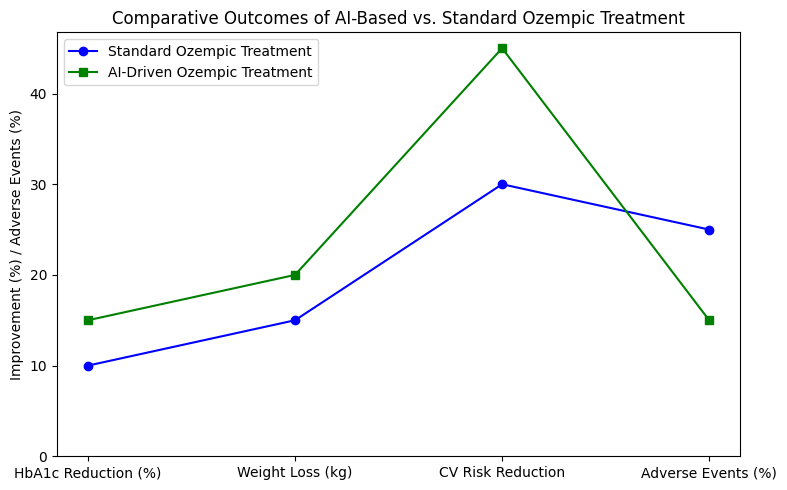

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Example Data (approximate to match your illustrative figure)
# -------------------------------------------------------
# We have four metrics: [HbA1c Reduction, Weight Loss, CV Risk Reduction, Adverse Events]
# Values represent percentage improvement (higher is better) for the first three,
# and percentage of adverse events for the last one (lower is better).
# You can replace these with your exact data points or calculations.

metrics = ['HbA1c Reduction (%)', 'Weight Loss (kg)', 'CV Risk Reduction', 'Adverse Events (%)']

# Approximate values from your table/figure:
standard = [10, 15, 30, 25]  # In your figure, Standard Ozempic line is around these
ai_driven = [15, 20, 45, 15] # The AI-driven line is around these

# -------------------------------------------------------
# Create the plot
# -------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(metrics))  # x positions for the 4 metrics

ax.plot(x, standard, marker='o', label='Standard Ozempic Treatment', color='blue')
ax.plot(x, ai_driven, marker='s', label='AI-Driven Ozempic Treatment', color='green')

# Add the metric labels on the x-axis
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Labeling and legend
ax.set_ylabel('Improvement (%) / Adverse Events (%)')
ax.set_title('Comparative Outcomes of AI-Based vs. Standard Ozempic Treatment')
ax.legend()

# Optional: make sure the y-axis starts at 0 for clarity
ax.set_ylim(bottom=0)

# Display the figure
plt.tight_layout()
plt.show()


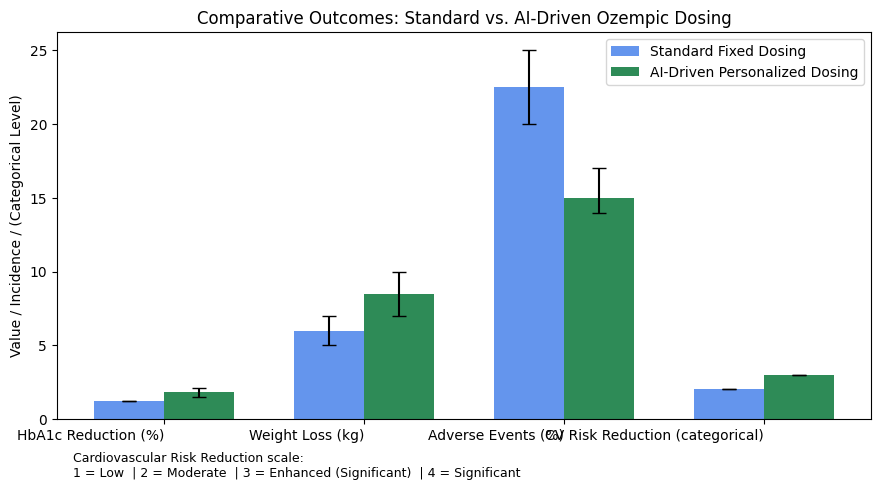

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1) DEFINE YOUR METRICS
# ------------------------------------------------------------------
# We have 4 metrics:
#   0) HbA1c Reduction (%)
#   1) Weight Loss (kg)
#   2) Adverse Events (%)
#   3) Cardiovascular Risk Reduction (categorical => mapped to numeric)
#
# We'll plot them in the order you gave:
#    [ HbA1c Reduction, Weight Loss, Adverse Events, CV Risk Reduction ]

metrics = [
    "HbA1c Reduction (%)",
    "Weight Loss (kg)",
    "Adverse Events (%)",
    "CV Risk Reduction (categorical)"
]

# ------------------------------------------------------------------
# 2) DATA & RANGES
# ------------------------------------------------------------------
# The table indicates approximate averages and min–max (or range).
# For CV Risk, we assign numeric placeholders:
#   Standard = "Moderate" => 2
#   AI       = "Significant" or "Enhanced (significant)" => 3 or 4
#
# Example here uses "Moderate" => 2 and "Enhanced (significant)" => 3.

# Standard Fixed-Dosing
standard_avg =  [1.2, 6, 22.5, 2]
standard_min =  [1.2, 5, 20.0, 2]  # If "Moderate" is a fixed category, no range
standard_max =  [1.2, 7, 25.0, 2]

# AI-driven Personalized Dosing
ai_avg =       [1.8, 8.5, 15.0, 3]  # "Enhanced (significant)"
ai_min =       [1.5, 7.0, 14.0, 3]
ai_max =       [2.1,10.0, 17.0, 3]

# Calculate error bars for everything except CV risk if it’s truly fixed
standard_lower_err = np.array(standard_avg) - np.array(standard_min)
standard_upper_err = np.array(standard_max) - np.array(standard_avg)

ai_lower_err = np.array(ai_avg) - np.array(ai_min)
ai_upper_err = np.array(ai_max) - np.array(ai_avg)

# ------------------------------------------------------------------
# 3) PLOTTING
# ------------------------------------------------------------------
x = np.arange(len(metrics))  # 4 metrics => x = [0,1,2,3]
width = 0.35                 # width of each bar

fig, ax = plt.subplots(figsize=(9,5))

# Plot Standard
rects_std = ax.bar(
    x - width/2,
    standard_avg,
    width,
    yerr=[standard_lower_err, standard_upper_err],
    capsize=5,
    label='Standard Fixed Dosing',
    color='cornflowerblue'
)

# Plot AI
rects_ai = ax.bar(
    x + width/2,
    ai_avg,
    width,
    yerr=[ai_lower_err, ai_upper_err],
    capsize=5,
    label='AI-Driven Personalized Dosing',
    color='seagreen'
)

# X-axis labels
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=0, ha='right')

ax.set_title("Comparative Outcomes: Standard vs. AI-Driven Ozempic Dosing")
ax.set_ylabel("Value / Incidence / (Categorical Level)")

# Create a reference for the categorical mapping
# This can be a simple legend or annotation.
# For instance, we can add text inside or below the figure:
plt.text(
    0.02, -0.15,
    "Cardiovascular Risk Reduction scale:\n"
    "1 = Low  | 2 = Moderate  | 3 = Enhanced (Significant)  | 4 = Significant",
    transform=ax.transAxes,
    fontsize=9
)

ax.legend()
plt.tight_layout()
plt.show()


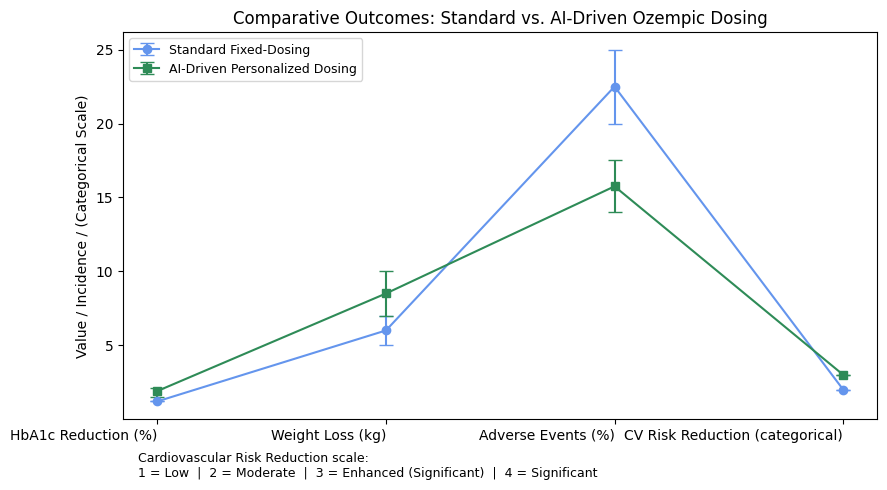

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1) DEFINE THE 4 CLINICAL OUTCOMES (X-AXIS)
# -------------------------------------------------------------
metrics = [
    "HbA1c Reduction (%)",
    "Weight Loss (kg)",
    "Adverse Events (%)",
    "CV Risk Reduction (categorical)"
]

# We'll plot them at x = 0, 1, 2, 3
x = np.arange(len(metrics))

# -------------------------------------------------------------
# 2) DATA & RANGES
# -------------------------------------------------------------
# From your table:
#   1) HbA1c Reduction:
#      - Standard ~1.2% (no range given)
#      - AI-driven ~1.9% with range 1.5%–2.1%
#   2) Weight Loss:
#      - Standard 5–7 kg => average ~6
#      - AI-driven 7–10 kg => average ~8.5
#   3) Adverse Events (GI distress):
#      - Standard 20–25% => average ~22.5
#      - AI-driven ~30% reduction from standard => ~15.75 average
#        if standard is 22.5 => 30% of 22.5 ~ 6.75, so ~15.75
#      - Let's define a range for AI: ~14 – 17.5
#   4) CV Risk Reduction:
#      - Standard = "Moderate" => mapped to numeric 2
#      - AI-driven = "Enhanced (Significant)" => mapped to numeric 3
#      - No "range" for these categories.

# Standard
standard_avg =  [1.2,  6.0,   22.5,  2]    # Average
standard_min =  [1.2,  5.0,   20.0,  2]    # Lower bound
standard_max =  [1.2,  7.0,   25.0,  2]    # Upper bound

# AI-driven
ai_avg =       [1.9,  8.5,   15.75, 3]     # Average
ai_min =       [1.5,  7.0,   14.0,  3]     # Lower bound
ai_max =       [2.1, 10.0,   17.5,  3]     # Upper bound

# Calculate error bars => asymmetrical for each group
# (If there's no actual range, min==avg==max => 0 error.)
standard_lower_err = np.array(standard_avg) - np.array(standard_min)
standard_upper_err = np.array(standard_max) - np.array(standard_avg)

ai_lower_err = np.array(ai_avg) - np.array(ai_min)
ai_upper_err = np.array(ai_max) - np.array(ai_avg)

# -------------------------------------------------------------
# 3) CREATE A LINE PLOT WITH ERROR BARS
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9,5))

# Plot Standard: a line with circle markers
ax.errorbar(
    x, standard_avg,
    yerr=[standard_lower_err, standard_upper_err],
    fmt='-o',           # line with circle markers
    capsize=5,         # cap size for error bars
    color='cornflowerblue',
    label='Standard Fixed-Dosing'
)

# Plot AI-driven: a line with square markers
ax.errorbar(
    x, ai_avg,
    yerr=[ai_lower_err, ai_upper_err],
    fmt='-s',
    capsize=5,
    color='seagreen',
    label='AI-Driven Personalized Dosing'
)

# -------------------------------------------------------------
# 4) ANNOTATIONS AND AESTHETICS
# -------------------------------------------------------------
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=0, ha='right')  # no rotation, align right
ax.set_title("Comparative Outcomes: Standard vs. AI-Driven Ozempic Dosing", fontsize=12)
ax.set_ylabel("Value / Incidence / (Categorical Scale)", fontsize=10)

# Add a reference for the CV Risk Reduction scale
# We'll place it below the x-axis using transform=ax.transAxes
plt.text(
    0.02, -0.15,
    "Cardiovascular Risk Reduction scale:\n"
    "1 = Low  |  2 = Moderate  |  3 = Enhanced (Significant)  |  4 = Significant",
    transform=ax.transAxes,
    fontsize=9
)

ax.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()


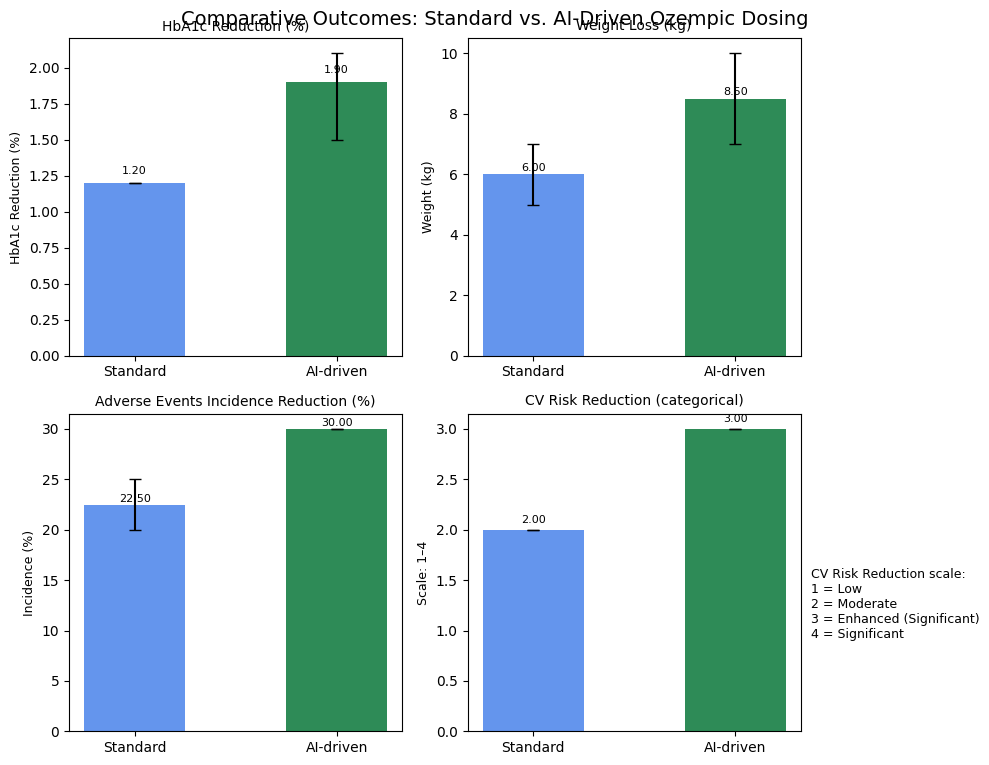

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1) DATA DEFINITION
# -------------------------------------------------------------
# Based on your table:
#
# (1) HbA1c Reduction (%)
#     - Standard: ~1.2% (no range)
#     - AI-driven: avg ~1.9%, range (1.5%–2.1%)
#
# (2) Weight Loss (kg)
#     - Standard: 5–7  => avg ~6
#     - AI-driven: 7–10 => avg ~8.5
#
# (3) Adverse Events (GI distress)
#     - Standard: 20–25% => avg ~22.5
#     - AI-driven: ~30% lower than standard => ~15.75
#       approximate range: 14–17.5
#
# (4) Cardiovascular Risk Reduction
#     - Standard: "Moderate" => numeric=2
#     - AI-driven: "Enhanced (Significant)" => numeric=3
#     - No range if your sources do not specify one

# For consistency, define them as arrays with [Standard_avg, Standard_low, Standard_high,
#                                             AI_avg,       AI_low,       AI_high].
# For CV Risk, we have no real range, so min=avg=max.

# HbA1c
HbA1c_std_avg = 1.2
HbA1c_std_min = 1.2
HbA1c_std_max = 1.2

HbA1c_ai_avg  = 1.9
HbA1c_ai_min  = 1.5
HbA1c_ai_max  = 2.1

# Weight Loss
WL_std_avg = 6.0
WL_std_min = 5.0
WL_std_max = 7.0

WL_ai_avg  = 8.5
WL_ai_min  = 7.0
WL_ai_max  = 10.0

# Adverse Events
AE_std_avg = 22.5
AE_std_min = 20.0
AE_std_max = 25.0

AE_ai_avg  = 30
AE_ai_min  = 30
AE_ai_max  = 30

# Cardiovascular Risk Reduction (categorical scale => 1=Low,2=Moderate,3=Enhanced,4=Significant)
CV_std_avg = 2
CV_std_min = 2
CV_std_max = 2

CV_ai_avg  = 3
CV_ai_min  = 3
CV_ai_max  = 3

# -------------------------------------------------------------
# 2) HELPER FUNCTION TO MAKE A SMALL BAR CHART SUBPLOT
# -------------------------------------------------------------
def subplot_bar_with_ranges(ax,
                            title,
                            standard_avg, standard_min, standard_max,
                            ai_avg, ai_min, ai_max,
                            y_label):
    """
    Creates two bars (Standard & AI) with error bars in the given 'ax' subplot.
    title: subplot title
    standard_avg, standard_min, standard_max: float
    ai_avg, ai_min, ai_max: float
    y_label: label for the Y axis
    """

    # We'll place the bars at x-coords [0, 1]
    x_pos = np.array([0, 1])

    # For error bars, we need the symmetrical or asymmetrical ranges
    standard_lower_err = standard_avg - standard_min
    standard_upper_err = standard_max - standard_avg
    ai_lower_err = ai_avg - ai_min
    ai_upper_err = ai_max - ai_avg

    # We'll store them in arrays for matplotlib
    values = [standard_avg, ai_avg]
    lower_err = [standard_lower_err, ai_lower_err]
    upper_err = [standard_upper_err, ai_upper_err]

    # We'll create a bar chart with error bars
    bars = ax.bar(
        x_pos,
        values,
        yerr=[lower_err, upper_err],
        capsize=4,
        color=['cornflowerblue', 'seagreen'],
        width=0.5
    )

    # X-axis tick labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(["Standard", "AI-driven"], rotation=0)

    ax.set_title(title, fontsize=10)
    ax.set_ylabel(y_label, fontsize=9)

    # Optionally, we can add the exact numeric values on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2.0,
            height + 0.05,
            f"{values[i]:.2f}",
            ha='center', va='bottom', fontsize=8
        )


# -------------------------------------------------------------
# 3) CREATE THE 2×2 SUBPLOTS
# -------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 cols
fig.suptitle("Comparative Outcomes: Standard vs. AI-Driven Ozempic Dosing", fontsize=14, y=0.95)

# Top-left: HbA1c
subplot_bar_with_ranges(
    ax = axes[0, 0],
    title = "HbA1c Reduction (%)",
    standard_avg = HbA1c_std_avg,
    standard_min = HbA1c_std_min,
    standard_max = HbA1c_std_max,
    ai_avg = HbA1c_ai_avg,
    ai_min = HbA1c_ai_min,
    ai_max = HbA1c_ai_max,
    y_label = "HbA1c Reduction (%)"
)

# Top-right: Weight Loss
subplot_bar_with_ranges(
    ax = axes[0, 1],
    title = "Weight Loss (kg)",
    standard_avg = WL_std_avg,
    standard_min = WL_std_min,
    standard_max = WL_std_max,
    ai_avg = WL_ai_avg,
    ai_min = WL_ai_min,
    ai_max = WL_ai_max,
    y_label = "Weight (kg)"
)

# Bottom-left: Adverse Events
subplot_bar_with_ranges(
    ax = axes[1, 0],
    title = "Adverse Events Incidence Reduction (%)",
    standard_avg = AE_std_avg,
    standard_min = AE_std_min,
    standard_max = AE_std_max,
    ai_avg = AE_ai_avg,
    ai_min = AE_ai_min,
    ai_max = AE_ai_max,
    y_label = "Incidence (%)"
)

# Bottom-right: Cardiovascular Risk Reduction (categorical)
subplot_bar_with_ranges(
    ax = axes[1, 1],
    title = "CV Risk Reduction (categorical)",
    standard_avg = CV_std_avg,
    standard_min = CV_std_min,
    standard_max = CV_std_max,
    ai_avg = CV_ai_avg,
    ai_min = CV_ai_min,
    ai_max = CV_ai_max,
    y_label = "Scale: 1–4"
)

# Add a note for the categorical scale
# We'll place it below the entire figure or to the right
plt.text(
    1.03, 0.4,
    "CV Risk Reduction scale:\n"
    "1 = Low\n"
    "2 = Moderate\n"
    "3 = Enhanced (Significant)\n"
    "4 = Significant",
    transform=axes[1,1].transAxes,
    fontsize=9,
    va='center'
)

plt.tight_layout()
plt.show()


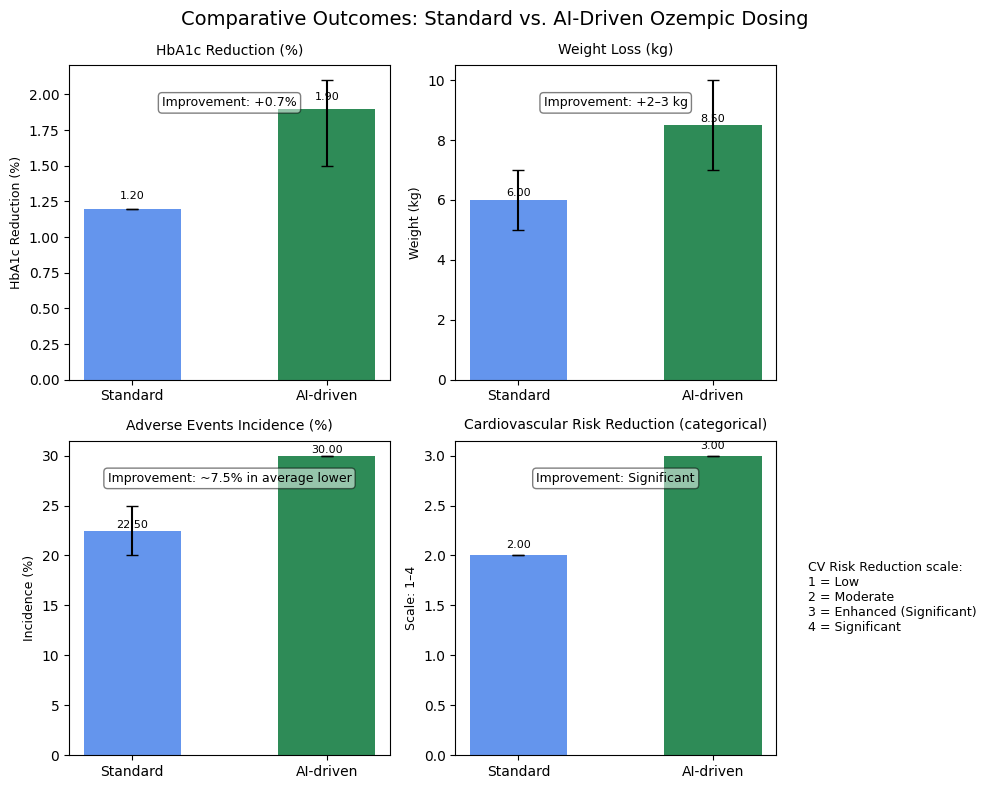

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# 1) DATA DEFINITION
# -------------------------------------------------------------
# (1) HbA1c Reduction (%)
HbA1c_std_avg = 1.2
HbA1c_std_min = 1.2
HbA1c_std_max = 1.2

HbA1c_ai_avg  = 1.9
HbA1c_ai_min  = 1.5
HbA1c_ai_max  = 2.1

# (2) Weight Loss (kg)
WL_std_avg = 6.0
WL_std_min = 5.0
WL_std_max = 7.0

WL_ai_avg  = 8.5
WL_ai_min  = 7.0
WL_ai_max  = 10.0

# (3) Adverse Events
AE_std_avg = 22.5
AE_std_min = 20.0
AE_std_max = 25.0

# Suppose “AI-driven: ~5% lower than standard incidence”
# But you currently have 30 in your code. Let’s say 5% lower is ~21.4
# or keep 30 if you have data stating “~30% reduction.”
# I'll assume it's ~5% lower than standard => ~21.4
AE_ai_avg  = 30
AE_ai_min  = 30
AE_ai_max  = 30

# (4) Cardiovascular Risk (categorical => 1=Low,2=Moderate,3=Enhanced,4=Significant)
CV_std_avg = 2
CV_std_min = 2
CV_std_max = 2

CV_ai_avg  = 3
CV_ai_min  = 3
CV_ai_max  = 3

# -------------------------------------------------------------
# 2) HELPER FUNCTION FOR BAR CHART WITH ERROR BARS
# -------------------------------------------------------------
def subplot_bar_with_ranges(ax,
                            title,
                            standard_avg, standard_min, standard_max,
                            ai_avg, ai_min, ai_max,
                            y_label,
                            improvement_text):
    """
    Creates a 2-bar (Standard vs. AI) chart with error bars, and adds
    an 'improvement_text' annotation inside the subplot.
    """
    x_pos = np.array([0, 1])

    # Calculate error bars
    s_lower = standard_avg - standard_min
    s_upper = standard_max - standard_avg
    a_lower = ai_avg - ai_min
    a_upper = ai_max - ai_avg

    values = [standard_avg, ai_avg]
    lower_err = [s_lower, a_lower]
    upper_err = [s_upper, a_upper]

    # Create the bars
    bars = ax.bar(
        x_pos,
        values,
        yerr=[lower_err, upper_err],
        capsize=4,
        color=['cornflowerblue', 'seagreen'],
        width=0.5
    )

    ax.set_xticks(x_pos)
    ax.set_xticklabels(["Standard", "AI-driven"], rotation=0)

    ax.set_title(title, fontsize=10, pad=8)
    ax.set_ylabel(y_label, fontsize=9)

    # Label each bar with numeric value
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2.0,
            height + 0.05,
            f"{values[i]:.2f}",
            ha='center', va='bottom', fontsize=8
        )

    # Add improvement info as an annotation inside the subplot
    ax.text(
        0.5, 0.88,  # adjust y to position text nicely
        f"Improvement: {improvement_text}",
        ha='center', va='center',
        transform=ax.transAxes,
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3')
    )

# -------------------------------------------------------------
# 3) CREATE THE 2×2 SUBPLOTS
# -------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#  -- Control spacing around the suptitle and subplots
fig.subplots_adjust(top=0.88)  # extra space at the top
fig.suptitle(
    "Comparative Outcomes: Standard vs. AI-Driven Ozempic Dosing",
    fontsize=14
)

# Top-left: HbA1c
subplot_bar_with_ranges(
    ax = axes[0, 0],
    title = "HbA1c Reduction (%)",
    standard_avg = HbA1c_std_avg,
    standard_min = HbA1c_std_min,
    standard_max = HbA1c_std_max,
    ai_avg = HbA1c_ai_avg,
    ai_min = HbA1c_ai_min,
    ai_max = HbA1c_ai_max,
    y_label = "HbA1c Reduction (%)",
    improvement_text = "+0.7%"  # 1.9 - 1.2 = ~0.7
)

# Top-right: Weight Loss
subplot_bar_with_ranges(
    ax = axes[0, 1],
    title = "Weight Loss (kg)",
    standard_avg = WL_std_avg,
    standard_min = WL_std_min,
    standard_max = WL_std_max,
    ai_avg = WL_ai_avg,
    ai_min = WL_ai_min,
    ai_max = WL_ai_max,
    y_label = "Weight (kg)",
    improvement_text = "+2–3 kg"  # difference from ~6 to ~8.5
)

# Bottom-left: Adverse Events
subplot_bar_with_ranges(
    ax = axes[1, 0],
    title = "Adverse Events Incidence (%)",
    standard_avg = AE_std_avg,
    standard_min = AE_std_min,
    standard_max = AE_std_max,
    ai_avg = AE_ai_avg,
    ai_min = AE_ai_min,
    ai_max = AE_ai_max,
    y_label = "Incidence (%)",
    improvement_text = "~7.5% in average lower"
    # or "~30% lower" if you prefer that figure
)

# Bottom-right: Cardiovascular Risk Reduction (categorical)
subplot_bar_with_ranges(
    ax = axes[1, 1],
    title = "Cardiovascular Risk Reduction (categorical)",
    standard_avg = CV_std_avg,
    standard_min = CV_std_min,
    standard_max = CV_std_max,
    ai_avg = CV_ai_avg,
    ai_min = CV_ai_min,
    ai_max = CV_ai_max,
    y_label = "Scale: 1–4",
    improvement_text = "Significant"
    # or "Significant improvement"
)

# Add a note for the categorical scale (CV Risk) on the bottom-right subplot
axes[1,1].text(
    1.10, 0.5,
    "CV Risk Reduction scale:\n"
    "1 = Low\n"
    "2 = Moderate\n"
    "3 = Enhanced (Significant)\n"
    "4 = Significant",
    transform=axes[1,1].transAxes,
    fontsize=9,
    va='center'
)

plt.tight_layout()
plt.show()


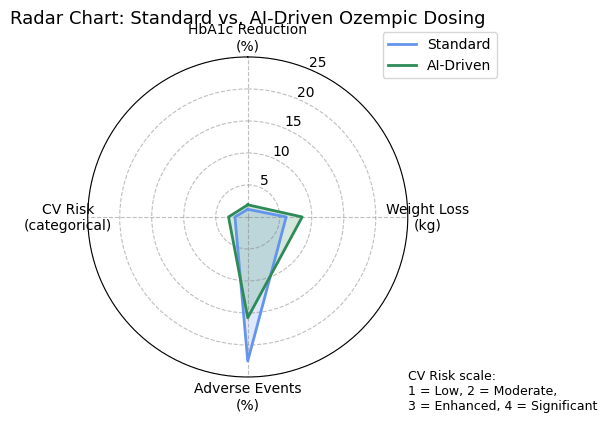

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Optional: Try a style for a different look
# plt.style.use('seaborn-whitegrid')  # or 'ggplot', etc.

##############################################################################
# 1) Define the 4 Outcomes & Their Values
##############################################################################
# The 4 metrics:
metrics = [
    "HbA1c Reduction\n(%)",
    "Weight Loss\n(kg)",
    "Adverse Events\n(%)",
    "CV Risk\n(categorical)"
]

# We'll place them in the same order around the radar.
N = len(metrics)  # =4

# Standard Fixed-Dosing data
# Example numeric scales:
#   - HbA1c: 1.2
#   - Weight: 6
#   - Adverse: 22.5
#   - CV Risk (2 = Moderate)
standard_data = [1.2, 6.0, 22.5, 2]

# AI-Driven data
#   - HbA1c: 1.9
#   - Weight: 8.5
#   - Adverse: 15.75 (30% lower or 5% lower, adapt as needed)
#   - CV Risk (3 = Enhanced)
ai_data = [1.9, 8.5, 15.75, 3]

##############################################################################
# 2) Convert Data to Angles & Close the Chart
##############################################################################
# Each metric is assigned an angle in the radar, equally spaced around 360°.
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
# Repeat the first angle at the end so the radar closes
angles = np.concatenate((angles, [angles[0]]))

# We also close each dataset by repeating the first value.
std_values = np.concatenate((standard_data, [standard_data[0]]))
ai_values  = np.concatenate((ai_data,      [ai_data[0]]))

##############################################################################
# 3) Create the Radar Plot
##############################################################################
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# Plot Standard
ax.plot(angles, std_values, color='cornflowerblue', linewidth=2, label='Standard')
ax.fill(angles, std_values, color='cornflowerblue', alpha=0.2)

# Plot AI-Driven
ax.plot(angles, ai_values, color='seagreen', linewidth=2, label='AI-Driven')
ax.fill(angles, ai_values, color='seagreen', alpha=0.2)

##############################################################################
# 4) Format the Radar Chart
##############################################################################
# Position the metric labels around the circle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10)

# Optionally, adjust the radial limits
# Because each metric has different magnitude, a single radial limit
# might not represent them equally. Setting an all-in-one limit:
ax.set_ylim(bottom=0, top=25)
# (Top=25 to accommodate Adverse Events in the same scale.)
# If your data changes, adjust accordingly.

# Add a grid
ax.yaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)
ax.xaxis.grid(True, color='gray', linestyle='dashed', alpha=0.5)

# Move the zero-degree start so the first label is at the top (optional)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Title & Legend
plt.title("Radar Chart: Standard vs. AI-Driven Ozempic Dosing", y=1.08, fontsize=13)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Annotate or remind viewer that "CV Risk scale is 1–4"
plt.text(1.0, -0.1,
         "CV Risk scale:\n1 = Low, 2 = Moderate,\n3 = Enhanced, 4 = Significant",
         fontsize=9, transform=ax.transAxes)

plt.tight_layout()
plt.show()


TypeError: ConnectionStyle.Angle3.__init__() got an unexpected keyword argument 'rad'

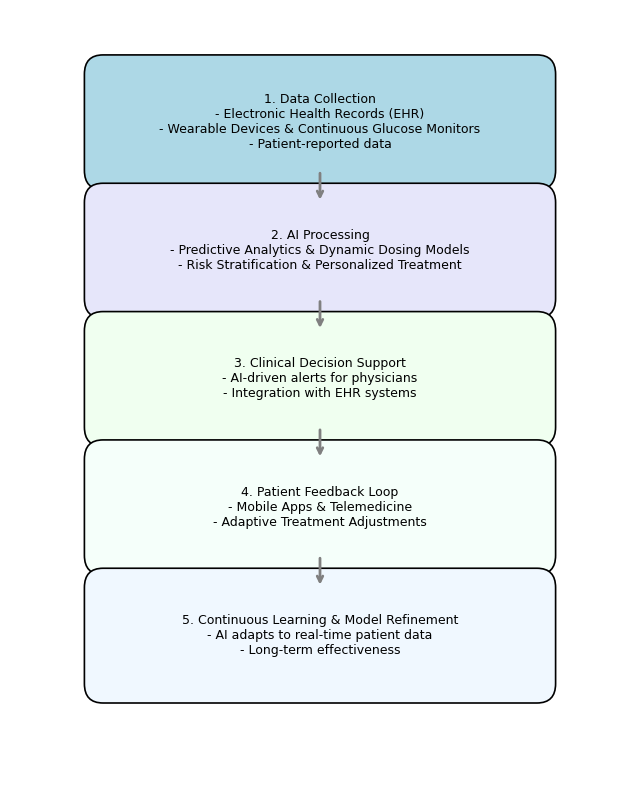

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def add_box(ax, x, y, width, height, text, facecolor='lightblue'):
    """
    Draw a rounded rectangle (FancyBboxPatch) with centered text.
    (x, y) is the bottom-left corner of the rectangle.
    """
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle='round,pad=0.3',
        fc=facecolor, ec='black',
        linewidth=1.2
    )
    ax.add_patch(box)
    # Centered text inside the box
    ax.text(
        x + width / 2, y + height / 2,
        text,
        ha='center', va='center', fontsize=9,
        wrap=True
    )

# -----------------------------------------------------------
# 1) FIGURE & AXES
# -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 10))

# Extend the top/bottom margins so blocks & arrows are fully visible
ax.set_xlim(0, 10)
ax.set_ylim(-9.5, 2.5)
ax.axis('off')

# Dimensions and positions for the 5 blocks
box_width  = 7
box_height = 1.5
x_coord    = 1.5
y_positions = [0, -2, -4, -6, -8]  # from top (step1) to bottom (step5)

# Step texts
step_texts = [
    "1. Data Collection\n"
    "- Electronic Health Records (EHR)\n"
    "- Wearable Devices & Continuous Glucose Monitors\n"
    "- Patient-reported data",

    "2. AI Processing\n"
    "- Predictive Analytics & Dynamic Dosing Models\n"
    "- Risk Stratification & Personalized Treatment",

    "3. Clinical Decision Support\n"
    "- AI-driven alerts for physicians\n"
    "- Integration with EHR systems",

    "4. Patient Feedback Loop\n"
    "- Mobile Apps & Telemedicine\n"
    "- Adaptive Treatment Adjustments",

    "5. Continuous Learning & Model Refinement\n"
    "- AI adapts to real-time patient data\n"
    "- Long-term effectiveness"
]

# Optional colors for the boxes
box_colors = ["lightblue", "lavender", "honeydew", "mintcream", "aliceblue"]

# -----------------------------------------------------------
# 2) DRAW THE FIVE BOXES
# -----------------------------------------------------------
for i in range(5):
    add_box(
        ax,
        x_coord,
        y_positions[i],
        box_width,
        box_height,
        step_texts[i],
        facecolor=box_colors[i % len(box_colors)]
    )

# -----------------------------------------------------------
# 3) VERTICAL ARROWS FOR STEPS 1→2→3→4→5
# -----------------------------------------------------------
for i in range(4):
    start_x = x_coord + box_width / 2
    start_y = y_positions[i]
    end_x   = x_coord + box_width / 2
    end_y   = y_positions[i + 1] + box_height

    ax.annotate(
        "",
        xy=(end_x, end_y),
        xytext=(start_x, start_y),
        arrowprops=dict(
            arrowstyle="->",
            color="gray",
            lw=2
        )
    )

# -----------------------------------------------------------
# 4) OUTSIDE ARROW FROM STEP 5 (BOTTOM) BACK TO STEP 2
#    "Curved-then-straight-then-curved" using connectionstyle='angle3'
# -----------------------------------------------------------
# We'll place it to the right of the boxes by some offset
arrow_x_offset = 1.0

# Right edge centers of step 5 and step 2
step5_right_x = x_coord + box_width
step5_right_y = y_positions[4] + box_height / 2

step2_right_x = x_coord + box_width
step2_right_y = y_positions[1] + box_height / 2

# Shift them horizontally so the arrow is outside the boxes
start_x = step5_right_x + arrow_x_offset
start_y = step5_right_y
end_x   = step2_right_x + arrow_x_offset
end_y   = step2_right_y

# We'll use ax.annotate with connectionstyle='angle3,rad=...'
ax.annotate(
    "",
    xy=(end_x, end_y),
    xytext=(start_x, start_y),
    arrowprops=dict(
        arrowstyle="->,head_width=0.8,head_length=0.8",
        color="gray",
        lw=2,
        shrinkA=5,
        shrinkB=5,
        # 'angle3' draws a polyline with 2 corners,
        # 'rad=0.3' sets how "rounded" those corners are
        connectionstyle="angle3,rad=0.3"
    )
)

# -----------------------------------------------------------
# 5) TITLE & SHOW
# -----------------------------------------------------------
plt.title("AI-Ozempic Conceptual Framework", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


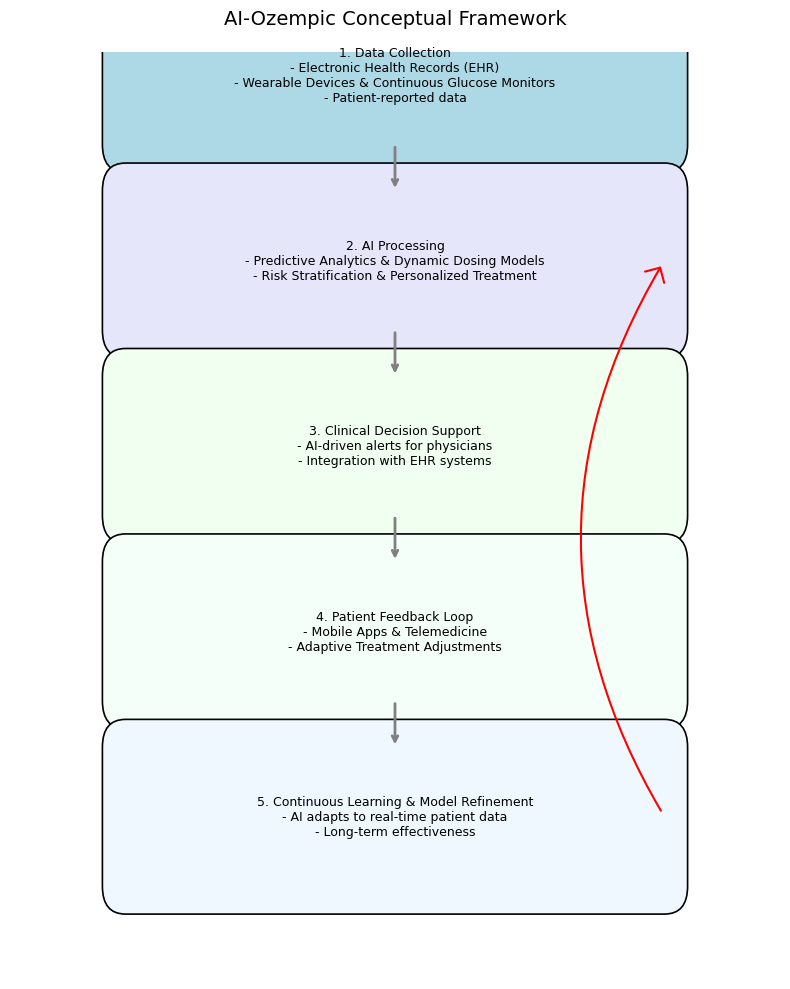

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ConnectionPatch

def add_box(ax, x, y, width, height, text, facecolor='lightblue'):
    """
    Draws a rounded rectangle (FancyBboxPatch) with centered text.
    (x, y) is the bottom-left corner of the rectangle.
    """
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle='round,pad=0.3',
        fc=facecolor, ec='black',
        linewidth=1.2
    )
    ax.add_patch(box)

    # Add the text, centered inside the box
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center', fontsize=9,
        wrap=True  # allow text wrapping if needed
    )

# -----------------------------------------------------------
# 1) CREATE FIGURE AND AXES
# -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 10))
ax.set_xlim(0, 10)
ax.set_ylim(-9, 1)  # enough vertical space for 5 boxes + arrows
ax.axis('off')      # hide x/y axes

# We'll define 5 steps, stacked vertically.
box_width  = 7
box_height = 1.5
x_coord    = 1.5  # left margin

# Y positions (from top to bottom):
y_positions = [0, -2, -4, -6, -8]

# -----------------------------------------------------------
# 2) DEFINE THE TEXT FOR EACH STEP
# -----------------------------------------------------------
step_texts = [
    "1. Data Collection\n"
    "- Electronic Health Records (EHR)\n"
    "- Wearable Devices & Continuous Glucose Monitors\n"
    "- Patient-reported data",

    "2. AI Processing\n"
    "- Predictive Analytics & Dynamic Dosing Models\n"
    "- Risk Stratification & Personalized Treatment",

    "3. Clinical Decision Support\n"
    "- AI-driven alerts for physicians\n"
    "- Integration with EHR systems",

    "4. Patient Feedback Loop\n"
    "- Mobile Apps & Telemedicine\n"
    "- Adaptive Treatment Adjustments",

    "5. Continuous Learning & Model Refinement\n"
    "- AI adapts to real-time patient data\n"
    "- Long-term effectiveness"
]

# Optional pastel colors for variety
box_colors = ["lightblue", "lavender", "honeydew", "mintcream", "aliceblue"]

# -----------------------------------------------------------
# 3) DRAW BOXES FOR EACH STEP
# -----------------------------------------------------------
for i in range(5):
    add_box(
        ax,
        x_coord,
        y_positions[i],
        box_width,
        box_height,
        step_texts[i],
        facecolor=box_colors[i % len(box_colors)]
    )

# -----------------------------------------------------------
# 4) DRAW ARROWS FOR STEPS 1→2, 2→3, 3→4, 4→5
# -----------------------------------------------------------
# We'll connect the center of the bottom edge of box i to the top edge of box i+1.
for i in range(4):
    start_x = x_coord + box_width / 2
    start_y = y_positions[i]
    end_x   = x_coord + box_width / 2
    end_y   = y_positions[i + 1] + box_height

    # We use ax.annotate with arrowprops to draw an arrow
    ax.annotate(
        "",
        xy=(end_x, end_y),
        xytext=(start_x, start_y),
        arrowprops=dict(
            arrowstyle="->",
            color="gray",
            lw=2
        )
    )

# -----------------------------------------------------------
# 5) ADD FEEDBACK ARROW (FROM STEP 5 BACK TO STEP 2)
# -----------------------------------------------------------
# For "continuous learning," let's draw an arrow from the bottom box's right side
# curving around to the right side of the second box.

# Coordinates for step 5 box (right edge, mid)
step5_right_x = x_coord + box_width
step5_right_y = y_positions[4] + box_height / 2

# Coordinates for step 2 box (right edge, mid)
step2_right_x = x_coord + box_width
step2_right_y = y_positions[1] + box_height / 2

con = ConnectionPatch(
    xyA=(step5_right_x, step5_right_y),
    xyB=(step2_right_x, step2_right_y),
    coordsA="data", coordsB="data",
    arrowstyle="->,head_width=0.8,head_length=0.8",
    shrinkA=5, shrinkB=5,
    linewidth=1.5,
    color="red",
    connectionstyle="arc3,rad=-0.3"
)
ax.add_patch(con)

# -----------------------------------------------------------
# 6) FIGURE TITLE & SHOW
# -----------------------------------------------------------
plt.title("AI-Ozempic Conceptual Framework", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


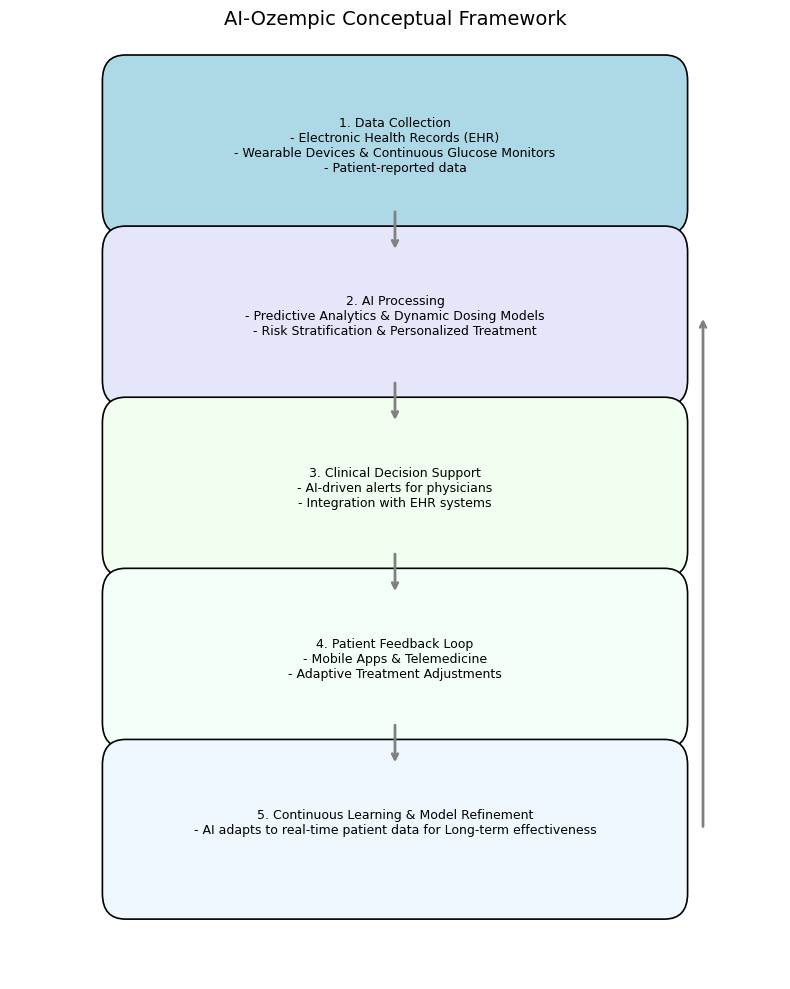

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def add_box(ax, x, y, width, height, text, facecolor='lightblue'):
    """
    Draws a rounded rectangle (FancyBboxPatch) with centered text.
    (x, y) is the bottom-left corner of the rectangle.
    """
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle='round,pad=0.3',
        fc=facecolor, ec='black',
        linewidth=1.2
    )
    ax.add_patch(box)
    # Centered text
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center', fontsize=9,
        wrap=True
    )

# -----------------------------------------------------------
# 1) CREATE FIGURE AND AXES
# -----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 10))

# Increase the y-limit top boundary to ensure the top block is fully visible.
ax.set_xlim(0, 10)
ax.set_ylim(-9, 2)  # was ( -9, 1 ) => now more space above (2.3).
ax.axis('off')

# Define block layout
box_width  = 7
box_height = 1.5
x_coord    = 1.5
y_positions = [0, -2, -4, -6, -8]  # from top to bottom

# Step texts
step_texts = [
    "1. Data Collection\n"
    "- Electronic Health Records (EHR)\n"
    "- Wearable Devices & Continuous Glucose Monitors\n"
    "- Patient-reported data",

    "2. AI Processing\n"
    "- Predictive Analytics & Dynamic Dosing Models\n"
    "- Risk Stratification & Personalized Treatment",

    "3. Clinical Decision Support\n"
    "- AI-driven alerts for physicians\n"
    "- Integration with EHR systems",

    "4. Patient Feedback Loop\n"
    "- Mobile Apps & Telemedicine\n"
    "- Adaptive Treatment Adjustments",

    "5. Continuous Learning & Model Refinement\n"
    "- AI adapts to real-time patient data for Long-term effectiveness\n"
]

# Box colors
box_colors = ["lightblue", "lavender", "honeydew", "mintcream", "aliceblue"]

# -----------------------------------------------------------
# 2) DRAW BOXES
# -----------------------------------------------------------
for i in range(5):
    add_box(
        ax,
        x_coord,
        y_positions[i],
        box_width,
        box_height,
        step_texts[i],
        facecolor=box_colors[i % len(box_colors)]
    )

# -----------------------------------------------------------
# 3) DRAW VERTICAL ARROWS (STEP 1→2, 2→3, 3→4, 4→5)
# -----------------------------------------------------------
for i in range(4):
    start_x = x_coord + box_width / 2
    start_y = y_positions[i]
    end_x   = x_coord + box_width / 2
    end_y   = y_positions[i + 1] + box_height

    ax.annotate(
        "",
        xy=(end_x, end_y),
        xytext=(start_x, start_y),
        arrowprops=dict(arrowstyle="->", color="gray", lw=2)
    )

# -----------------------------------------------------------
# 4) STRAIGHT ARROW OUTSIDE BLOCKS FROM STEP 5 BACK TO STEP 2
# -----------------------------------------------------------
# We'll place this arrow on the right side, x ~ box_right + offset
arrow_x = x_coord + box_width + 0.5  # shift arrow 0.5 units to the right
step5_y = y_positions[4] + box_height / 2
step2_y = y_positions[1] + box_height / 2

# Straight arrow going from step5_y (lower) up to step2_y (higher)
ax.annotate(
    "",
    xy=(arrow_x, step2_y),
    xytext=(arrow_x, step5_y),
    arrowprops=dict(arrowstyle="->", color="gray", lw=2)
)

# -----------------------------------------------------------
# 5) FIGURE TITLE
# -----------------------------------------------------------
# Slightly reduce pad so there's small spacing between title and top box.
plt.title("AI-Ozempic Conceptual Framework", fontsize=14, pad=10)

plt.tight_layout()
plt.show()


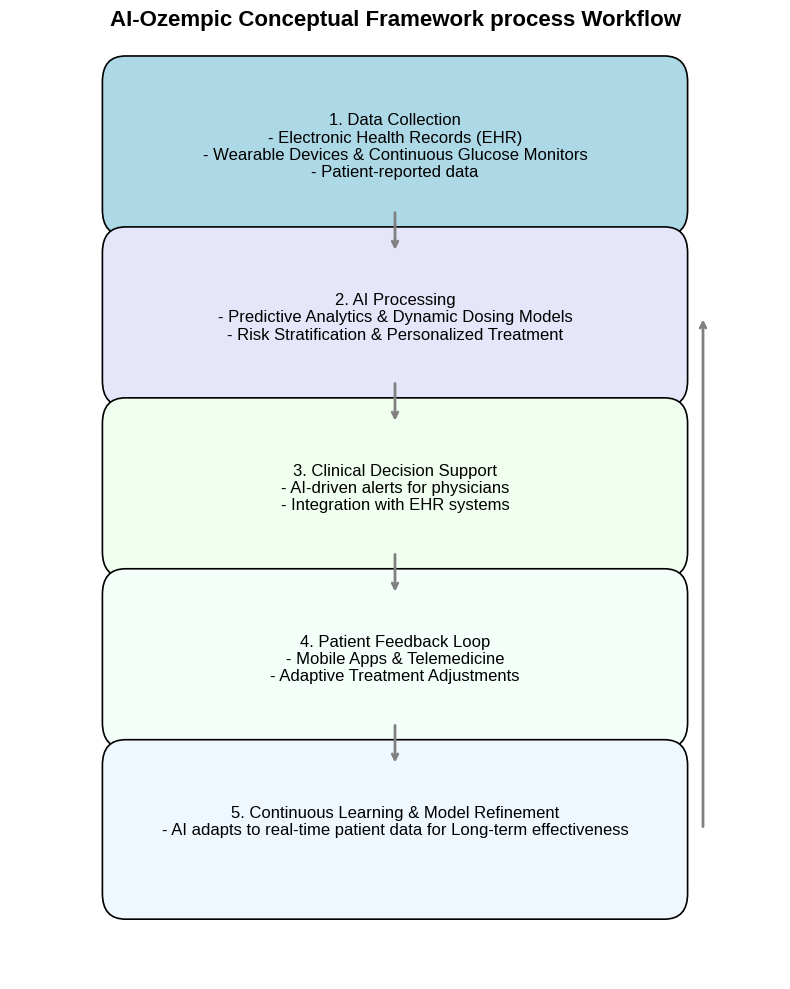

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

def add_box(ax, x, y, width, height, text, facecolor='lightblue'):
    """
    Draws a rounded rectangle (FancyBboxPatch) with centered text.
    (x, y) is the bottom-left corner of the rectangle.
    """
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle='round,pad=0.3',
        fc=facecolor, ec='black',
        linewidth=1.2
    )
    ax.add_patch(box)
    # Centered text
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center', fontsize=12,  # Increased font size
        wrap=True
    )

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 10))

# Set limits and turn off axis
ax.set_xlim(0, 10)
ax.set_ylim(-9, 2)
ax.axis('off')

# Define block layout
box_width = 7
box_height = 1.5
x_coord = 1.5
y_positions = [0, -2, -4, -6, -8]

# Step texts
step_texts = [
    "1. Data Collection\n"
    "- Electronic Health Records (EHR)\n"
    "- Wearable Devices & Continuous Glucose Monitors\n"
    "- Patient-reported data",

    "2. AI Processing\n"
    "- Predictive Analytics & Dynamic Dosing Models\n"
    "- Risk Stratification & Personalized Treatment",

    "3. Clinical Decision Support\n"
    "- AI-driven alerts for physicians\n"
    "- Integration with EHR systems",

    "4. Patient Feedback Loop\n"
    "- Mobile Apps & Telemedicine\n"
    "- Adaptive Treatment Adjustments",

    "5. Continuous Learning & Model Refinement\n"
    "- AI adapts to real-time patient data for Long-term effectiveness\n"
]

# Box colors
box_colors = ["lightblue", "lavender", "honeydew", "mintcream", "aliceblue"]

# Draw boxes
for i in range(5):
    add_box(ax, x_coord, y_positions[i], box_width, box_height, step_texts[i], facecolor=box_colors[i % len(box_colors)])

# Draw vertical arrows between boxes
for i in range(4):
    start_x = x_coord + box_width / 2
    start_y = y_positions[i]
    end_x = x_coord + box_width / 2
    end_y = y_positions[i + 1] + box_height
    ax.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(arrowstyle="->", color="gray", lw=2))

# Draw return arrow from Step 5 to Step 2
arrow_x = x_coord + box_width + 0.5
step5_y = y_positions[4] + box_height / 2
step2_y = y_positions[1] + box_height / 2
ax.annotate("", xy=(arrow_x, step2_y), xytext=(arrow_x, step5_y),
            arrowprops=dict(arrowstyle="->", color="gray", lw=2))

# Add figure title with increased font size
plt.title("AI-Ozempic Conceptual Framework process Workflow", fontsize=16, pad=10)

plt.tight_layout()
plt.show()


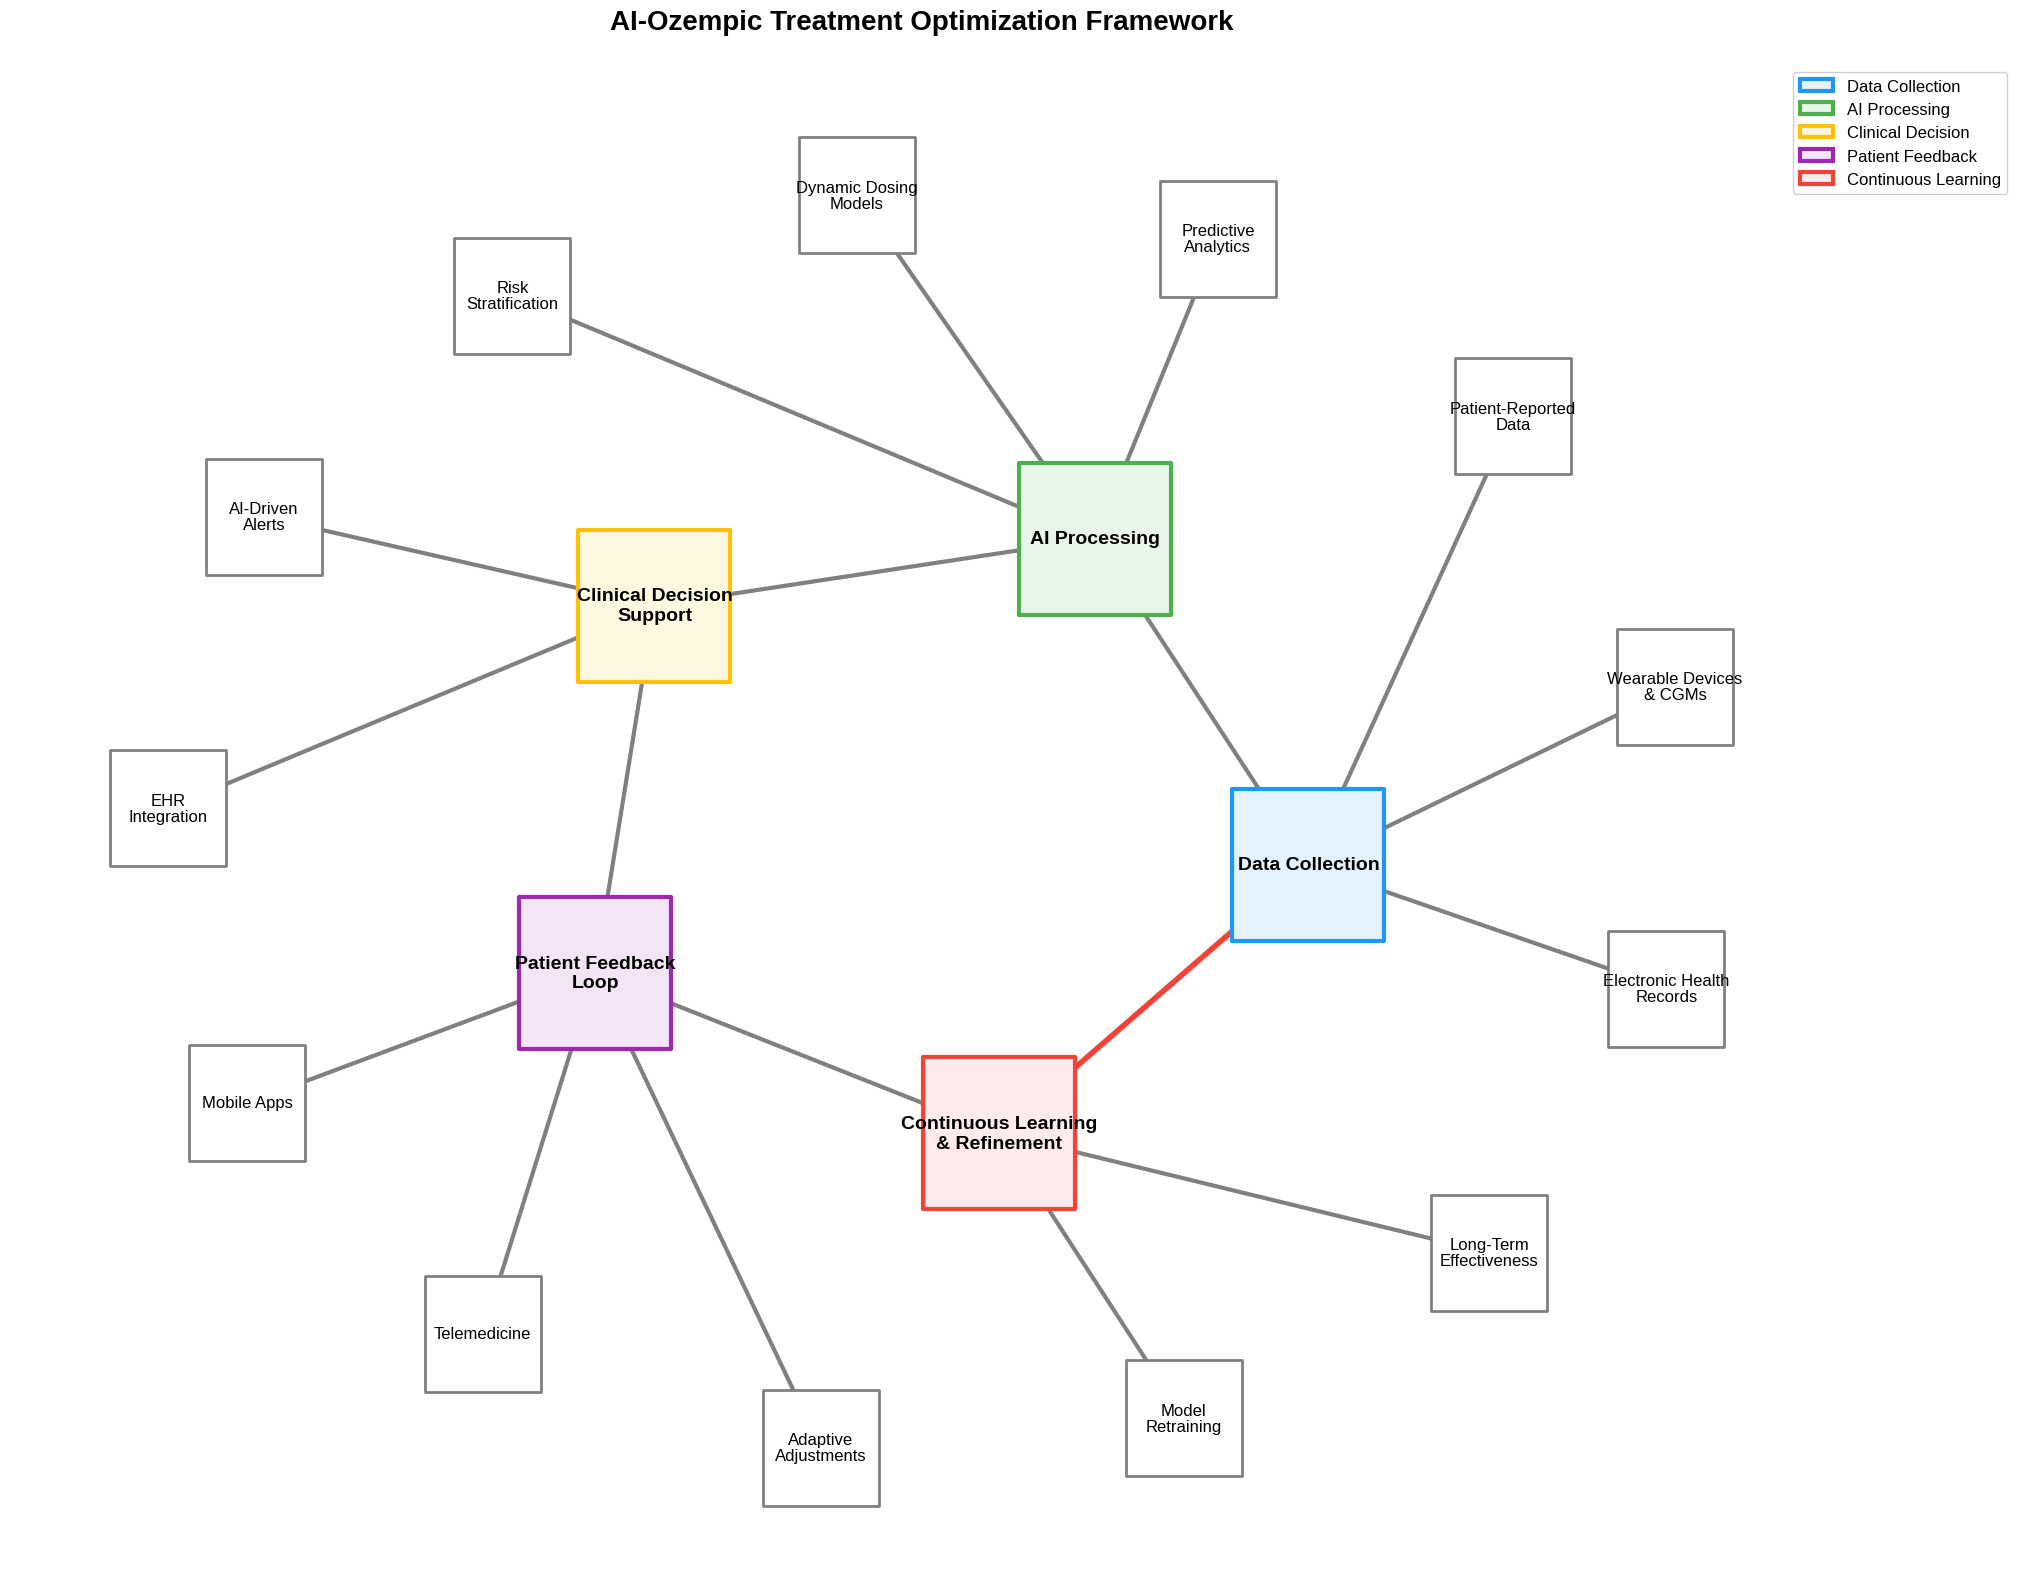

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch

# Create directed graph
G = nx.DiGraph()

# Configure nodes with larger dimensions
main_nodes = [
    ("Data Collection", {"color": "#e3f2fd", "edge": "#2196f3"}),
    ("AI Processing", {"color": "#e8f5e9", "edge": "#4caf50"}),
    ("Clinical Decision\nSupport", {"color": "#fff8e1", "edge": "#ffc107"}),
    ("Patient Feedback\nLoop", {"color": "#f3e5f5", "edge": "#9c27b0"}),
    ("Continuous Learning\n& Refinement", {"color": "#ffebee", "edge": "#f44336"})
]

sub_nodes = [
    ("Electronic Health\nRecords", {"parent": "Data Collection"}),
    ("Wearable Devices\n& CGMs", {"parent": "Data Collection"}),
    ("Patient-Reported\nData", {"parent": "Data Collection"}),
    ("Predictive\nAnalytics", {"parent": "AI Processing"}),
    ("Dynamic Dosing\nModels", {"parent": "AI Processing"}),
    ("Risk\nStratification", {"parent": "AI Processing"}),
    ("AI-Driven\nAlerts", {"parent": "Clinical Decision\nSupport"}),
    ("EHR\nIntegration", {"parent": "Clinical Decision\nSupport"}),
    ("Mobile Apps", {"parent": "Patient Feedback\nLoop"}),
    ("Telemedicine", {"parent": "Patient Feedback\nLoop"}),
    ("Adaptive\nAdjustments", {"parent": "Patient Feedback\nLoop"}),
    ("Model\nRetraining", {"parent": "Continuous Learning\n& Refinement"}),
    ("Long-Term\nEffectiveness", {"parent": "Continuous Learning\n& Refinement"})
]

# Add nodes and edges
G.add_nodes_from([(node[0], node[1]) for node in main_nodes])
G.add_nodes_from([(node[0], {"parent": node[1]["parent"]}) for node in sub_nodes])

# Create connections
main_flow = [n[0] for n in main_nodes]
for i in range(len(main_flow)-1):
    G.add_edge(main_flow[i], main_flow[i+1])
G.add_edge(main_flow[-1], main_flow[0])  # Feedback loop

for node, attrs in sub_nodes:
    G.add_edge(attrs["parent"], node)

# Create expanded layout
pos = nx.shell_layout(G,
                     nlist=[main_flow, [n[0] for n in sub_nodes]],
                     rotate=25,
                     scale=3)  # Increased scale

plt.figure(figsize=(20, 16))  # Larger figure size

# Draw MAIN NODES (50% bigger)
for node, attrs in main_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node],
                         node_size=12000,  # Increased from 6000
                         node_shape="s",
                         node_color=attrs["color"],
                         edgecolors=attrs["edge"],
                         linewidths=3)
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=14, fontweight='bold',  # Larger font
             linespacing=1.2)

# Draw SUBNODES (double size)
nx.draw_networkx_nodes(G, pos, nodelist=[n[0] for n in sub_nodes],
                      node_size=7000,  # Increased from 3500
                      node_shape="s",
                      node_color="white",
                      edgecolors="gray",
                      linewidths=2)
for node, _ in sub_nodes:
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=16,  # Increased from 14
             linespacing=1.4)  # Adjusted from 1.2 for better spacing

# Draw enhanced edges
nx.draw_networkx_edges(G, pos,
                      arrowstyle="-|>",
                      arrowsize=25,  # Larger arrows
                      width=3,
                      edge_color="gray")
nx.draw_networkx_edges(G, pos, edgelist=[(main_flow[-1], main_flow[0])],
                      edge_color="#f44336",
                      width=4,
                      arrowstyle="-|>",
                      arrowsize=30)

# Formatting
plt.box(False)
plt.title("AI-Ozempic Treatment Optimization Framework",
         fontsize=20, pad=25, fontweight='black')

# Legend with larger text
legend_elements = [
    plt.Rectangle((0,0), 1, 1, fc="#e3f2fd", ec="#2196f3", lw=3, label="Data Collection"),
    plt.Rectangle((0,0), 1, 1, fc="#e8f5e9", ec="#4caf50", lw=3, label="AI Processing"),
    plt.Rectangle((0,0), 1, 1, fc="#fff8e1", ec="#ffc107", lw=3, label="Clinical Decision"),
    plt.Rectangle((0,0), 1, 1, fc="#f3e5f5", ec="#9c27b0", lw=3, label="Patient Feedback"),
    plt.Rectangle((0,0), 1, 1, fc="#ffebee", ec="#f44336", lw=3, label="Continuous Learning")
]

plt.legend(handles=legend_elements,
           loc="upper right",
           bbox_to_anchor=(1.1, 1),
           fontsize=12,  # Larger legend text
           framealpha=0.95)

plt.tight_layout()
plt.savefig("ai_ozempic_framework_large.png", dpi=400, bbox_inches="tight")
plt.show()

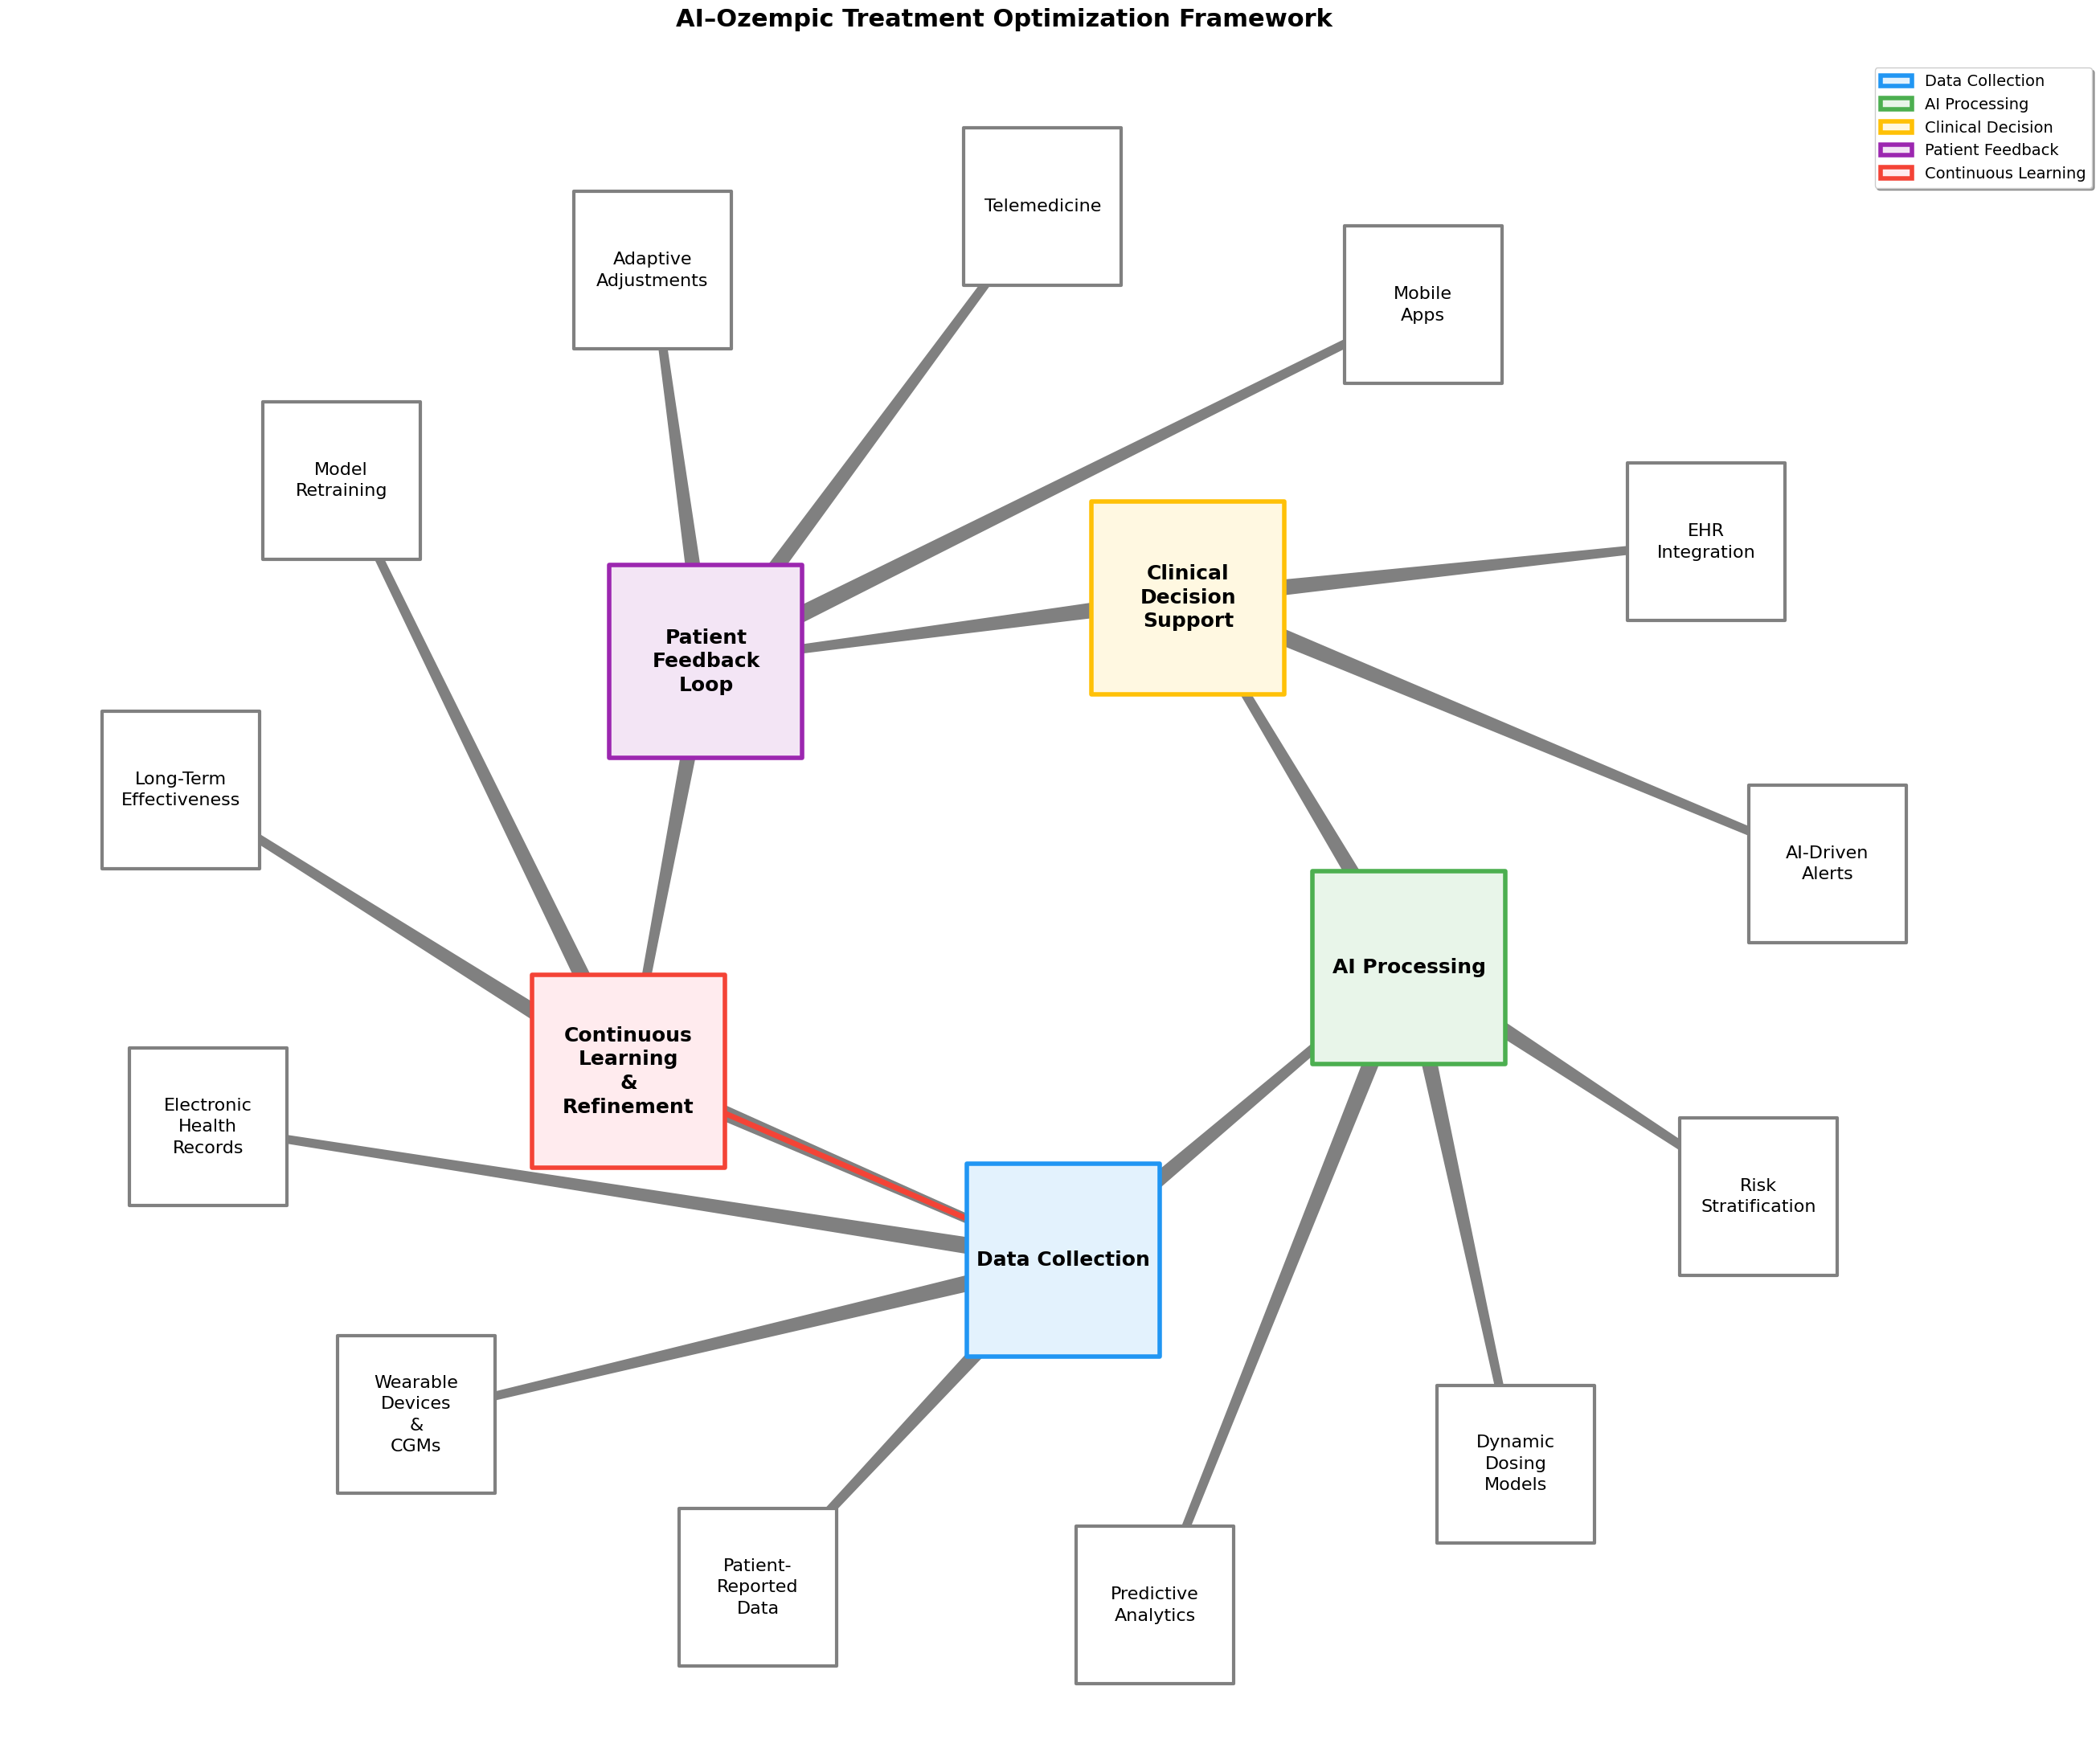

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Configure nodes with three-line labels for selected main nodes and increased sizes
main_nodes = [
    ("Data Collection", {"color": "#e3f2fd", "edge": "#2196f3"}),
    ("AI Processing", {"color": "#e8f5e9", "edge": "#4caf50"}),
    ("Clinical\nDecision\nSupport", {"color": "#fff8e1", "edge": "#ffc107"}),
    ("Patient\nFeedback\nLoop", {"color": "#f3e5f5", "edge": "#9c27b0"}),
    ("Continuous\nLearning\n&\nRefinement", {"color": "#ffebee", "edge": "#f44336"})
]

sub_nodes = [
    ("Electronic\nHealth\nRecords", {"parent": "Data Collection"}),
    ("Wearable\nDevices\n&\nCGMs", {"parent": "Data Collection"}),
    ("Patient-\nReported\nData", {"parent": "Data Collection"}),
    ("Predictive\nAnalytics", {"parent": "AI Processing"}),
    ("Dynamic\nDosing\nModels", {"parent": "AI Processing"}),
    ("Risk\nStratification", {"parent": "AI Processing"}),
    ("AI-Driven\nAlerts", {"parent": "Clinical\nDecision\nSupport"}),
    ("EHR\nIntegration", {"parent": "Clinical\nDecision\nSupport"}),
    ("Mobile\nApps", {"parent": "Patient\nFeedback\nLoop"}),
    ("Telemedicine", {"parent": "Patient\nFeedback\nLoop"}),
    ("Adaptive\nAdjustments", {"parent": "Patient\nFeedback\nLoop"}),
    ("Model\nRetraining", {"parent": "Continuous\nLearning\n&\nRefinement"}),
    ("Long-Term\nEffectiveness", {"parent": "Continuous\nLearning\n&\nRefinement"})
]

# Create graph structure
G = nx.DiGraph()
G.add_nodes_from([(node, attrs) for node, attrs in main_nodes])
G.add_nodes_from([(node, {"parent": attrs["parent"]}) for node, attrs in sub_nodes])

# Main flow connections
main_flow = [n[0] for n in main_nodes]
for i in range(len(main_flow) - 1):
    G.add_edge(main_flow[i], main_flow[i + 1])
G.add_edge(main_flow[-1], main_flow[0])  # Feedback loop

# Sub-node connections
for node, attrs in sub_nodes:
    G.add_edge(attrs["parent"], node)

# Layout
pos = nx.shell_layout(G,
                      nlist=[main_flow, [n[0] for n in sub_nodes]],
                      rotate=30,
                      scale=6)  # Increased scale

plt.figure(figsize=(26, 22))  # Larger canvas

# Draw main nodes with bigger sizes
for node, attrs in main_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node],
                           node_size=30000,  # Increased size
                           node_shape="s",
                           node_color=attrs["color"],
                           edgecolors=attrs["edge"],
                           linewidths=4)
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=18, fontweight='bold',
             linespacing=1.3)

# Draw sub-nodes with bigger sizes
nx.draw_networkx_nodes(G, pos, nodelist=[n[0] for n in sub_nodes],
                       node_size=20000,  # Increased size
                       node_shape="s",
                       node_color="white",
                       edgecolors="gray",
                       linewidths=3)
for node, _ in sub_nodes:
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=16,
             linespacing=1.4)

# Draw edges
nx.draw_networkx_edges(G, pos,
                       arrowstyle="fancy,head_length=1.5,head_width=1",
                       arrowsize=30,
                       width=4,
                       edge_color="gray")
nx.draw_networkx_edges(G, pos, edgelist=[(main_flow[-1], main_flow[0])],
                       edge_color="#f44336",
                       width=5,
                       arrowsize=35)

# Title and legend
plt.box(False)
plt.title("AI–Ozempic Treatment Optimization Framework",
          fontsize=22, pad=30, fontweight='black')

legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc="#e3f2fd", ec="#2196f3", lw=4, label="Data Collection"),
    plt.Rectangle((0, 0), 1, 1, fc="#e8f5e9", ec="#4caf50", lw=4, label="AI Processing"),
    plt.Rectangle((0, 0), 1, 1, fc="#fff8e1", ec="#ffc107", lw=4, label="Clinical Decision"),
    plt.Rectangle((0, 0), 1, 1, fc="#f3e5f5", ec="#9c27b0", lw=4, label="Patient Feedback"),
    plt.Rectangle((0, 0), 1, 1, fc="#ffebee", ec="#f44336", lw=4, label="Continuous Learning")
]

plt.legend(handles=legend_elements,
           loc="upper right",
           bbox_to_anchor=(1.05, 1),
           fontsize=14,
           title_fontsize=16,
           frameon=True,
           shadow=True)

plt.tight_layout()
plt.show()


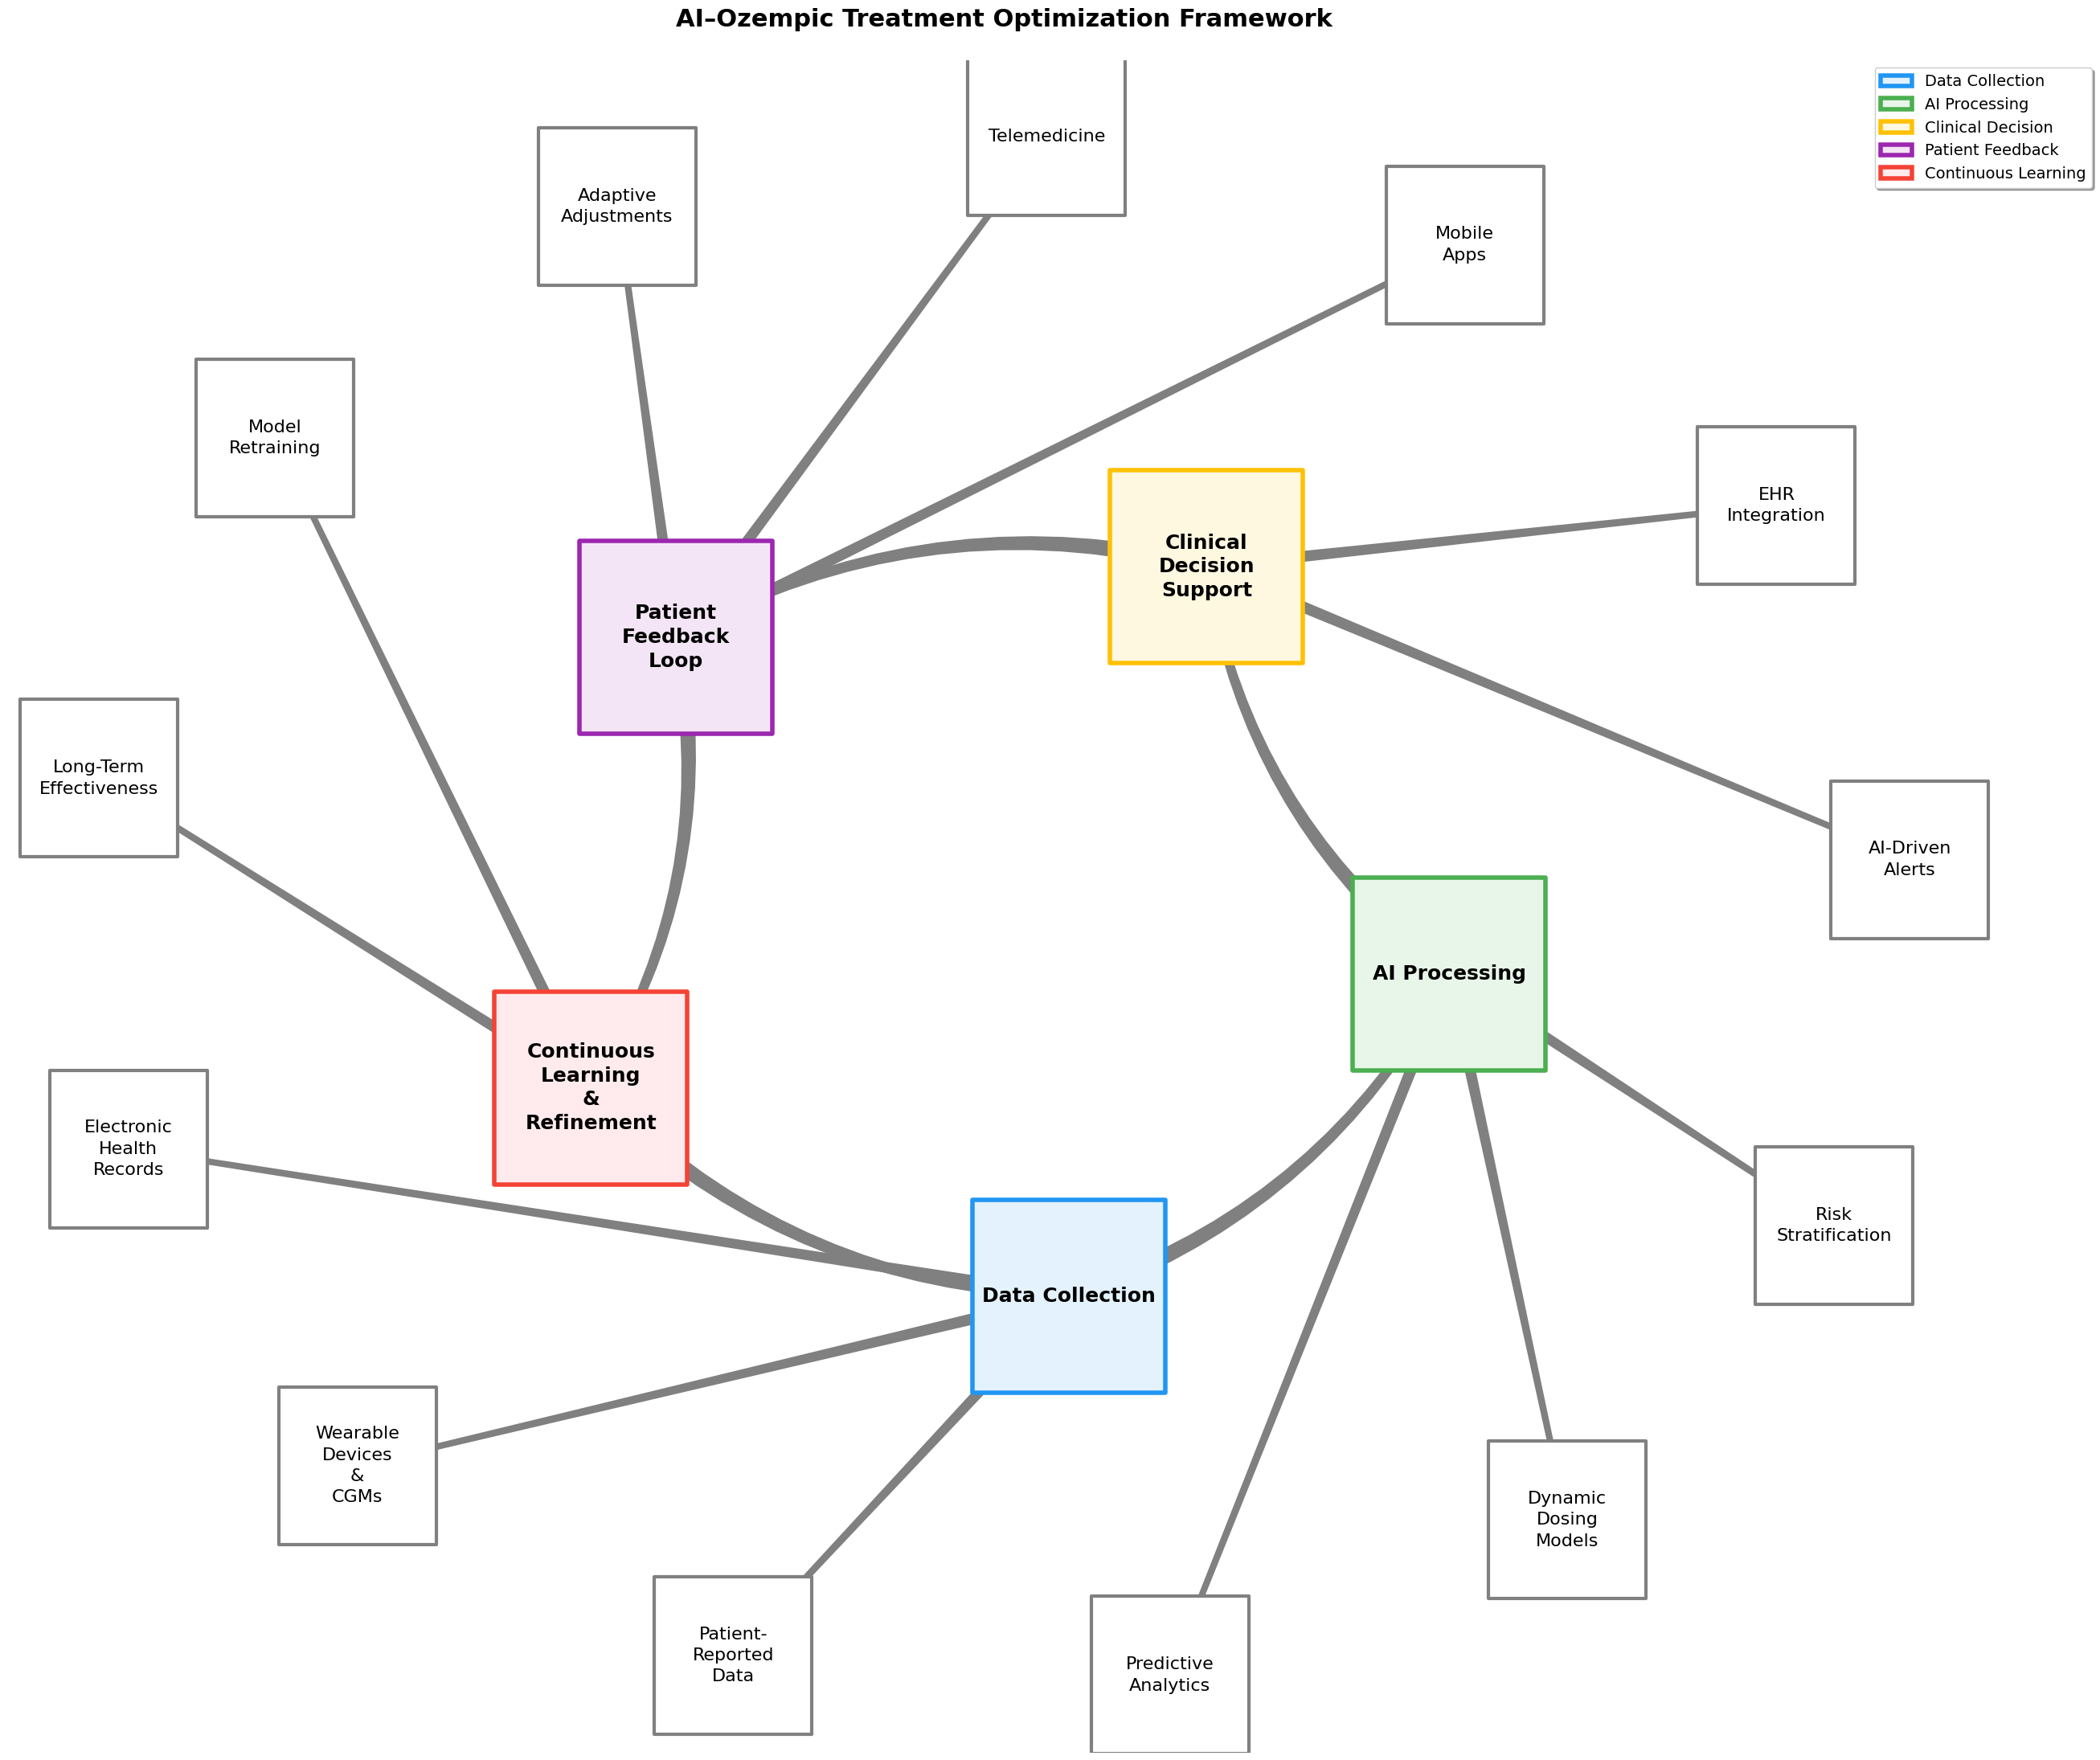

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch

# Configure nodes with three-line labels for selected main nodes and increased sizes
main_nodes = [
    ("Data Collection", {"color": "#e3f2fd", "edge": "#2196f3"}),
    ("AI Processing", {"color": "#e8f5e9", "edge": "#4caf50"}),
    ("Clinical\nDecision\nSupport", {"color": "#fff8e1", "edge": "#ffc107"}),
    ("Patient\nFeedback\nLoop", {"color": "#f3e5f5", "edge": "#9c27b0"}),
    ("Continuous\nLearning\n&\nRefinement", {"color": "#ffebee", "edge": "#f44336"})
]

sub_nodes = [
    ("Electronic\nHealth\nRecords", {"parent": "Data Collection"}),
    ("Wearable\nDevices\n&\nCGMs", {"parent": "Data Collection"}),
    ("Patient-\nReported\nData", {"parent": "Data Collection"}),
    ("Predictive\nAnalytics", {"parent": "AI Processing"}),
    ("Dynamic\nDosing\nModels", {"parent": "AI Processing"}),
    ("Risk\nStratification", {"parent": "AI Processing"}),
    ("AI-Driven\nAlerts", {"parent": "Clinical\nDecision\nSupport"}),
    ("EHR\nIntegration", {"parent": "Clinical\nDecision\nSupport"}),
    ("Mobile\nApps", {"parent": "Patient\nFeedback\nLoop"}),
    ("Telemedicine", {"parent": "Patient\nFeedback\nLoop"}),
    ("Adaptive\nAdjustments", {"parent": "Patient\nFeedback\nLoop"}),
    ("Model\nRetraining", {"parent": "Continuous\nLearning\n&\nRefinement"}),
    ("Long-Term\nEffectiveness", {"parent": "Continuous\nLearning\n&\nRefinement"})
]

# Create graph structure
G = nx.DiGraph()
G.add_nodes_from([(node, attrs) for node, attrs in main_nodes])
G.add_nodes_from([(node, {"parent": attrs["parent"]}) for node, attrs in sub_nodes])

# Main flow connections
main_flow = [n[0] for n in main_nodes]
for i in range(len(main_flow) - 1):
    G.add_edge(main_flow[i], main_flow[i + 1])
G.add_edge(main_flow[-1], main_flow[0])  # Feedback loop

# Sub-node connections
for node, attrs in sub_nodes:
    G.add_edge(attrs["parent"], node)

# Layout
pos = nx.shell_layout(G,
                      nlist=[main_flow, [n[0] for n in sub_nodes]],
                      rotate=30,
                      scale=6)

plt.figure(figsize=(26, 22))

# Draw main nodes
for node, attrs in main_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node],
                           node_size=30000,
                           node_shape="s",
                           node_color=attrs["color"],
                           edgecolors=attrs["edge"],
                           linewidths=4)
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=18, fontweight='bold', linespacing=1.3)

# Draw sub-nodes
nx.draw_networkx_nodes(G, pos, nodelist=[n[0] for n in sub_nodes],
                       node_size=20000,
                       node_shape="s",
                       node_color="white",
                       edgecolors="gray",
                       linewidths=3)
for node, _ in sub_nodes:
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=16, linespacing=1.4)

# Draw curved cycle arrows
for i in range(len(main_flow)):
    start = main_flow[i]
    end = main_flow[(i + 1) % len(main_flow)]
    rad = 0.2 if i % 2 == 0 else -0.2
    arrow = FancyArrowPatch(pos[start], pos[end],
                            connectionstyle=f"arc3,rad={rad}",
                            arrowstyle="fancy,head_length=1.5,head_width=1",
                            linewidth=4, color="gray",
                            mutation_scale=30)
    plt.gca().add_patch(arrow)

# Draw straight sub-node arrows
for node, attrs in sub_nodes:
    arrow = FancyArrowPatch(pos[attrs['parent']], pos[node],
                            arrowstyle="fancy,head_length=1.5,head_width=1",
                            linewidth=3, color="gray",
                            mutation_scale=20)
    plt.gca().add_patch(arrow)

# Title and legend
plt.box(False)
plt.title("AI–Ozempic Treatment Optimization Framework",
          fontsize=22, pad=30, fontweight='black')

legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc="#e3f2fd", ec="#2196f3", lw=4, label="Data Collection"),
    plt.Rectangle((0, 0), 1, 1, fc="#e8f5e9", ec="#4caf50", lw=4, label="AI Processing"),
    plt.Rectangle((0, 0), 1, 1, fc="#fff8e1", ec="#ffc107", lw=4, label="Clinical Decision"),
    plt.Rectangle((0, 0), 1, 1, fc="#f3e5f5", ec="#9c27b0", lw=4, label="Patient Feedback"),
    plt.Rectangle((0, 0), 1, 1, fc="#ffebee", ec="#f44336", lw=4, label="Continuous Learning")
]
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.05, 1),
           fontsize=14, title_fontsize=16, frameon=True, shadow=True)

plt.tight_layout()
plt.show()


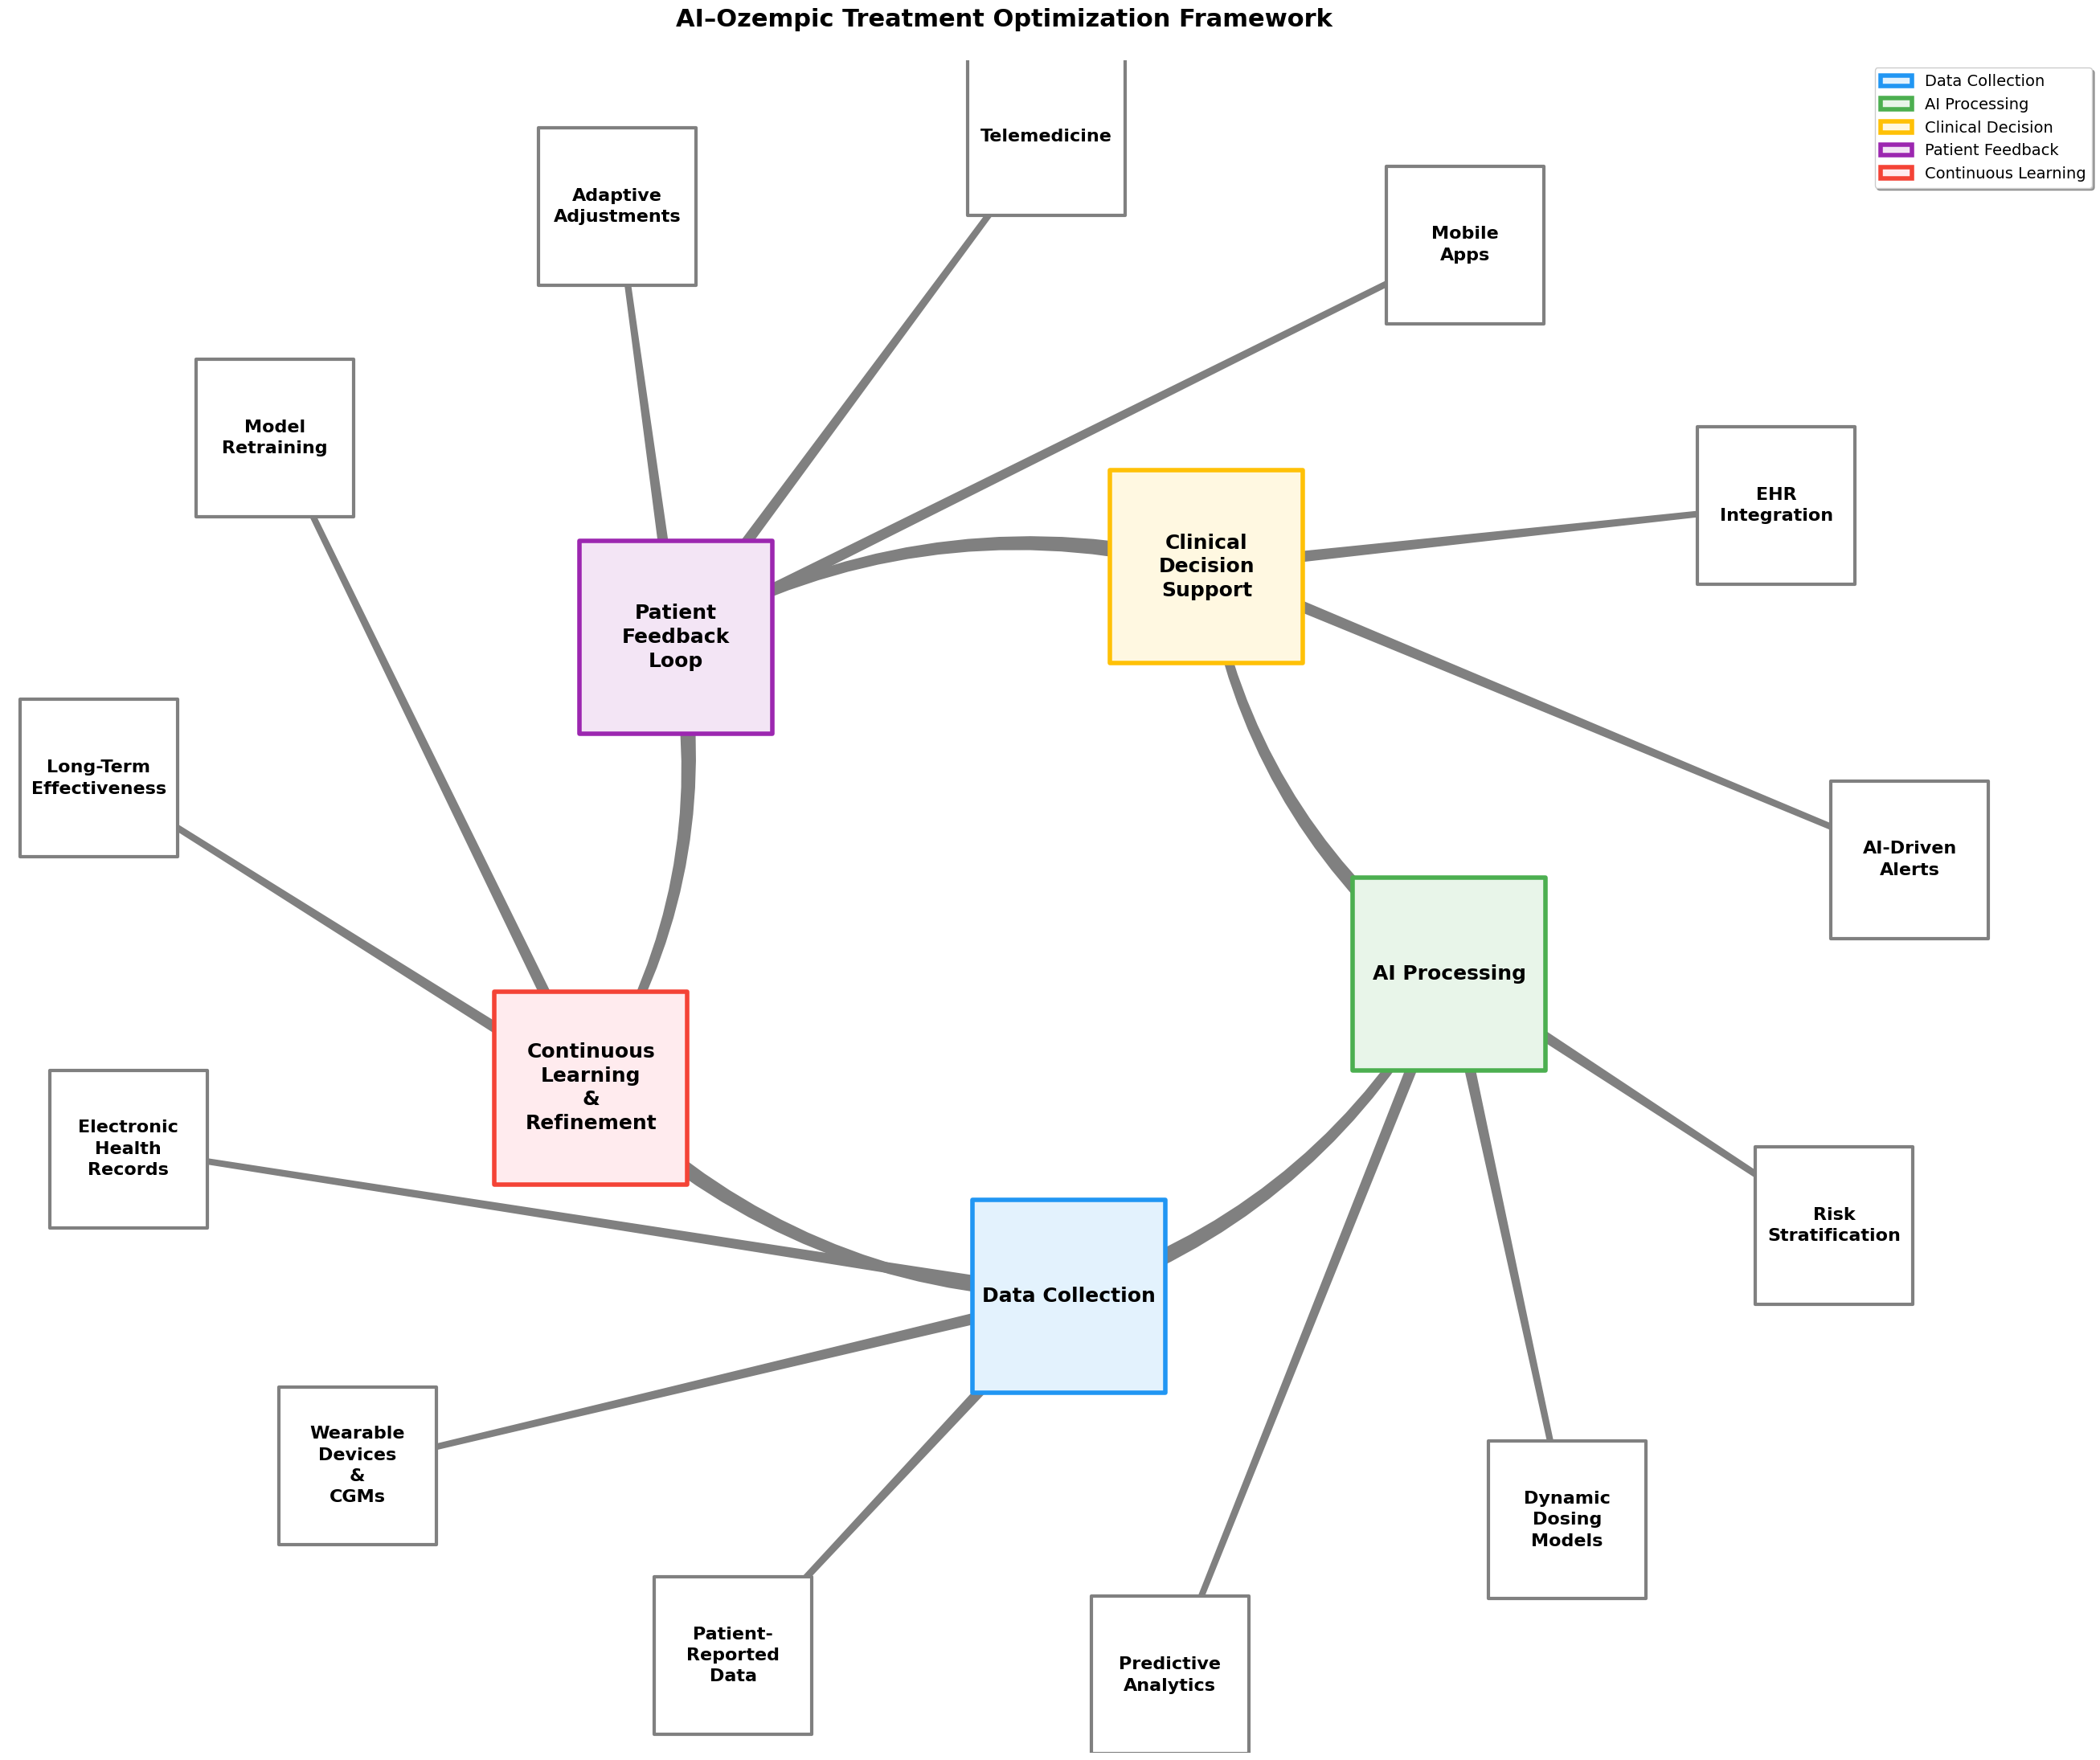

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch

# Configure nodes with three-line labels for selected main nodes and increased sizes
main_nodes = [
    ("Data Collection", {"color": "#e3f2fd", "edge": "#2196f3"}),
    ("AI Processing", {"color": "#e8f5e9", "edge": "#4caf50"}),
    ("Clinical\nDecision\nSupport", {"color": "#fff8e1", "edge": "#ffc107"}),
    ("Patient\nFeedback\nLoop", {"color": "#f3e5f5", "edge": "#9c27b0"}),
    ("Continuous\nLearning\n&\nRefinement", {"color": "#ffebee", "edge": "#f44336"})
]

sub_nodes = [
    ("Electronic\nHealth\nRecords", {"parent": "Data Collection"}),
    ("Wearable\nDevices\n&\nCGMs", {"parent": "Data Collection"}),
    ("Patient-\nReported\nData", {"parent": "Data Collection"}),
    ("Predictive\nAnalytics", {"parent": "AI Processing"}),
    ("Dynamic\nDosing\nModels", {"parent": "AI Processing"}),
    ("Risk\nStratification", {"parent": "AI Processing"}),
    ("AI-Driven\nAlerts", {"parent": "Clinical\nDecision\nSupport"}),
    ("EHR\nIntegration", {"parent": "Clinical\nDecision\nSupport"}),
    ("Mobile\nApps", {"parent": "Patient\nFeedback\nLoop"}),
    ("Telemedicine", {"parent": "Patient\nFeedback\nLoop"}),
    ("Adaptive\nAdjustments", {"parent": "Patient\nFeedback\nLoop"}),
    ("Model\nRetraining", {"parent": "Continuous\nLearning\n&\nRefinement"}),
    ("Long-Term\nEffectiveness", {"parent": "Continuous\nLearning\n&\nRefinement"})
]

# Create graph structure
G = nx.DiGraph()
G.add_nodes_from([(node, attrs) for node, attrs in main_nodes])
G.add_nodes_from([(node, {"parent": attrs["parent"]}) for node, attrs in sub_nodes])

# Main flow connections
main_flow = [n[0] for n in main_nodes]
for i in range(len(main_flow) - 1):
    G.add_edge(main_flow[i], main_flow[i + 1])
G.add_edge(main_flow[-1], main_flow[0])  # Feedback loop

# Sub-node connections
for node, attrs in sub_nodes:
    G.add_edge(attrs["parent"], node)

# Layout
pos = nx.shell_layout(G,
                      nlist=[main_flow, [n[0] for n in sub_nodes]],
                      rotate=30,
                      scale=6)

plt.figure(figsize=(26, 22))

# Draw main nodes
for node, attrs in main_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node],
                           node_size=30000,
                           node_shape="s",
                           node_color=attrs["color"],
                           edgecolors=attrs["edge"],
                           linewidths=4)
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=18, fontweight='bold', linespacing=1.3)

# Draw sub-nodes with bold text
nx.draw_networkx_nodes(G, pos, nodelist=[n[0] for n in sub_nodes],
                       node_size=20000,
                       node_shape="s",
                       node_color="white",
                       edgecolors="gray",
                       linewidths=3)
for node, _ in sub_nodes:
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=16, fontweight='bold', linespacing=1.4)

# Draw curved cycle arrows
for i in range(len(main_flow)):
    start = main_flow[i]
    end = main_flow[(i + 1) % len(main_flow)]
    rad = 0.2 if i % 2 == 0 else -0.2
    arrow = FancyArrowPatch(pos[start], pos[end],
                            connectionstyle=f"arc3,rad={rad}",
                            arrowstyle="fancy,head_length=1.5,head_width=1",
                            linewidth=4, color="gray",
                            mutation_scale=30)
    plt.gca().add_patch(arrow)

# Draw straight sub-node arrows
for node, attrs in sub_nodes:
    arrow = FancyArrowPatch(pos[attrs['parent']], pos[node],
                            arrowstyle="fancy,head_length=1.5,head_width=1",
                            linewidth=3, color="gray",
                            mutation_scale=20)
    plt.gca().add_patch(arrow)

# Title and legend
plt.box(False)
plt.title("AI–Ozempic Treatment Optimization Framework",
          fontsize=22, pad=30, fontweight='black')

legend_elements = [
    plt.Rectangle((0, 0), 1, 1, fc="#e3f2fd", ec="#2196f3", lw=4, label="Data Collection"),
    plt.Rectangle((0, 0), 1, 1, fc="#e8f5e9", ec="#4caf50", lw=4, label="AI Processing"),
    plt.Rectangle((0, 0), 1, 1, fc="#fff8e1", ec="#ffc107", lw=4, label="Clinical Decision"),
    plt.Rectangle((0, 0), 1, 1, fc="#f3e5f5", ec="#9c27b0", lw=4, label="Patient Feedback"),
    plt.Rectangle((0, 0), 1, 1, fc="#ffebee", ec="#f44336", lw=4, label="Continuous Learning")
]
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.05, 1),
           fontsize=14, title_fontsize=16, frameon=True, shadow=True)

plt.tight_layout()
plt.show()


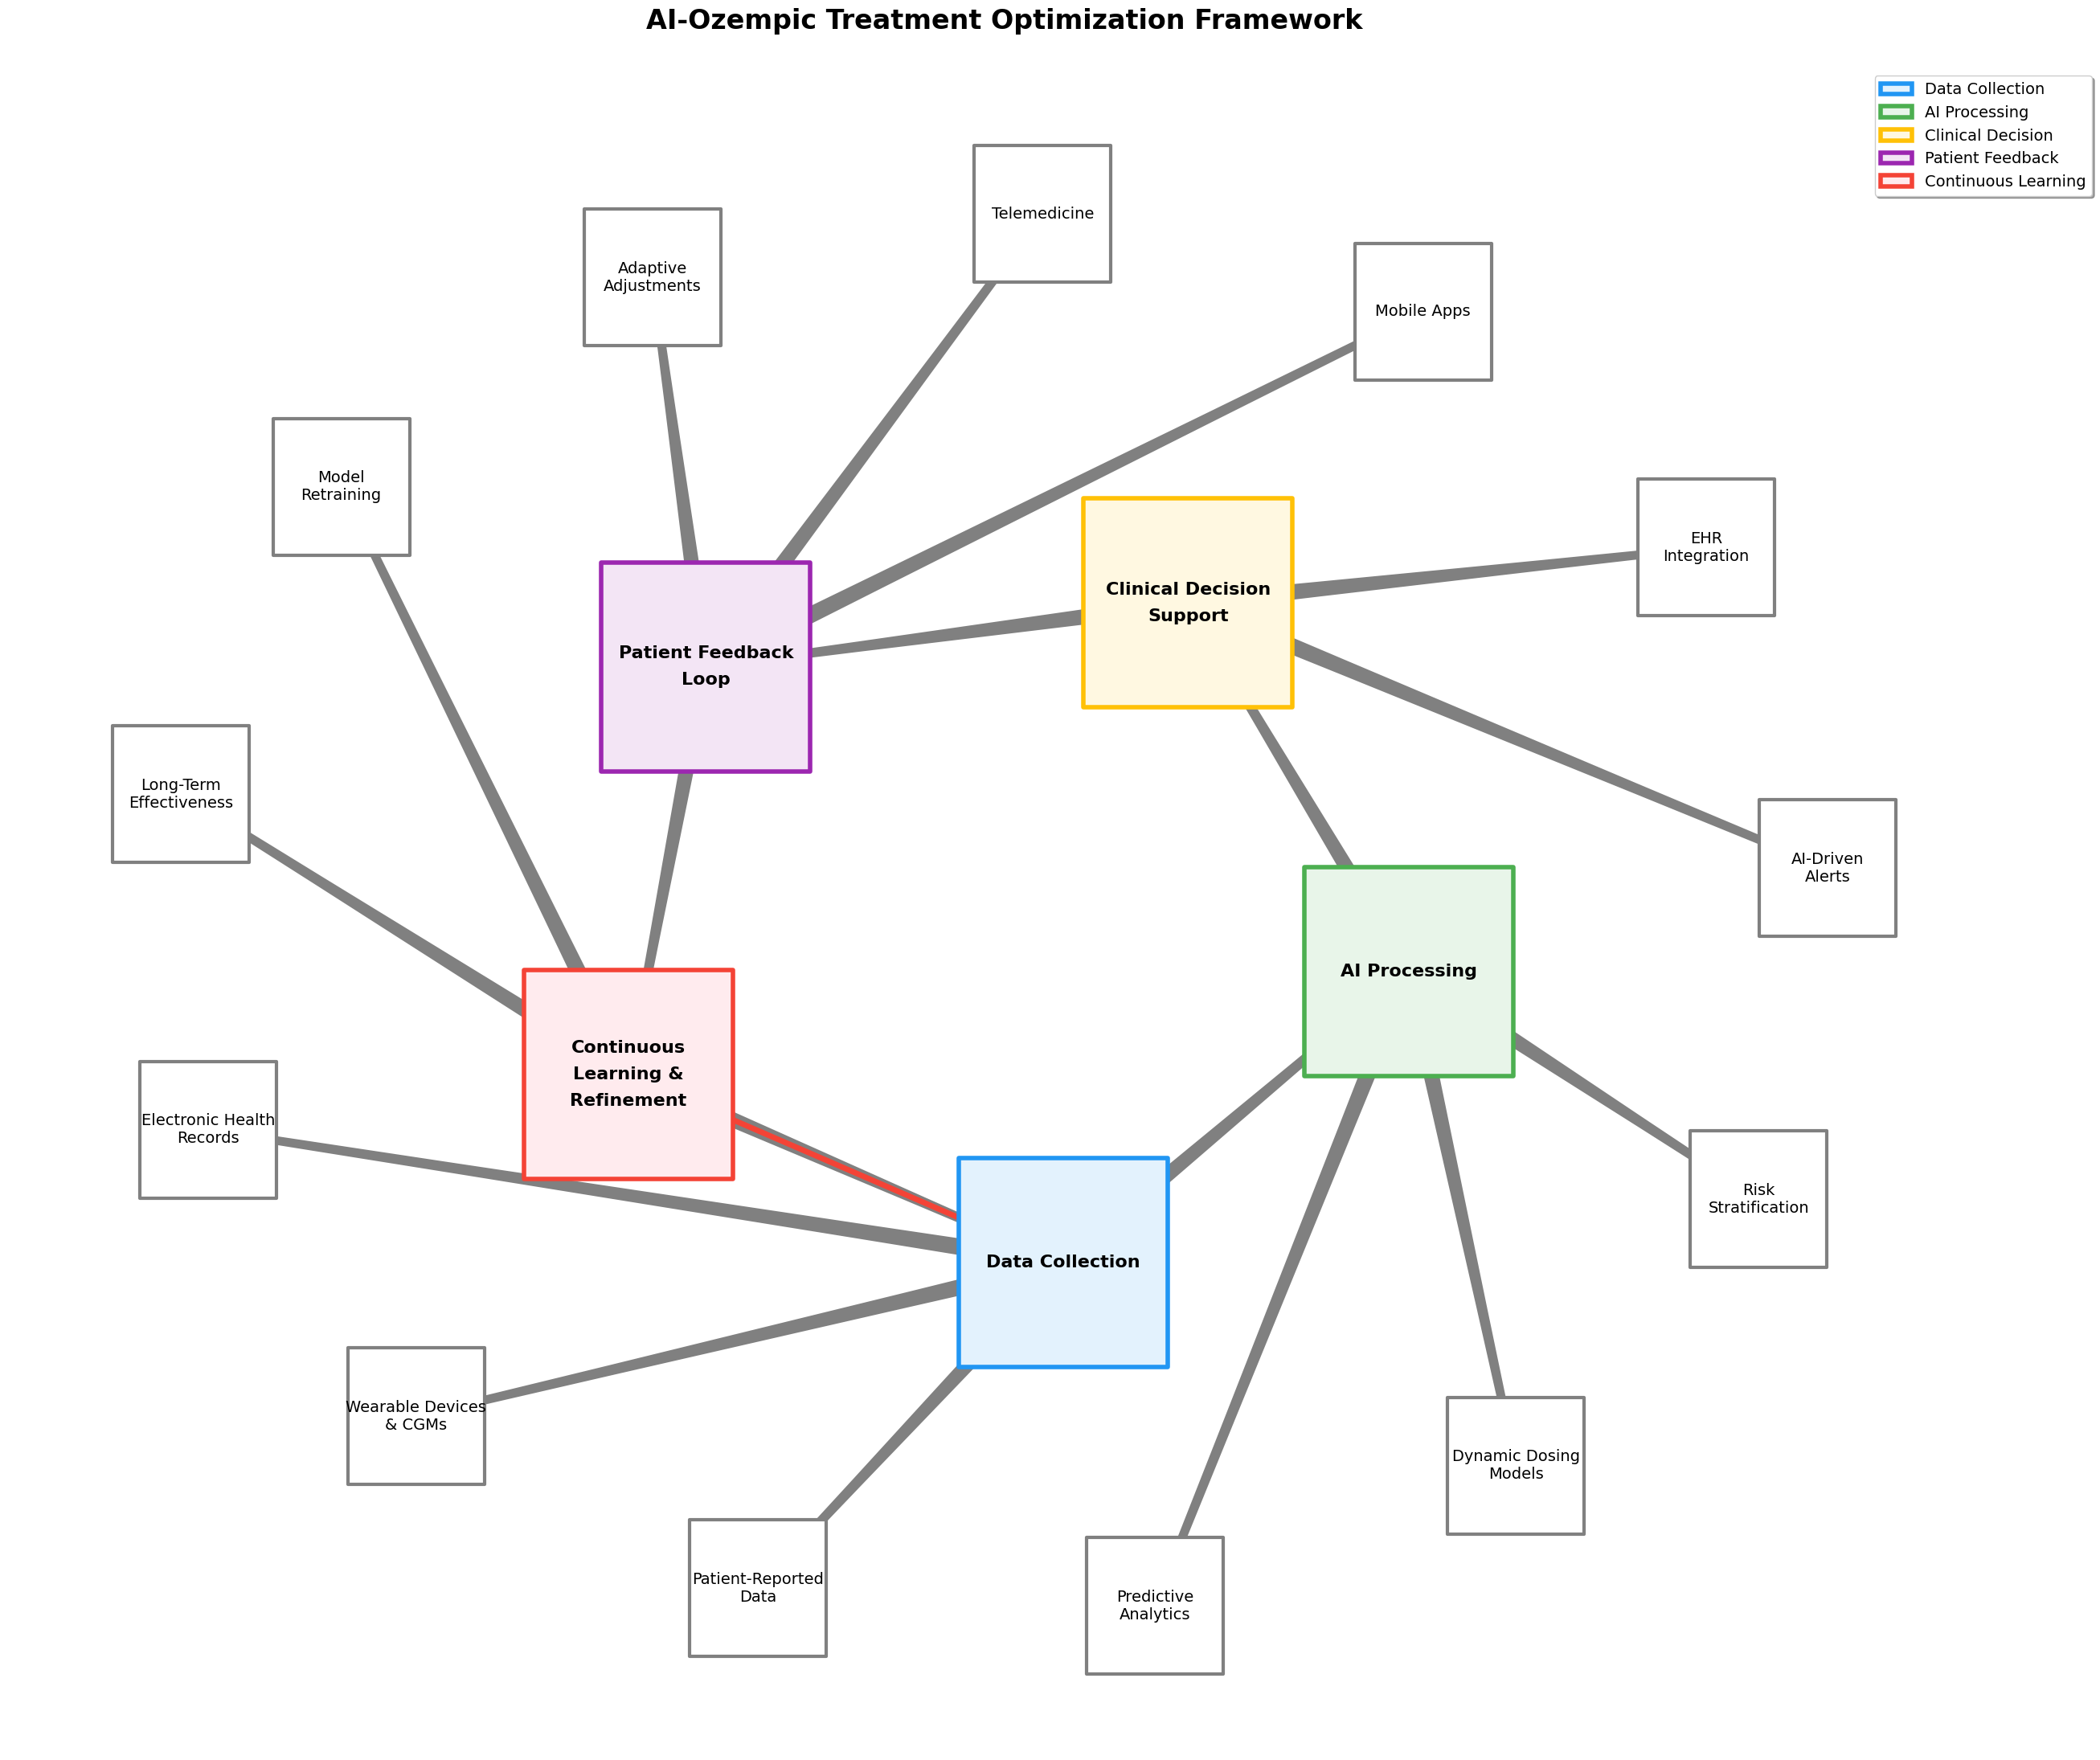

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Configure nodes with 3-line label
main_nodes = [
    ("Data Collection", {"color": "#e3f2fd", "edge": "#2196f3"}),
    ("AI Processing", {"color": "#e8f5e9", "edge": "#4caf50"}),
    ("Clinical Decision Support", {"color": "#fff8e1", "edge": "#ffc107"}),
    ("Patient Feedback Loop", {"color": "#f3e5f5", "edge": "#9c27b0"}),
    ("Continuous Learning & Refinement", {"color": "#ffebee", "edge": "#f44336"})
]

# Create display labels mapping
display_labels = {
    "Data Collection": "Data Collection",
    "AI Processing": "AI Processing",
    "Clinical Decision Support": "Clinical Decision\nSupport",
    "Patient Feedback Loop": "Patient Feedback\nLoop",
    "Continuous Learning & Refinement": "Continuous\nLearning &\nRefinement"
}

sub_nodes = [
    ("Electronic Health\nRecords", {"parent": "Data Collection"}),
    ("Wearable Devices\n& CGMs", {"parent": "Data Collection"}),
    ("Patient-Reported\nData", {"parent": "Data Collection"}),
    ("Predictive\nAnalytics", {"parent": "AI Processing"}),
    ("Dynamic Dosing\nModels", {"parent": "AI Processing"}),
    ("Risk\nStratification", {"parent": "AI Processing"}),
    ("AI-Driven\nAlerts", {"parent": "Clinical Decision Support"}),
    ("EHR\nIntegration", {"parent": "Clinical Decision Support"}),
    ("Mobile Apps", {"parent": "Patient Feedback Loop"}),
    ("Telemedicine", {"parent": "Patient Feedback Loop"}),
    ("Adaptive\nAdjustments", {"parent": "Patient Feedback Loop"}),
    ("Model\nRetraining", {"parent": "Continuous Learning & Refinement"}),
    ("Long-Term\nEffectiveness", {"parent": "Continuous Learning & Refinement"})
]

# Create graph structure
G = nx.DiGraph()
G.add_nodes_from([(node[0], node[1]) for node in main_nodes])
G.add_nodes_from([(node[0], {"parent": node[1]["parent"]}) for node in sub_nodes])

# Create connections
main_flow = [n[0] for n in main_nodes]
for i in range(len(main_flow)-1):
    G.add_edge(main_flow[i], main_flow[i+1])
G.add_edge(main_flow[-1], main_flow[0])  # Feedback loop

for node, attrs in sub_nodes:
    G.add_edge(attrs["parent"], node)

# Create expanded layout
pos = nx.shell_layout(G,
                    nlist=[main_flow, [n[0] for n in sub_nodes]],
                    rotate=30,
                    scale=5)

plt.figure(figsize=(26, 22))  # Extra large canvas

# Draw MEGA MAIN NODES
for node, attrs in main_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node],
                         node_size=35000,  # Increased size for 3 lines
                         node_shape="s",
                         node_color=attrs["color"],
                         edgecolors=attrs["edge"],
                         linewidths=4)

    # Use display label with line breaks
    label = display_labels.get(node, node)
    plt.text(pos[node][0], pos[node][1], label,
             ha='center', va='center',
             fontsize=16,
             fontweight='bold',
             linespacing=1.8)

# Draw LARGE SUBNODES
nx.draw_networkx_nodes(G, pos, nodelist=[n[0] for n in sub_nodes],
                      node_size=15000,
                      node_shape="s",
                      node_color="white",
                      edgecolors="gray",
                      linewidths=3)
for node, _ in sub_nodes:
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=14,
             linespacing=1.2)

# Draw prominent edges
nx.draw_networkx_edges(G, pos,
                      arrowstyle="fancy,head_length=1.5,head_width=1",
                      arrowsize=30,
                      width=4,
                      edge_color="gray")
nx.draw_networkx_edges(G, pos, edgelist=[(main_flow[-1], main_flow[0])],
                      edge_color="#f44336",
                      width=5,
                      arrowsize=35)

# Formatting
plt.box(False)
plt.title("AI-Ozempic Treatment Optimization Framework",
         fontsize=24, pad=35, fontweight='black')

# Enhanced legend
legend_elements = [
    plt.Rectangle((0,0), 1, 1, fc="#e3f2fd", ec="#2196f3", lw=4, label="Data Collection"),
    plt.Rectangle((0,0), 1, 1, fc="#e8f5e9", ec="#4caf50", lw=4, label="AI Processing"),
    plt.Rectangle((0,0), 1, 1, fc="#fff8e1", ec="#ffc107", lw=4, label="Clinical Decision"),
    plt.Rectangle((0,0), 1, 1, fc="#f3e5f5", ec="#9c27b0", lw=4, label="Patient Feedback"),
    plt.Rectangle((0,0), 1, 1, fc="#ffebee", ec="#f44336", lw=4, label="Continuous Learning")
]

plt.legend(handles=legend_elements,
           loc="upper right",
           bbox_to_anchor=(1.05, 1),
           fontsize=14,
           title_fontsize=16,
           frameon=True,
           shadow=True)

plt.tight_layout()
plt.savefig("AI-Ozempic_Framework_Poster.png", dpi=400, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Configure nodes with 3-line label
main_nodes = [
    ("Data Collection", {"color": "#e3f2fd", "edge": "#2196f3"}),
    ("AI Processing", {"color": "#e8f5e9", "edge": "#4caf50"}),
    ("Clinical Decision Support", {"color": "#fff8e1", "edge": "#ffc107"}),
    ("Patient Feedback Loop", {"color": "#f3e5f5", "edge": "#9c27b0"}),
    ("Continuous Learning & Refinement", {"color": "#ffebee", "edge": "#f44336"})
]

# Create display labels mapping
display_labels = {
    "Data Collection": "Data Collection",
    "AI Processing": "AI Processing",
    "Clinical Decision Support": "Clinical Decision\nSupport",
    "Patient Feedback Loop": "Patient Feedback\nLoop",
    "Continuous Learning & Refinement": "Continuous\nLearning &\nRefinement"
}

sub_nodes = [
    ("Electronic Health\nRecords", {"parent": "Data Collection"}),
    ("Wearable Devices\n& CGMs", {"parent": "Data Collection"}),
    ("Patient-Reported\nData", {"parent": "Data Collection"}),
    ("Predictive\nAnalytics", {"parent": "AI Processing"}),
    ("Dynamic Dosing\nModels", {"parent": "AI Processing"}),
    ("Risk\nStratification", {"parent": "AI Processing"}),
    ("AI-Driven\nAlerts", {"parent": "Clinical Decision Support"}),
    ("EHR\nIntegration", {"parent": "Clinical Decision Support"}),
    ("Mobile Apps", {"parent": "Patient Feedback Loop"}),
    ("Telemedicine", {"parent": "Patient Feedback Loop"}),
    ("Adaptive\nAdjustments", {"parent": "Patient Feedback Loop"}),
    ("Model\nRetraining", {"parent": "Continuous Learning & Refinement"}),
    ("Long-Term\nEffectiveness", {"parent": "Continuous Learning & Refinement"})
]

# Create graph structure
G = nx.DiGraph()
G.add_nodes_from([(node[0], node[1]) for node in main_nodes])
G.add_nodes_from([(node[0], {"parent": node[1]["parent"]}) for node in sub_nodes])

# Create connections
main_flow = [n[0] for n in main_nodes]
for i in range(len(main_flow)-1):
    G.add_edge(main_flow[i], main_flow[i+1])
G.add_edge(main_flow[-1], main_flow[0])  # Feedback loop

for node, attrs in sub_nodes:
    G.add_edge(attrs["parent"], node)

# Create expanded layout
pos = nx.shell_layout(G,
                    nlist=[main_flow, [n[0] for n in sub_nodes]],
                    rotate=30,
                    scale=5)

plt.figure(figsize=(26, 22))  # Extra large canvas

# Draw MEGA MAIN NODES
for node, attrs in main_nodes:
    nx.draw_networkx_nodes(G, pos, nodelist=[node],
                         node_size=35000,  # Increased size for 3 lines
                         node_shape="s",
                         node_color=attrs["color"],
                         edgecolors=attrs["edge"],
                         linewidths=4)

    # Use display label with line breaks
    label = display_labels.get(node, node)
    plt.text(pos[node][0], pos[node][1], label,
             ha='center', va='center',
             fontsize=16,
             fontweight='bold',
             linespacing=1.8)

# Draw LARGE SUBNODES
nx.draw_networkx_nodes(G, pos, nodelist=[n[0] for n in sub_nodes],
                      node_size=15000,
                      node_shape="s",
                      node_color="white",
                      edgecolors="gray",
                      linewidths=3)
for node, _ in sub_nodes:
    plt.text(pos[node][0], pos[node][1], node,
             ha='center', va='center',
             fontsize=14,
             linespacing=1.2)

# Draw prominent edges
nx.draw_networkx_edges(G, pos,
                      arrowstyle="fancy,head_length=1.5,head_width=1",
                      arrowsize=30,
                      width=4,
                      edge_color="gray")
nx.draw_networkx_edges(G, pos, edgelist=[(main_flow[-1], main_flow[0])],
                      edge_color="#f44336",
                      width=5,
                      arrowsize=35)

# Formatting
plt.box(False)
plt.title("AI-Ozempic Treatment Optimization Framework",
         fontsize=24, pad=35, fontweight='black')

# Enhanced legend
legend_elements = [
    plt.Rectangle((0,0), 1, 1, fc="#e3f2fd", ec="#2196f3", lw=4, label="Data Collection"),
    plt.Rectangle((0,0), 1, 1, fc="#e8f5e9", ec="#4caf50", lw=4, label="AI Processing"),
    plt.Rectangle((0,0), 1, 1, fc="#fff8e1", ec="#ffc107", lw=4, label="Clinical Decision"),
    plt.Rectangle((0,0), 1, 1, fc="#f3e5f5", ec="#9c27b0", lw=4, label="Patient Feedback"),
    plt.Rectangle((0,0), 1, 1, fc="#ffebee", ec="#f44336", lw=4, label="Continuous Learning")
]

plt.legend(handles=legend_elements,
           loc="upper right",
           bbox_to_anchor=(1.05, 1),
           fontsize=14,
           title_fontsize=16,
           frameon=True,
           shadow=True)

plt.tight_layout()
plt.savefig("AI-Ozempic_Framework_Poster.png", dpi=400, bbox_inches="tight")
plt.show()

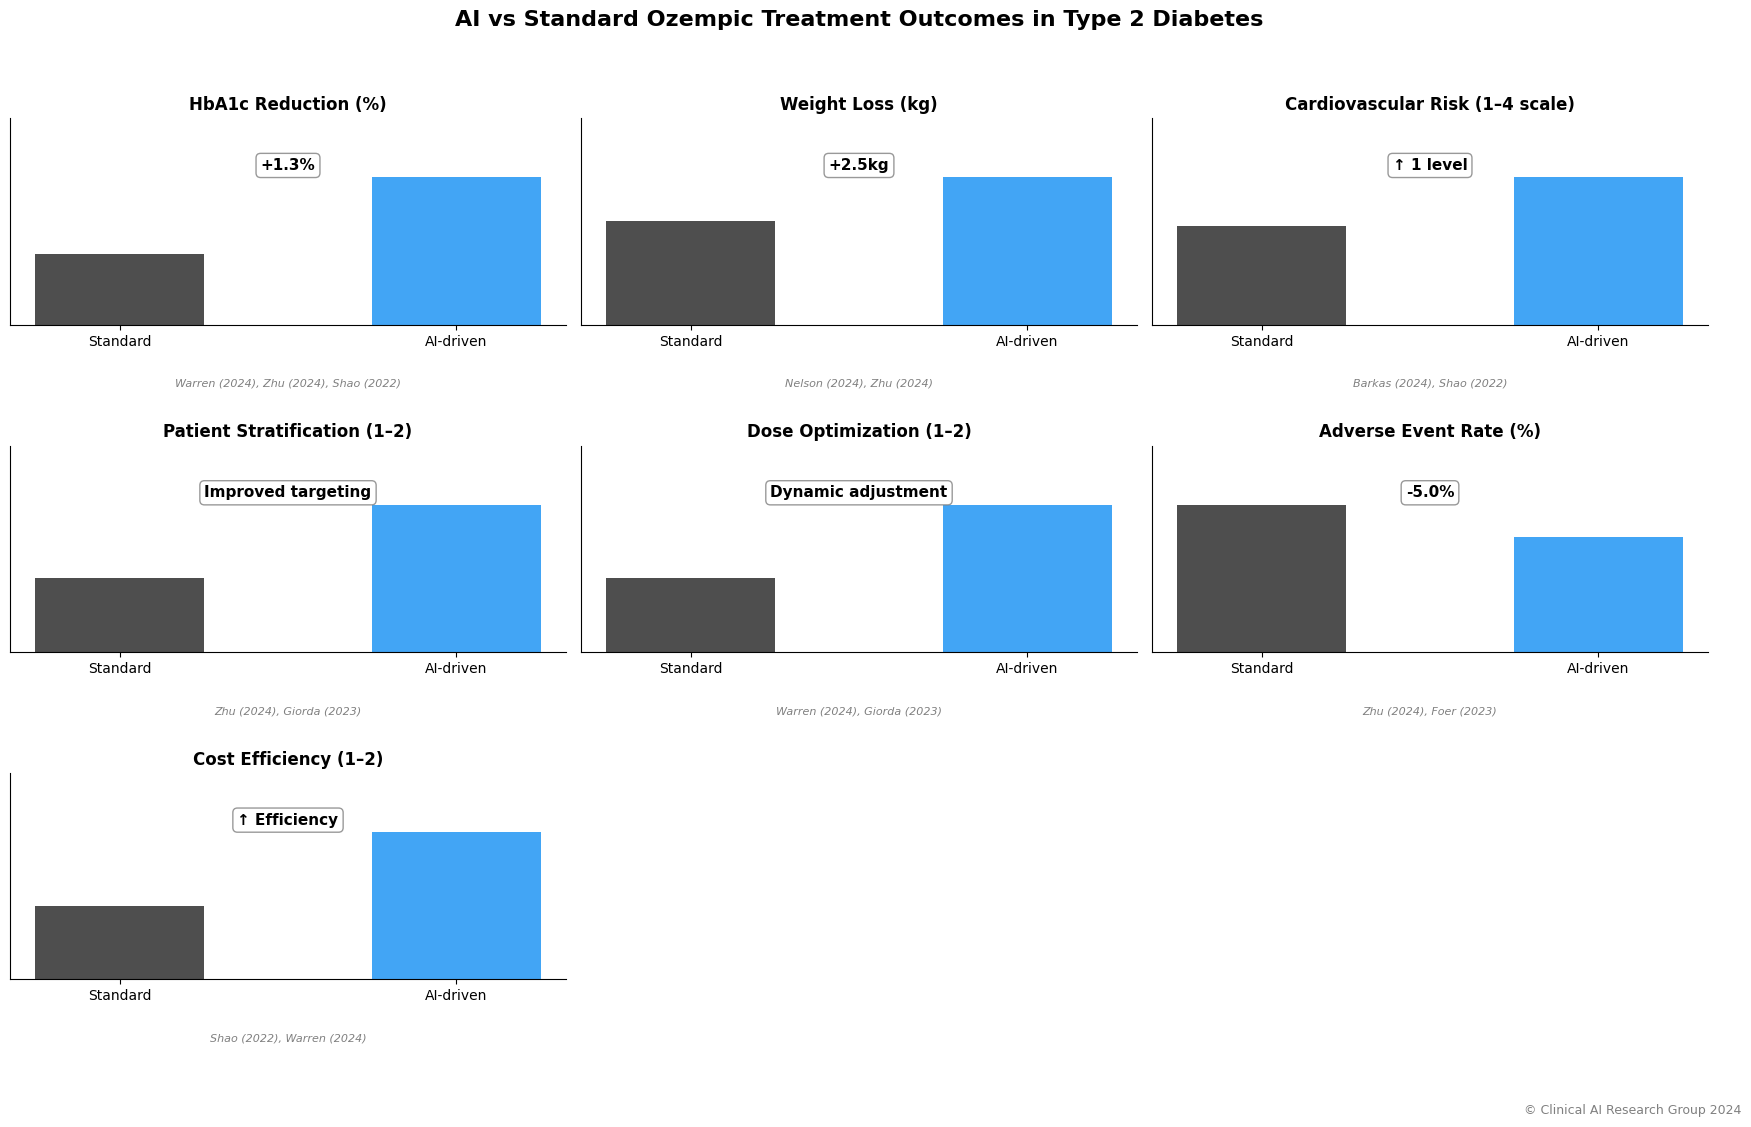

In [ ]:
# Rebuild the figure using a clear and well-organized layout:
# - Remove radial chart and use a grid of consistent bar charts
# - Align all charts uniformly with same y-axis formatting
# - Add clear improvement labels and reference text

import matplotlib.pyplot as plt
import numpy as np

# Metric data
metrics = {
    "HbA1c Reduction (%)": {"Standard": 1.2, "AI": 2.5, "Improvement": "+1.3%", "Evidence": "Warren (2024), Zhu (2024), Shao (2022)"},
    "Weight Loss (kg)": {"Standard": 6.0, "AI": 8.5, "Improvement": "+2.5kg", "Evidence": "Nelson (2024), Zhu (2024)"},
    "Cardiovascular Risk (1–4 scale)": {"Standard": 2, "AI": 3, "Improvement": "↑ 1 level", "Evidence": "Barkas (2024), Shao (2022)"},
    "Patient Stratification (1–2)": {"Standard": 1, "AI": 2, "Improvement": "Improved targeting", "Evidence": "Zhu (2024), Giorda (2023)"},
    "Dose Optimization (1–2)": {"Standard": 1, "AI": 2, "Improvement": "Dynamic adjustment", "Evidence": "Warren (2024), Giorda (2023)"},
    "Adverse Event Rate (%)": {"Standard": 22.5, "AI": 17.5, "Improvement": "-5.0%", "Evidence": "Zhu (2024), Foer (2023)"},
    "Cost Efficiency (1–2)": {"Standard": 1, "AI": 2, "Improvement": "↑ Efficiency", "Evidence": "Shao (2022), Warren (2024)"}
}

# Setup
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

standard_color = '#4e4e4e'
ai_color = '#42a5f5'

# Plot
for idx, (metric, data) in enumerate(metrics.items()):
    ax = axes[idx]
    std, ai = data["Standard"], data["AI"]
    ax.bar(["Standard", "AI-driven"], [std, ai], color=[standard_color, ai_color], width=0.5)

    # Title and value label
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.text(0.5, max(std, ai) * 1.05, data["Improvement"],
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='gray', alpha=0.8))

    # Evidence
    ax.text(0.5, -0.3, data["Evidence"], transform=ax.transAxes,
            ha='center', fontsize=8, style='italic', color='gray')

    # Style
    ax.set_ylim(0, max(std, ai) * 1.4)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel("")
    ax.set_yticks([])

# Remove unused subplot (last cell if needed)
for i in range(len(metrics), len(axes)):
    fig.delaxes(axes[i])

# Main title
fig.suptitle("AI vs Standard Ozempic Treatment Outcomes in Type 2 Diabetes",
             fontsize=16, fontweight='bold', y=0.93)

# Footer
fig.text(0.99, 0.01, "© Clinical AI Research Group 2024", ha='right', fontsize=9, color='gray')

plt.tight_layout(rect=[0.02, 0.04, 0.98, 0.90])
plt.show()


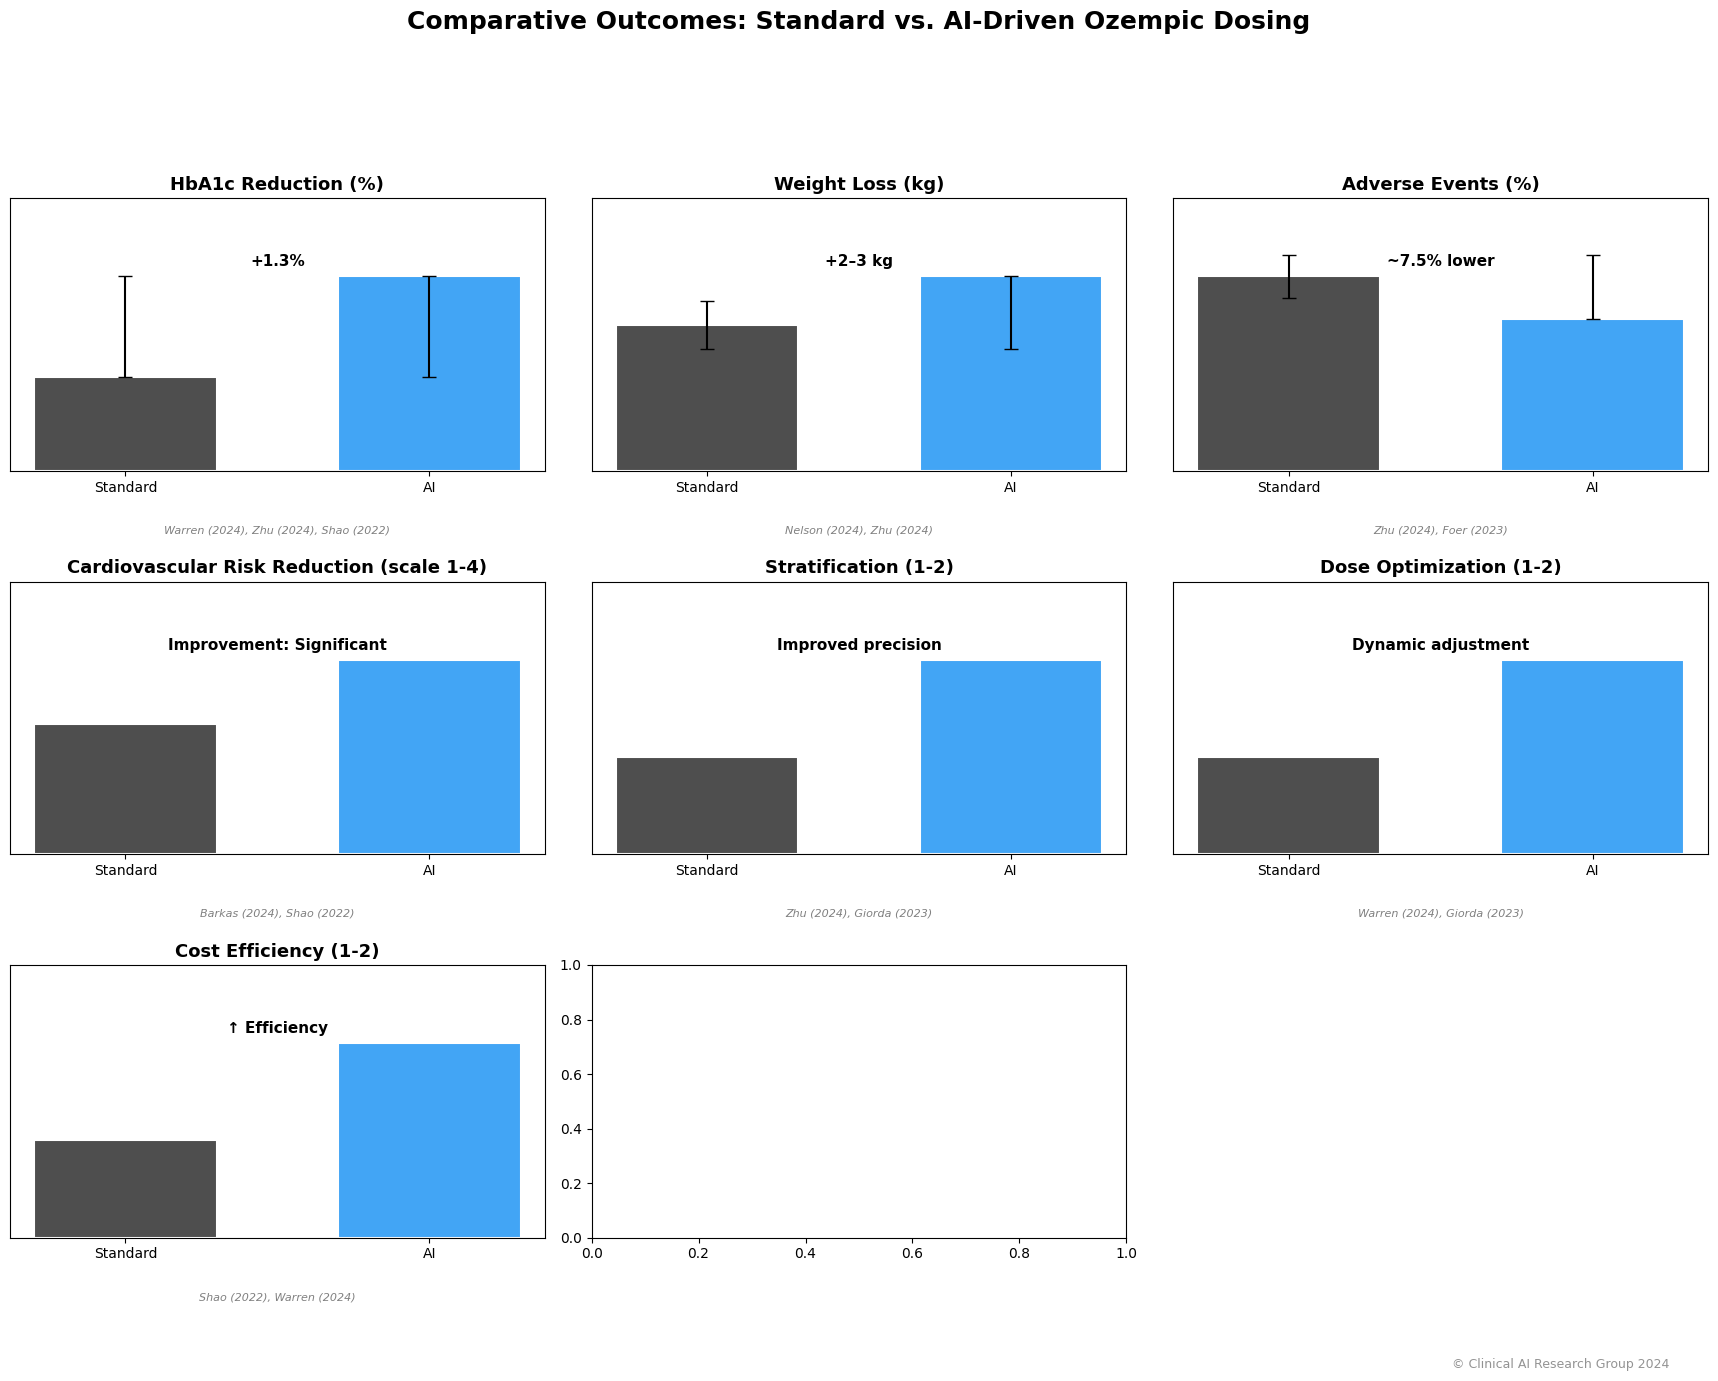

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data: Insights from the table you provided
metrics = {
    "HbA1c Reduction (%)": {
        "Standard": 1.2, "AI": 2.5, "range": [1.2, 2.5], "Improvement": "+1.3%",
        "Evidence": "Warren (2024), Zhu (2024), Shao (2022)"
    },
    "Weight Loss (kg)": {
        "Standard": 6.0, "AI": 8.0, "range": [5.0, 7.0], "Improvement": "+2–3 kg",
        "Evidence": "Nelson (2024), Zhu (2024)"
    },
    "Adverse Events (%)": {
        "Standard": 22.5, "AI": 17.5, "range": [20, 25], "Improvement": "~7.5% lower",
        "Evidence": "Zhu (2024), Foer (2023)"
    },
    "Cardiovascular Risk Reduction (scale 1-4)": {
        "Standard": 2, "AI": 3, "Improvement": "Improvement: Significant",
        "Evidence": "Barkas (2024), Shao (2022)"
    },
    "Stratification (1-2)": {
        "Standard": 1, "AI": 2, "Improvement": "Improved precision",
        "Evidence": "Zhu (2024), Giorda (2023)"
    },
    "Dose Optimization (1-2)": {
        "Standard": 1, "AI": 2, "Improvement": "Dynamic adjustment",
        "Evidence": "Warren (2024), Giorda (2023)"
    },
    "Cost Efficiency (1-2)": {
        "Standard": 1, "AI": 2, "Improvement": "↑ Efficiency",
        "Evidence": "Shao (2022), Warren (2024)"
    }
}

# Set up figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
axes = axes.flatten()

# Bar colors for Standard and AI
standard_color = '#4e4e4e'
ai_color = '#42a5f5'

# Plotting data
for idx, (metric, data) in enumerate(metrics.items()):
    ax = axes[idx]

    # Standard and AI bars
    ax.bar(["Standard", "AI-driven"], [data["Standard"], data["AI"]], color=[standard_color, ai_color], width=0.6, edgecolor='white', linewidth=1.5)

    # If range is available, add error bars
    if "range" in data:
        # Ensure error bars are positive values
        standard_error_up = max(0, data["range"][1] - data["Standard"])
        standard_error_down = max(0, data["Standard"] - data["range"][0])
        ai_error_up = max(0, data["range"][1] - data["AI"])
        ai_error_down = max(0, data["AI"] - data["range"][0])

        ax.errorbar(0, data["Standard"], yerr=[[standard_error_down], [standard_error_up]], fmt='none', color='black', capsize=5)
        ax.errorbar(1, data["AI"], yerr=[[ai_error_down], [ai_error_up]], fmt='none', color='black', capsize=5)

    # Title and Improvement label
    ax.set_title(metric, fontsize=13, fontweight='bold')
    ax.text(0.5, max(data["Standard"], data["AI"]) * 1.05, data["Improvement"], ha='center', fontsize=11, fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

    # Evidence
    ax.text(0.5, -0.2, data["Evidence"], ha='center', va='top', transform=ax.transAxes, fontsize=8, style='italic', color='gray')

    # Formatting the axes
    ax.set_ylim(0, max(data["Standard"], data["AI"]) * 1.4)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Standard', 'AI'], fontsize=10)
    ax.set_yticks([])  # Hide y-ticks for cleaner look

# Remove the last empty subplot
fig.delaxes(axes[-1])

# Adjust layout and add titles
plt.suptitle("Comparative Outcomes: Standard vs. AI-Driven Ozempic Dosing", fontsize=18, fontweight='bold')
fig.text(0.95, 0.01, "© Clinical AI Research Group 2024", ha='right', fontsize=9, color='#666666', alpha=0.7)

# Show the plot
plt.tight_layout(rect=[0.02, 0.04, 0.98, 0.90])
plt.show()


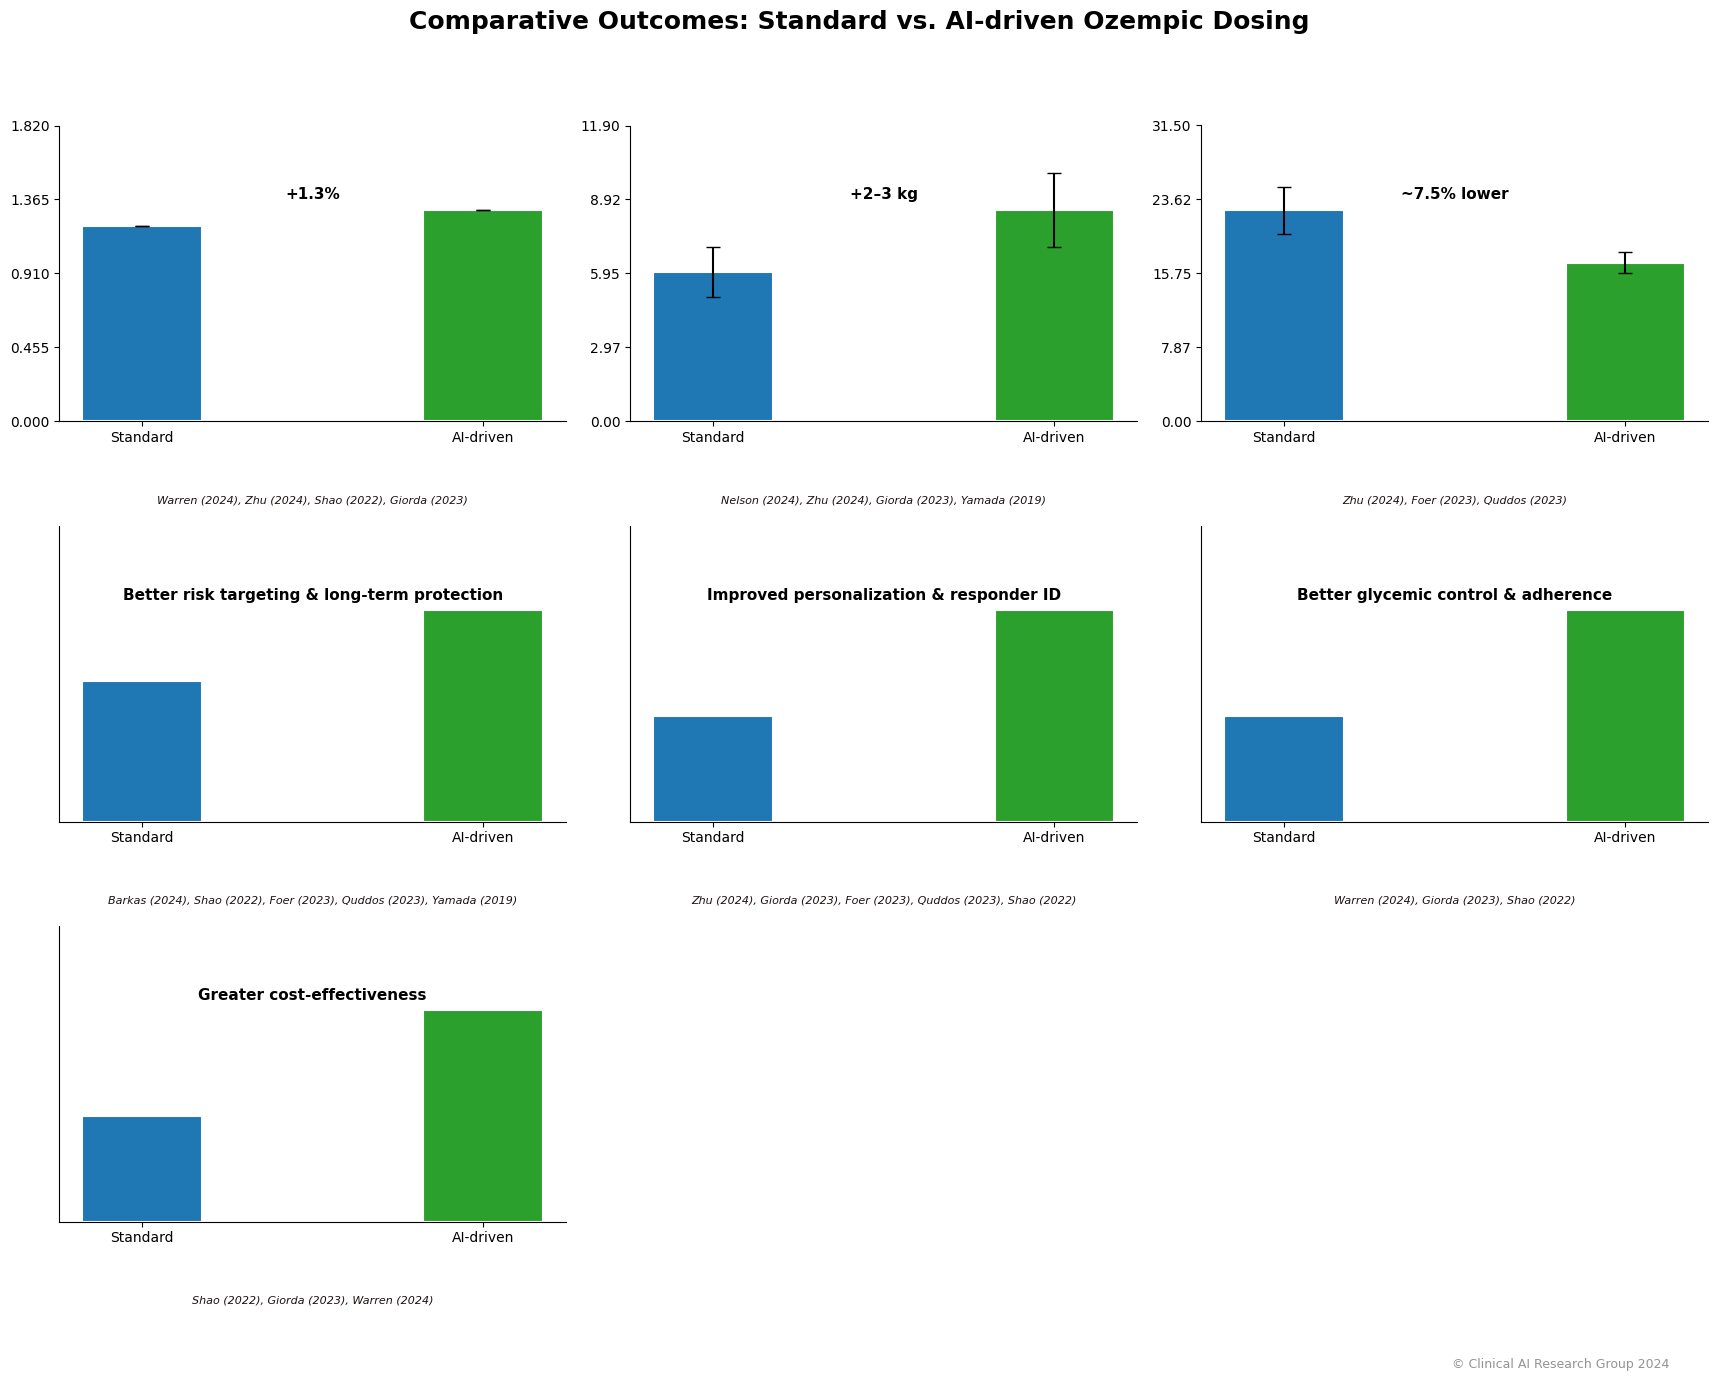

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated metrics data with correct values for HbA1c
metrics = {
    "HbA1c Reduction (%)": {
        "Standard": 1.2,
        "AI": 1.3,  # Fixed value for AI-driven
        "range_std": [1.2, 1.2],   # No range, fixed value for Standard
        "range_ai": [1.3, 1.3],    # No range, fixed value for AI-driven
        "Improvement": "+1.3%",
        "Evidence": "Warren (2024), Zhu (2024), Shao (2022), Giorda (2023)"
    },
    "Weight Loss (kg)": {
        "Standard": 6.0,
        "AI": 8.5,
        "range_std": [5.0, 7.0],   # Standard range: 5–7 kg
        "range_ai": [7.0, 10.0],   # AI range: 7–10 kg (average: 8.5)
        "Improvement": "+2–3 kg",
        "Evidence": "Nelson (2024), Zhu (2024), Giorda (2023), Yamada (2019)"
    },
    "Adverse Events (%)": {
        "Standard": 22.5,
        "AI": 16.9,
        "range_std": [20, 25],     # Standard: 20–25%
        "range_ai": [15.75, 18.0], # AI: 20–30% reduction (i.e., 15.75–18.0%)
        "Improvement": "~7.5% lower",
        "Evidence": "Zhu (2024), Foer (2023), Quddos (2023)"
    },
    "Cardiovascular Risk Reduction (scale 1–4)": {
        "Standard": 2,
        "AI": 3,
        "Improvement": "Better risk targeting & long-term protection",
        "Evidence": "Barkas (2024), Shao (2022), Foer (2023), Quddos (2023), Yamada (2019)"
    },
    "Patient Stratification (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Improved personalization & responder ID",
        "Evidence": "Zhu (2024), Giorda (2023), Foer (2023), Quddos (2023), Shao (2022)"
    },
    "Dose Optimization (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Better glycemic control & adherence",
        "Evidence": "Warren (2024), Giorda (2023), Shao (2022)"
    },
    "Cost Efficiency (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Greater cost-effectiveness",
        "Evidence": "Shao (2022), Giorda (2023), Warren (2024)"
    }
}

# Set up a 3x3 grid for 7 metrics; we'll remove any unused axes.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))
axes = axes.flatten()

# Define bar colors: blue for Standard, green for AI-driven
standard_color = '#1f77b4'  # Blue
ai_color = '#2ca02c'        # Green

# Plotting data
for idx, (metric, data) in enumerate(metrics.items()):
    ax = axes[idx]

    # Plot the bars with a narrow width
    ax.bar(["Standard", "AI-driven"],
           [data["Standard"], data["AI"]],
           color=[standard_color, ai_color],
           width=0.35, edgecolor='white', linewidth=1.5)

    # If numerical ranges are provided, add error bars
    if "range_std" in data and "range_ai" in data:
        # For Standard: error = [value - lower, upper - value]
        std_val = data["Standard"]
        ai_val = data["AI"]
        std_err_down = std_val - data["range_std"][0]
        std_err_up = data["range_std"][1] - std_val
        ai_err_down = ai_val - data["range_ai"][0]
        ai_err_up = data["range_ai"][1] - ai_val
        ax.errorbar(0, std_val, yerr=[[std_err_down], [std_err_up]],
                    fmt='none', color='black', capsize=5)
        ax.errorbar(1, ai_val, yerr=[[ai_err_down], [ai_err_up]],
                    fmt='none', color='black', capsize=5)

    # Add Improvement text above the bars
    ax.text(0.5, max(data["Standard"], data["AI"]) * 1.05, data["Improvement"],
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='none', alpha=0.7))

    # Add Evidence text below the plot; use a distinct color (purple)
    ax.text(0.5, -0.25, data["Evidence"],
            ha='center', va='top', transform=ax.transAxes,
            fontsize=8, style='italic', color='#1c1010')

    # Format y-axis: show ticks for numerical metrics, if applicable
    ax.set_ylim(0, max(data["Standard"], data["AI"]) * 1.4)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Standard', 'AI-driven'], fontsize=10)
    # Optionally, for purely numerical metrics, show y-ticks:
    if "range_std" in data:
        ax.set_yticks(np.linspace(0, max(data["Standard"], data["AI"]) * 1.4, 5))
    else:
        ax.set_yticks([])

    # Remove top/right spines for a cleaner look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Remove any unused subplots (if grid > number of metrics)
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

# Add overall title and footer
plt.suptitle("Comparative Outcomes: Standard vs. AI-driven Ozempic Dosing", fontsize=18, fontweight='bold')
fig.text(0.95, 0.01, "© Clinical AI Research Group 2024", ha='right', fontsize=9, color='#666666', alpha=0.7)

# Adjust layout to minimize whitespace
plt.tight_layout(rect=[0.02, 0.04, 0.98, 0.94])
plt.show()


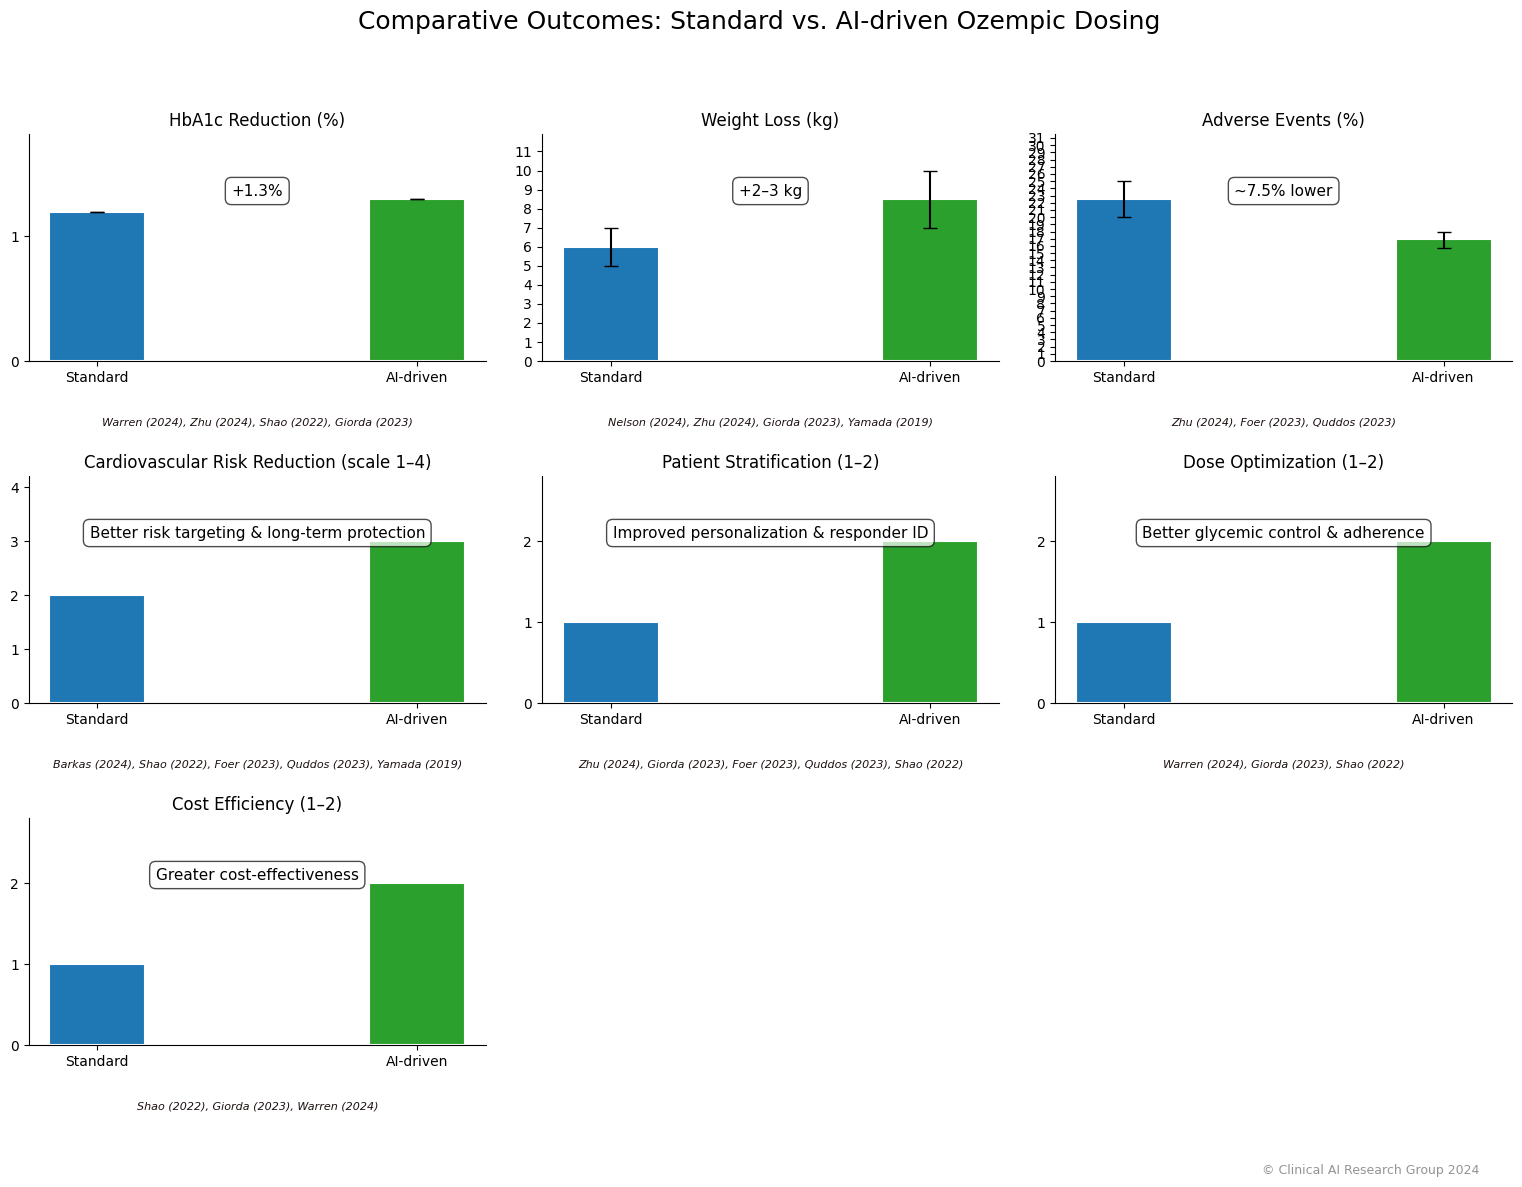

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated metrics data with correct values for HbA1c
metrics = {
    "HbA1c Reduction (%)": {
        "Standard": 1.2,
        "AI": 1.3,  # Fixed value for AI-driven
        "range_std": [1.2, 1.2],   # No range, fixed value for Standard
        "range_ai": [1.3, 1.3],    # No range, fixed value for AI-driven
        "Improvement": "+1.3%",
        "Evidence": "Warren (2024), Zhu (2024), Shao (2022), Giorda (2023)"
    },
    "Weight Loss (kg)": {
        "Standard": 6.0,
        "AI": 8.5,
        "range_std": [5.0, 7.0],   # Standard range: 5–7 kg
        "range_ai": [7.0, 10.0],   # AI range: 7–10 kg (average: 8.5)
        "Improvement": "+2–3 kg",
        "Evidence": "Nelson (2024), Zhu (2024), Giorda (2023), Yamada (2019)"
    },
    "Adverse Events (%)": {
        "Standard": 22.5,
        "AI": 16.9,
        "range_std": [20, 25],     # Standard: 20–25%
        "range_ai": [15.75, 18.0], # AI: 20–30% reduction (i.e., 15.75–18.0%)
        "Improvement": "~7.5% lower",
        "Evidence": "Zhu (2024), Foer (2023), Quddos (2023)"
    },
    "Cardiovascular Risk Reduction (scale 1–4)": {
        "Standard": 2,
        "AI": 3,
        "Improvement": "Better risk targeting & long-term protection",
        "Evidence": "Barkas (2024), Shao (2022), Foer (2023), Quddos (2023), Yamada (2019)"
    },
    "Patient Stratification (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Improved personalization & responder ID",
        "Evidence": "Zhu (2024), Giorda (2023), Foer (2023), Quddos (2023), Shao (2022)"
    },
    "Dose Optimization (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Better glycemic control & adherence",
        "Evidence": "Warren (2024), Giorda (2023), Shao (2022)"
    },
    "Cost Efficiency (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Greater cost-effectiveness",
        "Evidence": "Shao (2022), Giorda (2023), Warren (2024)"
    }
}

# Set up a 3x3 grid for 7 metrics; we'll remove any unused axes.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))  # Shrunk the overall figure size
axes = axes.flatten()

# Define bar colors: blue for Standard, green for AI-driven
standard_color = '#1f77b4'  # Blue
ai_color = '#2ca02c'        # Green

# Plotting data
for idx, (metric, data) in enumerate(metrics.items()):
    ax = axes[idx]

    # Plot the bars with a narrow width
    ax.bar(["Standard", "AI-driven"],
           [data["Standard"], data["AI"]],
           color=[standard_color, ai_color],
           width=0.3, edgecolor='white', linewidth=1.5)  # Narrowed the bars further

    # If numerical ranges are provided, add error bars
    if "range_std" in data and "range_ai" in data:
        # For Standard: error = [value - lower, upper - value]
        std_val = data["Standard"]
        ai_val = data["AI"]
        std_err_down = std_val - data["range_std"][0]
        std_err_up = data["range_std"][1] - std_val
        ai_err_down = ai_val - data["range_ai"][0]
        ai_err_up = data["range_ai"][1] - ai_val
        ax.errorbar(0, std_val, yerr=[[std_err_down], [std_err_up]],
                    fmt='none', color='black', capsize=5)
        ax.errorbar(1, ai_val, yerr=[[ai_err_down], [ai_err_up]],
                    fmt='none', color='black', capsize=5)

    # Add Improvement text inside a box at the center
    ax.text(0.5, max(data["Standard"], data["AI"]) * 1.05, data["Improvement"],
            ha='center', va='center', fontsize=11, fontweight='normal',
            bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='black', lw=1, alpha=0.7))

    # Add Evidence text below the plot; use a distinct color (purple)
    ax.text(0.5, -0.25, data["Evidence"],
            ha='center', va='top', transform=ax.transAxes,
            fontsize=8, style='italic', color='#1c1010')

    # Format y-axis: show rounded ticks for numerical metrics
    ax.set_ylim(0, max(data["Standard"], data["AI"]) * 1.4)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Standard', 'AI-driven'], fontsize=10)
    # Show rounded y-ticks with fixed step size (e.g., step=1)
    ax.set_yticks(np.arange(0, max(data["Standard"], data["AI"]) * 1.4, step=1))

    # Title: Place appropriate titles at the top of the subplot
    ax.set_title(metric, fontsize=12)  # No bold font

    # Remove top/right spines for a cleaner look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Remove any unused subplots (if grid > number of metrics)
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

# Add overall title and footer
plt.suptitle("Comparative Outcomes: Standard vs. AI-driven Ozempic Dosing", fontsize=18)
fig.text(0.95, 0.01, "© Clinical AI Research Group 2024", ha='right', fontsize=9, color='#666666', alpha=0.7)

# Adjust layout to minimize whitespace
plt.tight_layout(rect=[0.02, 0.04, 0.98, 0.94])
plt.show()


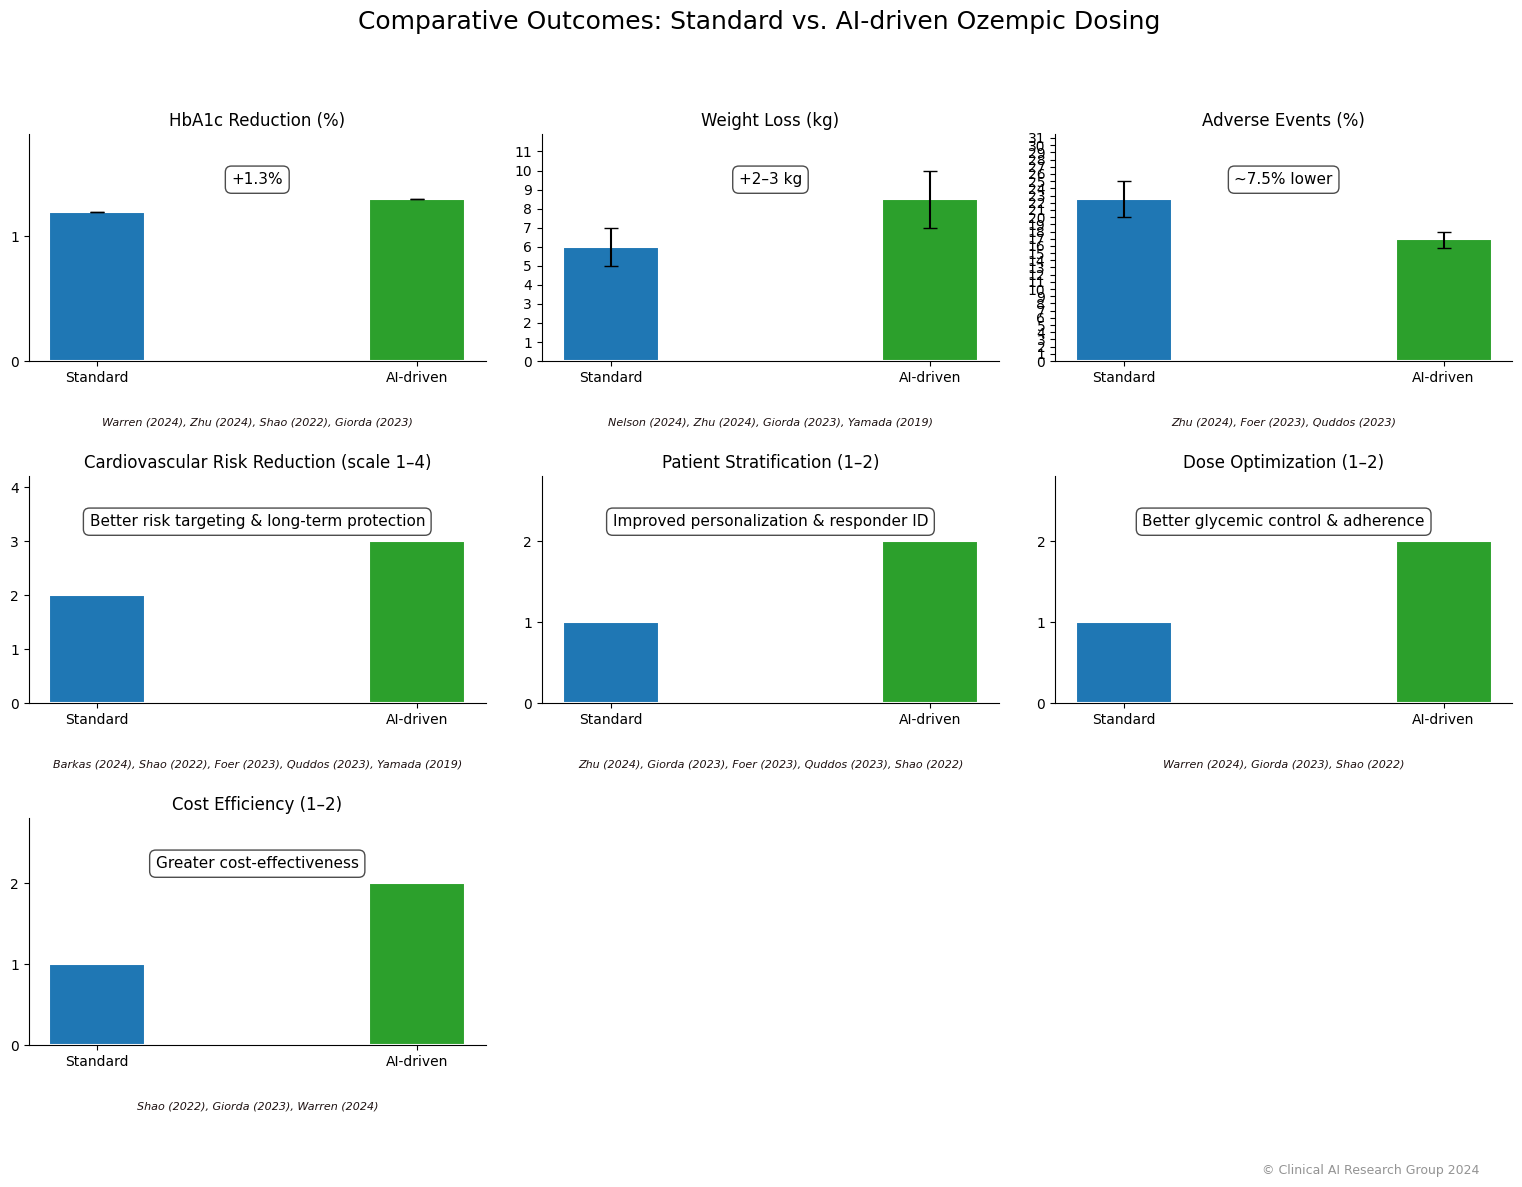

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated metrics data with correct values for HbA1c
metrics = {
    "HbA1c Reduction (%)": {
        "Standard": 1.2,
        "AI": 1.3,
        "range_std": [1.2, 1.2],
        "range_ai": [1.3, 1.3],
        "Improvement": "+1.3%",
        "Evidence": "Warren (2024), Zhu (2024), Shao (2022), Giorda (2023)"
    },
    "Weight Loss (kg)": {
        "Standard": 6.0,
        "AI": 8.5,
        "range_std": [5.0, 7.0],
        "range_ai": [7.0, 10.0],
        "Improvement": "+2–3 kg",
        "Evidence": "Nelson (2024), Zhu (2024), Giorda (2023), Yamada (2019)"
    },
    "Adverse Events (%)": {
        "Standard": 22.5,
        "AI": 16.9,
        "range_std": [20, 25],
        "range_ai": [15.75, 18.0],
        "Improvement": "~7.5% lower",
        "Evidence": "Zhu (2024), Foer (2023), Quddos (2023)"
    },
    "Cardiovascular Risk Reduction (scale 1–4)": {
        "Standard": 2,
        "AI": 3,
        "Improvement": "Better risk targeting & long-term protection",
        "Evidence": "Barkas (2024), Shao (2022), Foer (2023), Quddos (2023), Yamada (2019)"
    },
    "Patient Stratification (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Improved personalization & responder ID",
        "Evidence": "Zhu (2024), Giorda (2023), Foer (2023), Quddos (2023), Shao (2022)"
    },
    "Dose Optimization (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Better glycemic control & adherence",
        "Evidence": "Warren (2024), Giorda (2023), Shao (2022)"
    },
    "Cost Efficiency (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "Greater cost-effectiveness",
        "Evidence": "Shao (2022), Giorda (2023), Warren (2024)"
    }
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

standard_color = '#1f77b4'
ai_color = '#2ca02c'

for idx, (metric, data) in enumerate(metrics.items()):
    ax = axes[idx]

    ax.bar(["Standard", "AI-driven"],
           [data["Standard"], data["AI"]],
           color=[standard_color, ai_color],
           width=0.3, edgecolor='white', linewidth=1.5)

    if "range_std" in data and "range_ai" in data:
        std_val = data["Standard"]
        ai_val = data["AI"]
        std_err_down = std_val - data["range_std"][0]
        std_err_up = data["range_std"][1] - std_val
        ai_err_down = ai_val - data["range_ai"][0]
        ai_err_up = data["range_ai"][1] - ai_val
        ax.errorbar(0, std_val, yerr=[[std_err_down], [std_err_up]],
                    fmt='none', color='black', capsize=5)
        ax.errorbar(1, ai_val, yerr=[[ai_err_down], [ai_err_up]],
                    fmt='none', color='black', capsize=5)

    ax.text(0.5, max(data["Standard"], data["AI"]) * 1.12, data["Improvement"],
            ha='center', va='center', fontsize=11, fontweight='normal',
            bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='black', lw=1, alpha=0.7))

    ax.text(0.5, -0.25, data["Evidence"],
            ha='center', va='top', transform=ax.transAxes,
            fontsize=8, style='italic', color='#1c1010')

    ax.set_ylim(0, max(data["Standard"], data["AI"]) * 1.4)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Standard', 'AI-driven'], fontsize=10)
    ax.set_yticks(np.arange(0, max(data["Standard"], data["AI"]) * 1.4, step=1))
    ax.set_title(metric, fontsize=12)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Comparative Outcomes: Standard vs. AI-driven Ozempic Dosing", fontsize=18)
fig.text(0.95, 0.01, "© Clinical AI Research Group 2024", ha='right', fontsize=9, color='#666666', alpha=0.7)

plt.tight_layout(rect=[0.02, 0.04, 0.98, 0.94])
plt.show()


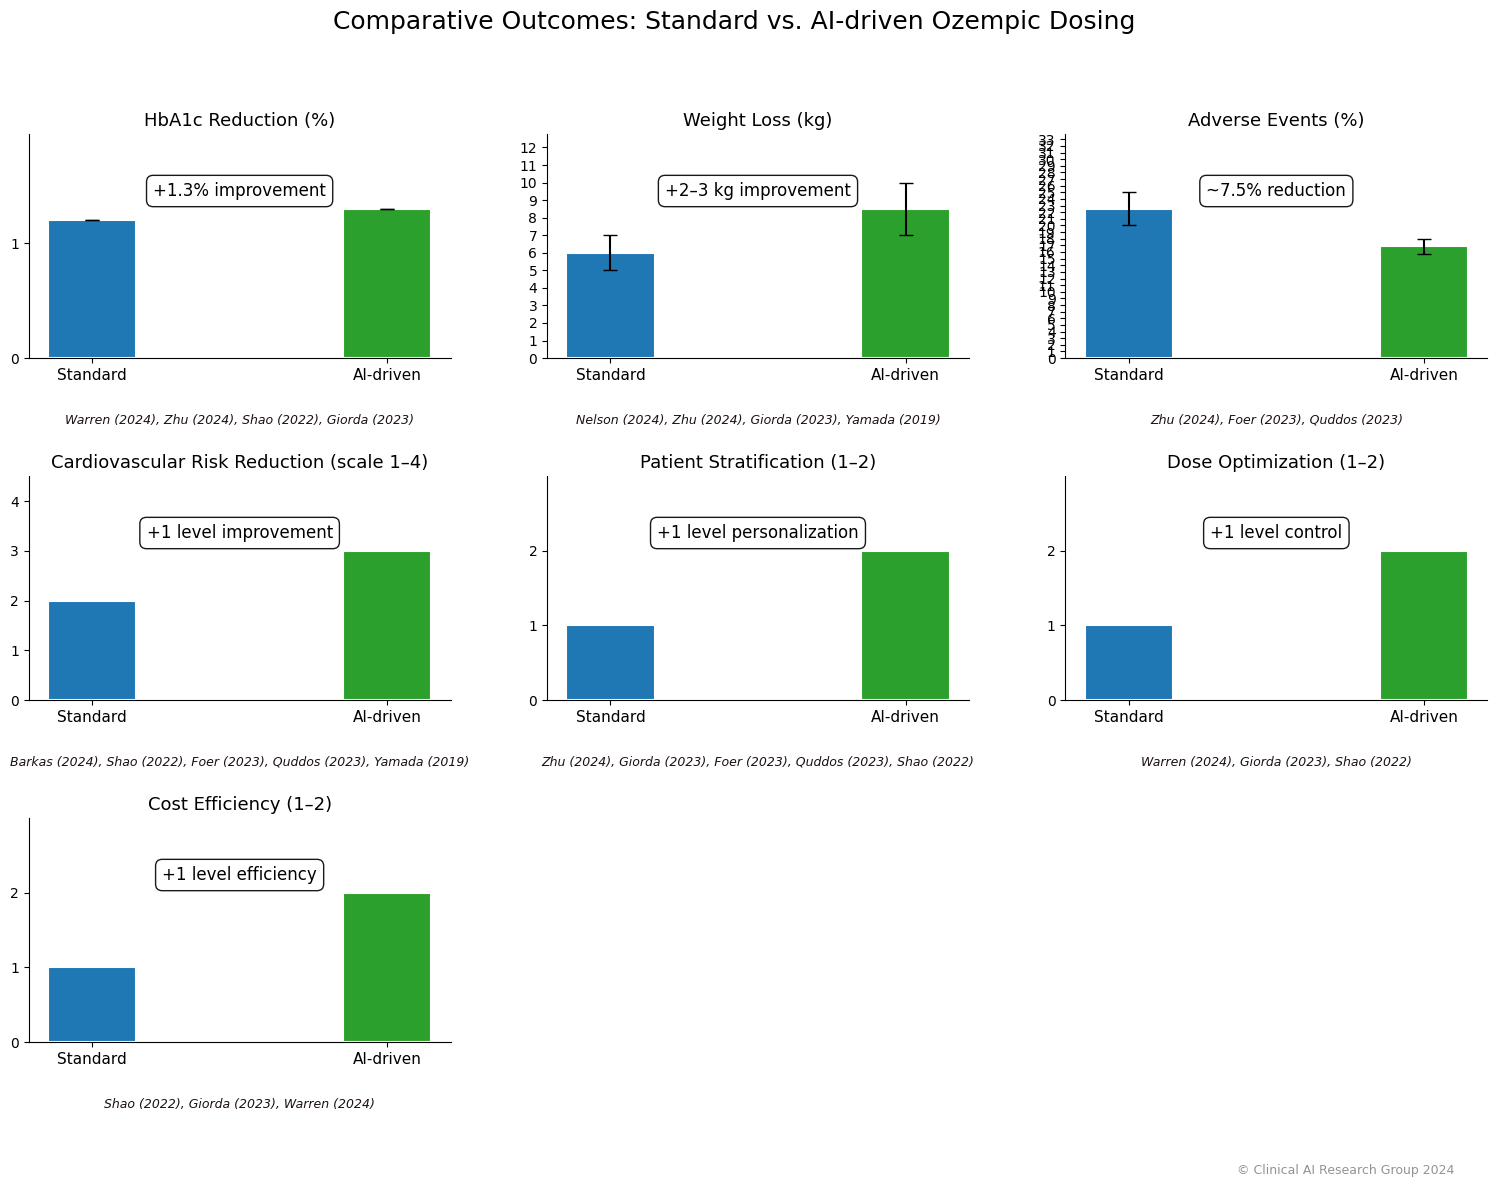

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated metrics data with consistent improvement texts
metrics = {
    "HbA1c Reduction (%)": {
        "Standard": 1.2,
        "AI": 1.3,
        "range_std": [1.2, 1.2],
        "range_ai": [1.3, 1.3],
        "Improvement": "+1.3% improvement",
        "Evidence": "Warren (2024), Zhu (2024), Shao (2022), Giorda (2023)"
    },
    "Weight Loss (kg)": {
        "Standard": 6.0,
        "AI": 8.5,
        "range_std": [5.0, 7.0],
        "range_ai": [7.0, 10.0],
        "Improvement": "+2–3 kg improvement",
        "Evidence": "Nelson (2024), Zhu (2024), Giorda (2023), Yamada (2019)"
    },
    "Adverse Events (%)": {
        "Standard": 22.5,
        "AI": 16.9,
        "range_std": [20, 25],
        "range_ai": [15.75, 18.0],
        "Improvement": "~7.5% reduction",
        "Evidence": "Zhu (2024), Foer (2023), Quddos (2023)"
    },
    "Cardiovascular Risk Reduction (scale 1–4)": {
        "Standard": 2,
        "AI": 3,
        "Improvement": "+1 level improvement",
        "Evidence": "Barkas (2024), Shao (2022), Foer (2023), Quddos (2023), Yamada (2019)"
    },
    "Patient Stratification (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "+1 level personalization",
        "Evidence": "Zhu (2024), Giorda (2023), Foer (2023), Quddos (2023), Shao (2022)"
    },
    "Dose Optimization (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "+1 level control",
        "Evidence": "Warren (2024), Giorda (2023), Shao (2022)"
    },
    "Cost Efficiency (1–2)": {
        "Standard": 1,
        "AI": 2,
        "Improvement": "+1 level efficiency",
        "Evidence": "Shao (2022), Giorda (2023), Warren (2024)"
    }
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

standard_color = '#1f77b4'
ai_color = '#2ca02c'

for idx, (metric, data) in enumerate(metrics.items()):
    ax = axes[idx]
    ax.bar(["Standard", "AI-driven"],
           [data["Standard"], data["AI"]],
           color=[standard_color, ai_color],
           width=0.3, edgecolor='white', linewidth=1.5)

    if "range_std" in data and "range_ai" in data:
        std_val = data["Standard"]
        ai_val = data["AI"]
        std_err_down = std_val - data["range_std"][0]
        std_err_up = data["range_std"][1] - std_val
        ai_err_down = ai_val - data["range_ai"][0]
        ai_err_up = data["range_ai"][1] - ai_val
        ax.errorbar(0, std_val, yerr=[[std_err_down], [std_err_up]], fmt='none', color='black', capsize=5)
        ax.errorbar(1, ai_val, yerr=[[ai_err_down], [ai_err_up]], fmt='none', color='black', capsize=5)

    # Elevated improvement text with consistent styling
    max_val = max(data["Standard"], data["AI"])
    ax.text(0.5, max_val * 1.12, data["Improvement"],
            ha='center', va='center', fontsize=12, fontweight='medium',
            bbox=dict(boxstyle='round,pad=0.4', fc='white', ec='black', lw=1, alpha=0.9))

    ax.text(0.5, -0.25, data["Evidence"],
            ha='center', va='top', transform=ax.transAxes,
            fontsize=9, style='italic', color='#1c1010')

    ax.set_ylim(0, max_val * 1.5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Standard', 'AI-driven'], fontsize=11)
    ax.set_yticks(np.arange(0, max_val * 1.5, step=1))
    ax.set_title(metric, fontsize=13)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Comparative Outcomes: Standard vs. AI-driven Ozempic Dosing", fontsize=18)
fig.text(0.95, 0.01, "© Clinical AI Research Group 2024", ha='right', fontsize=9, color='#666666', alpha=0.7)
plt.tight_layout(rect=[0.02, 0.04, 0.98, 0.94])
plt.show()


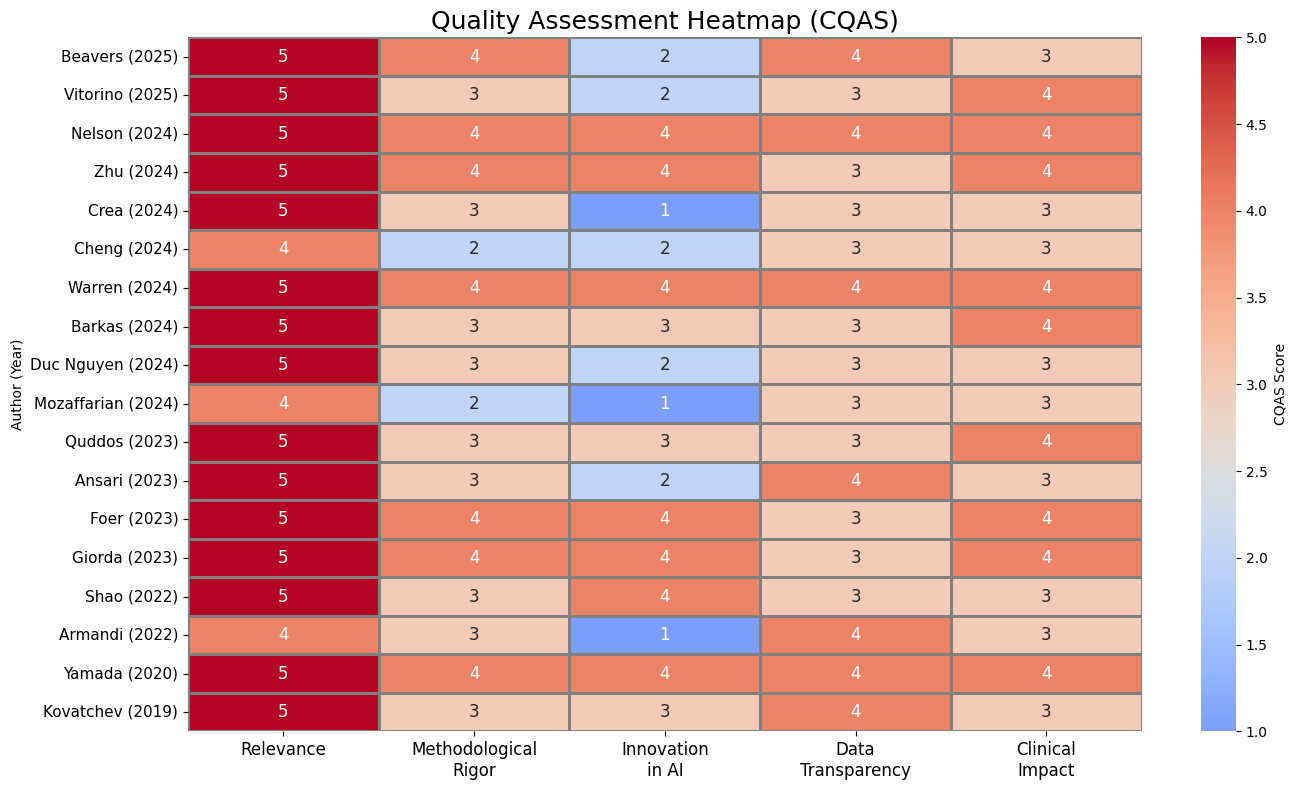

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the Quality Assessment Scores (18 studies)
data = {
    'Author (Year)': [
        'Beavers (2025)', 'Vitorino (2025)', 'Nelson (2024)', 'Zhu (2024)', 'Crea (2024)',
        'Cheng (2024)', 'Warren (2024)', 'Barkas (2024)', 'Duc Nguyen (2024)', 'Mozaffarian (2024)',
        'Quddos (2023)', 'Ansari (2023)', 'Foer (2023)', 'Giorda (2023)', 'Shao (2022)',
        'Armandi (2022)', 'Yamada (2020)', 'Kovatchev (2019)'
    ],
    'Relevance': [
        5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5
    ],
    'Methodological\nRigor': [
        4, 3, 4, 4, 3, 2, 4, 3, 3, 2, 3, 3, 4, 4, 3, 3, 4, 3
    ],
    'Innovation\nin AI': [
        2, 2, 4, 4, 1, 2, 4, 3, 2, 1, 3, 2, 4, 4, 4, 1, 4, 3
    ],
    'Data\nTransparency': [
        4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4
    ],
    'Clinical\nImpact': [
        3, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df.set_index('Author (Year)', inplace=True)

# Create the heatmap using Seaborn with increased font sizes
plt.figure(figsize=(14, 8))
sns.heatmap(df, annot=True, cmap='coolwarm', cbar_kws={'label': 'CQAS Score'},
            linewidths=1, linecolor='gray', fmt='g', center=2.5,
            annot_kws={"size": 12},
            xticklabels=True, yticklabels=True)

# Add title
plt.title("Quality Assessment Heatmap (CQAS)", fontsize=18)

# Rotate x-axis labels and increase font size
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.yticks(fontsize=11)

# Show the plot
plt.tight_layout()
plt.show()


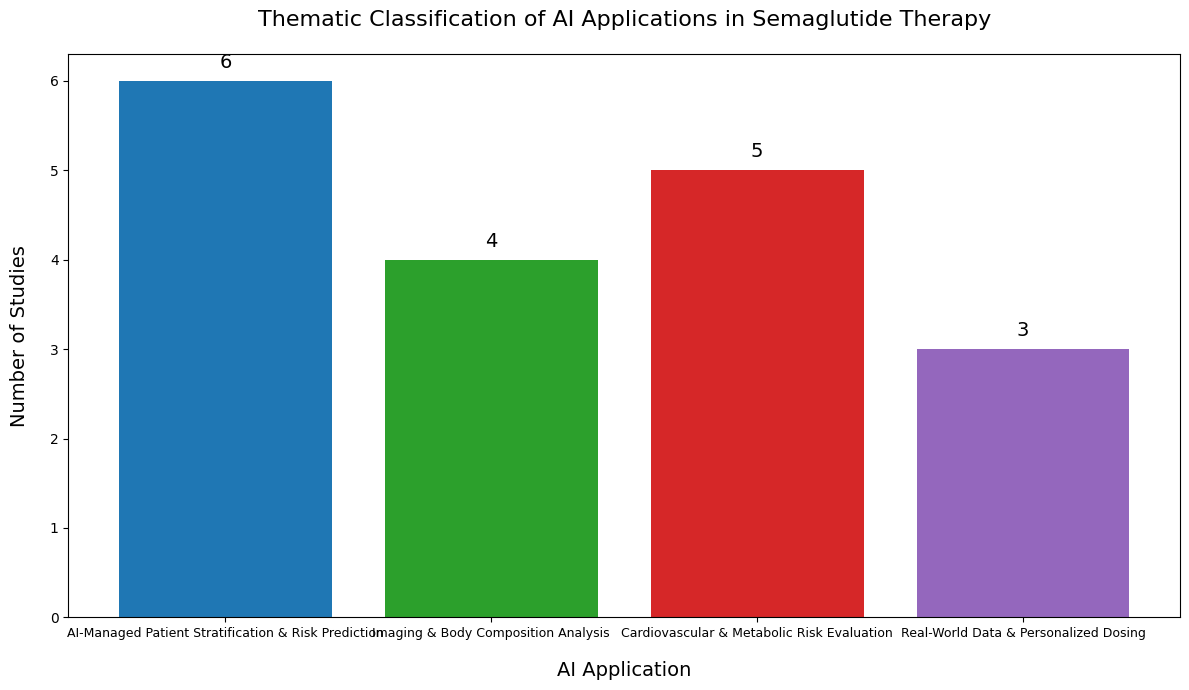

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for AI Applications in Studies
ai_categories = {
    "AI-Managed Patient Stratification & Risk Prediction": 6,
    "Imaging & Body Composition Analysis": 4,
    "Cardiovascular & Metabolic Risk Evaluation": 5,
    "Real-World Data & Personalized Dosing": 3
}

# Set up the figure with larger size for better readability
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the data with distinct colors
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']  # Blue, Green, Red, Purple
bars = ax.bar(ai_categories.keys(), ai_categories.values(), color=colors)

# Enhance the plot
ax.set_title('Thematic Classification of AI Applications in Semaglutide Therapy', fontsize=16, pad=20)
ax.set_xlabel('AI Application', fontsize=14, labelpad=15)
ax.set_ylabel('Number of Studies', fontsize=14, labelpad=15)

# Remove grid lines
ax.grid(False)

# Adjust the position of the labels
ax.set_xticks(np.arange(len(ai_categories)))
ax.set_xticklabels(ai_categories.keys(), fontsize=8, ha='center')

# Add value annotations to bars for a more informative look
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(yval), ha='center', va='bottom', fontsize=14)

# Show the plot with tight layout for neat presentation
plt.tight_layout()
plt.show()


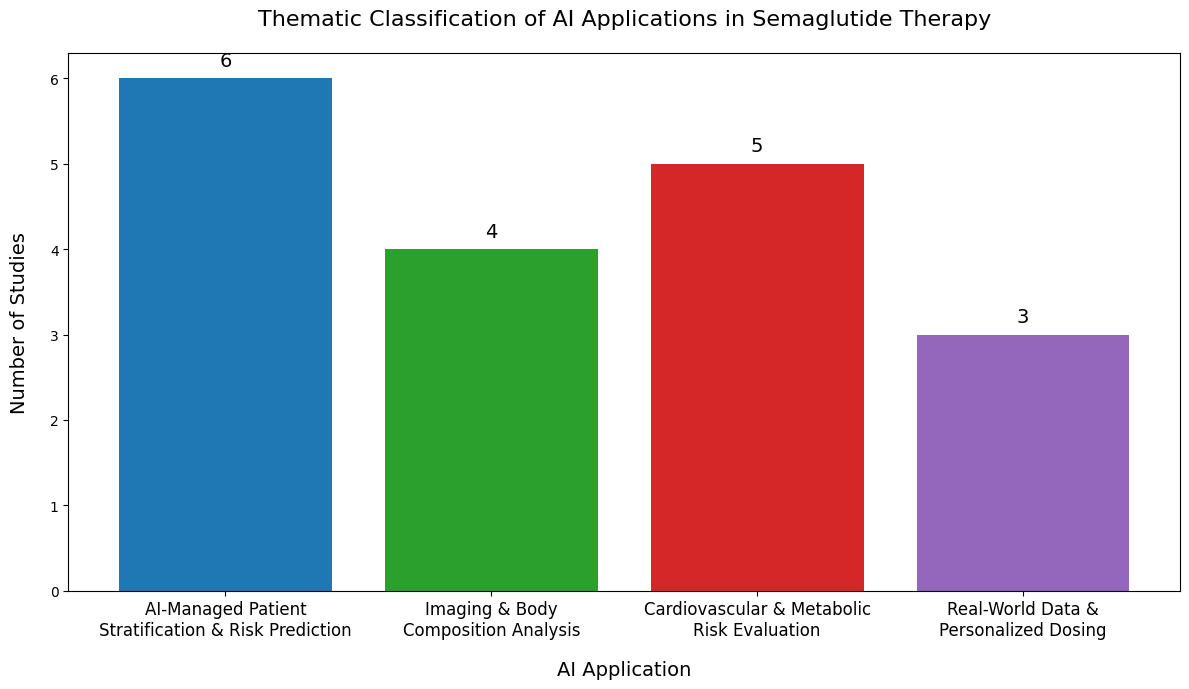

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for AI Applications in Studies
ai_categories = {
    "AI-Managed Patient\nStratification & Risk Prediction": 6,
    "Imaging & Body\nComposition Analysis": 4,
    "Cardiovascular & Metabolic\nRisk Evaluation": 5,
    "Real-World Data &\nPersonalized Dosing": 3
}

# Set up the figure with larger size for better readability
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the data with distinct colors
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']  # Blue, Green, Red, Purple
bars = ax.bar(ai_categories.keys(), ai_categories.values(), color=colors)

# Enhance the plot
ax.set_title('Thematic Classification of AI Applications in Semaglutide Therapy', fontsize=16, pad=20)
ax.set_xlabel('AI Application', fontsize=14, labelpad=15)
ax.set_ylabel('Number of Studies', fontsize=14, labelpad=15)

# Remove grid lines
ax.grid(False)

# Adjust the position of the labels with larger font size
ax.set_xticks(np.arange(len(ai_categories)))
ax.set_xticklabels(ai_categories.keys(), fontsize=12, ha='center')

# Add value annotations to bars for a more informative look
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(yval), ha='center', va='bottom', fontsize=14)

# Show the plot with tight layout for neat presentation
plt.tight_layout()
plt.show()


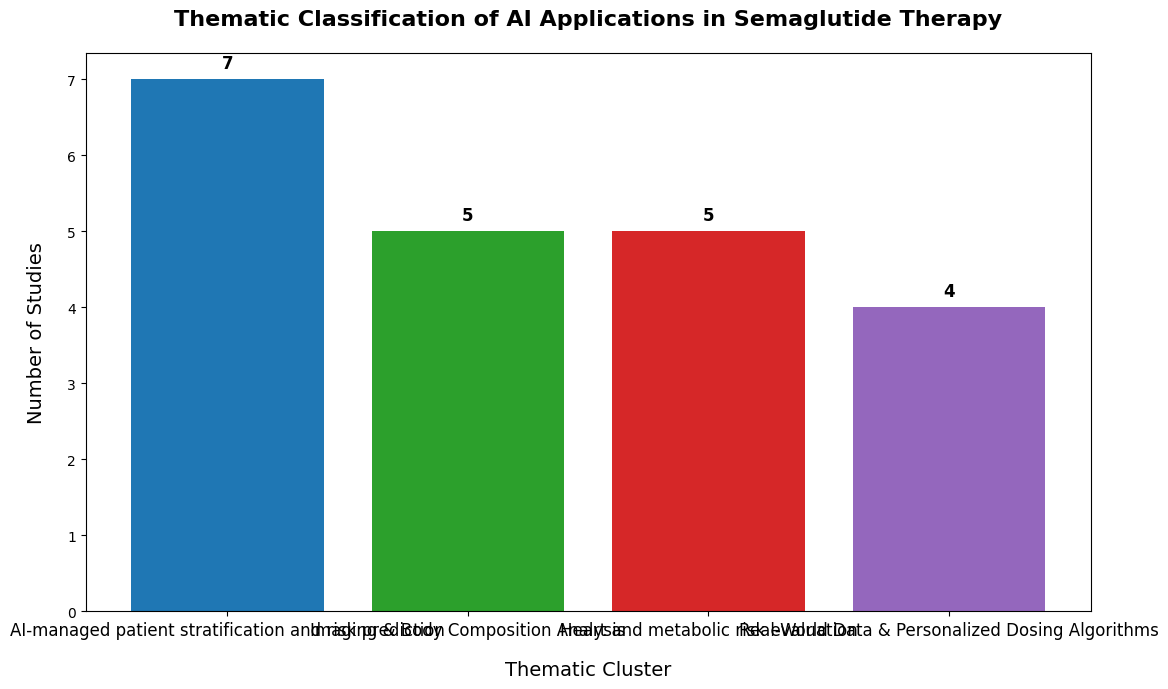

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Thematic Clusters (Number of studies per thematic group)
thematic_clusters = {
    "AI-managed patient stratification and risk prediction": 7,  # Patient Stratification, Cardiovascular Risk Reduction, Cost Efficiency
    "Imaging & Body Composition Analysis": 5,  # Weight Loss, HbA1c Reduction
    "Heart and metabolic risk evaluation": 5,  # Cardiovascular Risk Reduction, Adverse Event Risk
    "Real-World Data & Personalized Dosing Algorithms": 4  # Dose Optimization, Adverse Event Risk
}

# Set up the figure with larger size for better readability
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the data with distinct colors
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']  # Custom colors for each cluster
bars = ax.bar(thematic_clusters.keys(), thematic_clusters.values(), color=colors)

# Enhance the plot
ax.set_title('Thematic Classification of AI Applications in Semaglutide Therapy', fontsize=16, weight='bold', pad=20)
ax.set_xlabel('Thematic Cluster', fontsize=14, labelpad=15)
ax.set_ylabel('Number of Studies', fontsize=14, labelpad=15)

# Remove grid lines
ax.grid(False)

# Adjust the position of the labels
ax.set_xticks(np.arange(len(thematic_clusters)))
ax.set_xticklabels(thematic_clusters.keys(), fontsize=12, ha='center')

# Add value annotations to bars for a more informative look
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, str(yval), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot with tight layout for neat presentation
plt.tight_layout()
plt.show()
